In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
kitchen_points.drop('コンロ3口', axis=1, inplace=True)
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_kitchen_points.drop('コンロ3口', axis=1, inplace=True)
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over110m2, over100m2,bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings,test_over110m2, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','110m^2以上','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 'コンロ2口']

In [29]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
rmse_scores = []
X_train['KFold'] = -1
#foldはvalidの対象となる値で０から４
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_train.loc[valid_index,'KFold'] = fold_id
    y_train.loc[valid_index,'KFold'] = fold_id

def objective(trial):
    #foldはvalidの対象となる値で０から４
    for fold in range(5):
        X_tr = X_train[X_train['KFold']!=fold].drop('KFold',axis=1)
        X_val = X_train[X_train['KFold']==fold].drop('KFold',axis=1)
        y_tr = y_train[y_train['KFold']!=fold].drop('KFold',axis=1)
        y_val = y_train[y_train['KFold']==fold].drop('KFold',axis=1)

        lgb_train = lgb.Dataset(X_tr, y_tr)
        lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
        params = {
            'objective':'regression',
            'boosting_type':'goss',
            'metrics':'rmse',
            'learning_rate':0.05,
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0000001, 0.0001, log=True),
            'max_bin': trial.suggest_int('max_bin', 255, 600),
            'num_leaves': trial.suggest_int('num_leaves', 50, 128),
        }

        model = lgb.train(
                            params,
                            lgb_train, 
                            valid_sets=[lgb_train, lgb_eval], 
                            verbose_eval=10, 
                            num_boost_round=3000, 
                            early_stopping_rounds=10,
                            categorical_feature = category_lists
                            )

        y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
        rmse_scores.append(mean_squared_error(y_val, y_pred_val, squared=False))
    loss = np.mean(rmse_scores)
    return loss

In [4]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)

[I 2022-10-01 23:43:14,912] A new study created in memory with name: no-name-bab97eda-3b4f-4988-950d-91a6821182a2
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/pyt

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48774.1	valid_1's rmse: 50175.9
[20]	training's rmse: 34438	valid_1's rmse: 37830
[30]	training's rmse: 26128.6	valid_1's rmse: 31038.2
[40]	training's rmse: 21271.9	valid_1's rmse: 27349.9
[50]	training's rmse: 18439.2	valid_1's rmse: 25204.7
[60]	training's rmse: 16691.8	valid_1's rmse: 23840.8
[70]	training's rmse: 15521.6	valid_1's rmse: 22923.6
[80]	training's rmse: 14681.5	valid_1's rmse: 22261.8
[90]	training's rmse: 14048.5	valid_1's rmse: 21779.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48979.5	valid_1's rmse: 49580.4
[20]	training's rmse: 34922.9	valid_1's rmse: 36072.5
[30]	training's rmse: 26929.6	valid_1's rmse: 28960.6
[40]	training's rmse: 22486.2	valid_1's rmse: 24930.9
[50]	training's rmse: 19904.1	valid_1's rmse: 22718.7
[60]	training's rmse: 18160.1	valid_1's rmse: 21287.4
[70]	training's rmse: 17055.3	valid_1's rmse: 20350.3
[80]	training's rmse: 16152.7	valid_1's rmse: 19706.4
[90]	training's rmse: 15488.5	valid_1's rmse: 19360.3
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35363.6	valid_1's rmse: 33936.1
[30]	training's rmse: 27146.9	valid_1's rmse: 25959.5
[40]	training's rmse: 22629.6	valid_1's rmse: 21837.9
[50]	training's rmse: 19855.3	valid_1's rmse: 19947.2
[60]	training's rmse: 18123.5	valid_1's rmse: 18938.1
[70]	training's rmse: 16807.2	valid_1's rmse: 18444.5
[80]	training's rmse: 15919.2	valid_1's rmse: 18083.3
[90]	training's rmse: 15151.9	valid_1's rmse: 17866.2
[100]	training's rmse: 14558.1	valid_1's rmse: 17771.5
[110]	training's rmse: 14047.9	valid_1's rmse: 17646.8
[120]	training's rmse: 13653.7	valid_1's rmse: 17526.8
[130]	training's rmse: 13283.1	valid_1's rmse: 17450.2
[140]	training's rmse: 12933.5	valid_1's rmse: 17335.3
[150]	training's rmse: 12587.6	valid_1's rmse: 17295.5
[160]	training's rmse: 12279.1	valid_1's rmse: 17240.1
[170]	training's rmse: 12012	valid_1's rmse: 17170.6
[180]	training's rmse: 11728.4	valid_1's rmse: 17135.9
[190]	training's rmse: 11450.3	valid_1's rmse: 17044.3
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35026	valid_1's rmse: 35162.2
[30]	training's rmse: 26698.5	valid_1's rmse: 28059.7
[40]	training's rmse: 22117.5	valid_1's rmse: 24504.7
[50]	training's rmse: 19359.2	valid_1's rmse: 22472.1
[60]	training's rmse: 17599.2	valid_1's rmse: 21369.1
[70]	training's rmse: 16452.1	valid_1's rmse: 20754.4
[80]	training's rmse: 15580.4	valid_1's rmse: 20492.6
[90]	training's rmse: 14887.2	valid_1's rmse: 20378.1
[100]	training's rmse: 14354.4	valid_1's rmse: 20179.6
[110]	training's rmse: 13853.6	valid_1's rmse: 20045.7
[120]	training's rmse: 13465.7	valid_1's rmse: 19949.7
[130]	training's rmse: 13056.7	valid_1's rmse: 19804.3
[140]	training's rmse: 12716.1	valid_1's rmse: 19672.6
[150]	training's rmse: 12369	valid_1's rmse: 19470.7
[160]	training's rmse: 12087.7	valid_1's rmse: 19398.1
[170]	training's rmse: 11846.1	valid_1's rmse: 19288.3
[180]	training's rmse: 11597.3	valid_1's rmse: 19205.6
[190]	training's rmse: 11349.5	valid_1's rmse: 19121.3
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48665.3	valid_1's rmse: 50990.6
[20]	training's rmse: 34937.4	valid_1's rmse: 36914.1
[30]	training's rmse: 26882.6	valid_1's rmse: 28400.7
[40]	training's rmse: 22516.4	valid_1's rmse: 23751.1
[50]	training's rmse: 19787.5	valid_1's rmse: 21134.2
[60]	training's rmse: 18133.6	valid_1's rmse: 19622.1
[70]	training's rmse: 16960	valid_1's rmse: 18737.9
[80]	training's rmse: 16149.6	valid_1's rmse: 18219.3
[90]	training's rmse: 15433.3	valid_1's rmse: 17770.2
[100]	traini

[I 2022-10-01 23:43:40,511] Trial 0 finished with value: 16698.69516805713 and parameters: {'reg_lambda': 4.430375245218262e-06, 'max_bin': 502, 'num_leaves': 97}. Best is trial 0 with value: 16698.69516805713.


Early stopping, best iteration is:
[496]	training's rmse: 7716.93	valid_1's rmse: 14578.8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48699.6	valid_1's rmse: 49998.9
[20]	training's rmse: 34312.3	valid_1's rmse: 37776.3
[30]	training's rmse: 25836.9	valid_1's rmse: 30841.1
[40]	training's rmse: 21158.3	valid_1's rmse: 27278.2
[50]	training's rmse: 18386.8	valid_1's rmse: 25161.8
[60]	training's rmse: 16657.4	valid_1's rmse: 23852.2
[70]	training's rmse: 15461.9	valid_1's rmse: 22927.6
[80]	training's rmse: 14605.5	valid_1's rmse: 22264.2
[90]	training's rmse: 13913.6	valid_1's rmse: 21683
[100]	training's rmse: 13301.5	valid_1's rmse: 21208.1
[110]	training's rmse: 12811.9	valid_1's rmse: 20874.7
[120]	training's rmse: 12384.4	valid_1's rmse: 20614.6
[130]	training's rmse: 11959.8	valid_1's rmse: 20335.8
[140]	training's rmse: 11638	valid_1's rmse: 20171.7
[150]	training's rmse: 11308.2	valid_1's rmse: 19945
[160]	training's rmse: 11010.6	valid_1's rmse: 19770.3
[170]	training's rmse: 10708	valid_1's rmse: 19582.8
[180]	training's rmse: 10458.5	valid_1's rmse: 19430.8
[190]	training's rmse: 1022

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48964.9	valid_1's rmse: 49749.8
[20]	training's rmse: 34863	valid_1's rmse: 36308.3
[30]	training's rmse: 26780.2	valid_1's rmse: 28976.4
[40]	training's rmse: 22321.3	valid_1's rmse: 24948.3
[50]	training's rmse: 19681.9	valid_1's rmse: 22659.8
[60]	training's rmse: 17978.5	valid_1's rmse: 21234.7
[70]	training's rmse: 16813.7	valid_1's rmse: 20405.8
[80]	training's rmse: 16036.3	valid_1's rmse: 19847.9
[90]	training's rmse: 15388.9	valid_1's rmse: 19505
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48863	valid_1's rmse: 48691.6
[20]	training's rmse: 34875.1	valid_1's rmse: 34299.5
[30]	training's rmse: 26776.3	valid_1's rmse: 26289.4
[40]	training's rmse: 22278.4	valid_1's rmse: 22314.6
[50]	training's rmse: 19512.5	valid_1's rmse: 20370.9
[60]	training's rmse: 17720	valid_1's rmse: 19331.5
[70]	training's rmse: 16549.9	valid_1's rmse: 18788.4
[80]	training's rmse: 15733.3	valid_1's rmse: 18496
[90]	training's rmse: 15035.9	valid_1's rmse: 18308.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49167.2	valid_1's rmse: 48067.1
[20]	training's rmse: 34722.4	valid_1's rmse: 35321.4
[30]	training's rmse: 26303.3	valid_1's rmse: 28061.5
[40]	training's rmse: 21691.1	valid_1's rmse: 24454.7
[50]	training's rmse: 19108.4	valid_1's rmse: 22676.8
[60]	training's rmse: 17323.1	valid_1's rmse: 21521
[70]	training's rmse: 16166.1	valid_1's rmse: 20872.4
[80]	training's rmse: 15342.3	valid_1's rmse: 20451.3
[90]	training's rmse: 14674.1	valid_1's rmse: 20199.9
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48634.2	valid_1's rmse: 50966
[20]	training's rmse: 34949.3	valid_1's rmse: 36966.4
[30]	training's rmse: 27098.1	valid_1's rmse: 28701.9
[40]	training's rmse: 22619.3	valid_1's rmse: 24128.3
[50]	training's rmse: 19981	valid_1's rmse: 21344.1
[60]	training's rmse: 18227.5	valid_1's rmse: 19784.6
[70]	training's rmse: 17028.3	valid_1's rmse: 18846.4
[80]	training's rmse: 16184	valid_1's rmse: 18215.8
[90]	training's rmse: 15488.5	valid_1's rmse: 17723.5
[100]	training's

[I 2022-10-01 23:44:07,162] Trial 1 finished with value: 16785.18067623704 and parameters: {'reg_lambda': 4.311710058685494e-06, 'max_bin': 401, 'num_leaves': 101}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3586
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48370.2	valid_1's rmse: 49991.3
[20]	training's rmse: 33848.9	valid_1's rmse: 37655
[30]	training's rmse: 25375.7	valid_1's rmse: 30754.7
[40]	training's rmse: 20658.9	valid_1's rmse: 27098.2
[50]	training's rmse: 17855.4	valid_1's rmse: 24845.4
[60]	training's rmse: 16172.7	valid_1's rmse: 23528.6
[70]	training's rmse: 14970	valid_1's rmse: 22569
[80]	training's rmse: 14082.6	valid_1's rmse: 21846.7
[90]	training's rmse: 13429.9	valid_1's rmse: 21360.7
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48755.8	valid_1's rmse: 49623
[20]	training's rmse: 34591.9	valid_1's rmse: 36159.8
[30]	training's rmse: 26499.8	valid_1's rmse: 28602
[40]	training's rmse: 22084.2	valid_1's rmse: 24632.4
[50]	training's rmse: 19397	valid_1's rmse: 22222.6
[60]	training's rmse: 17668.2	valid_1's rmse: 20923.9
[70]	training's rmse: 16487.6	valid_1's rmse: 20044.2
[80]	training's rmse: 15695.9	valid_1's rmse: 19453.9
[90]	training's rmse: 15070.8	valid_1's rmse: 19116.8
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48768.3	valid_1's rmse: 48317.8
[20]	training's rmse: 34770.6	valid_1's rmse: 33725.2
[30]	training's rmse: 26474.3	valid_1's rmse: 25578.4
[40]	training's rmse: 21877	valid_1's rmse: 21682.5
[50]	training's rmse: 19208.9	valid_1's rmse: 19846.1
[60]	training's rmse: 17379	valid_1's rmse: 18864.6
[70]	training's rmse: 16164.4	valid_1's rmse: 18402.8
[80]	training's rmse: 15301.9	valid_1's rmse: 18203
[90]	training's rmse: 14552.6	valid_1's rmse: 18059.5
[100]	training's rmse: 13983.8	valid_1's rmse: 17883.6
[110]	training's rmse: 13528.4	valid_1's rmse: 17761.6
[120]	training's rmse: 13077.8	valid_1's rmse: 17725.6
[130]	training's rmse: 12672.8	valid_1's rmse: 17674.4
[140]	training's rmse: 12264.5	valid_1's rmse: 17622.7
[150]	training's rmse: 11944	valid_1's rmse: 17603.6
[160]	training's rmse: 11638	valid_1's rmse: 17583.8
[170]	training's rmse: 11359	valid_1's rmse: 17536
[180]	training's rmse: 11057.4	valid_1's rmse: 17481.8
[190]	training's rmse: 10782	vali

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48801.9	valid_1's rmse: 47958.1
[20]	training's rmse: 34353.5	valid_1's rmse: 35455.1
[30]	training's rmse: 26010.6	valid_1's rmse: 28587.2
[40]	training's rmse: 21376.7	valid_1's rmse: 24994.2
[50]	training's rmse: 18610	valid_1's rmse: 23137.5
[60]	training's rmse: 16938.8	valid_1's rmse: 22129.7
[70]	training's rmse: 15756.9	valid_1's rmse: 21489.7
[80]	training's rmse: 14872.7	valid_1's rmse: 21143.7
[90]	training's rmse: 14206.8	valid_1's rmse: 20972.5
[100]	training's rmse: 13700.3	valid_1's rmse: 20813.2
[110]	training's rmse: 13200.3	valid_1's rmse: 20698.6
[120]	training's rmse: 12792.9	valid_1's rmse: 20578.2
[130]	training's rmse: 12420.5	valid_1's rmse: 20460.2
[140]	training's rmse: 12089.8	valid_1's rmse: 20377.9
[150]	training's rmse: 11789.4	valid_1's rmse: 20328
[160]	training's rmse: 11512	valid_1's rmse: 20220.8
[170]	training's rmse: 11247.8	valid_1's rmse: 20130.3
[180]	training's rmse: 10991.5	valid_1's rmse: 20029.1
[190]	training's rmse: 10

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48285.3	valid_1's rmse: 50749.9
[20]	training's rmse: 34322.2	valid_1's rmse: 36652.6
[30]	training's rmse: 26280.2	valid_1's rmse: 28355.8
[40]	training's rmse: 21879.4	valid_1's rmse: 23764.7
[50]	training's rmse: 19306.4	valid_1's rmse: 21106.2
[60]	training's rmse: 17657.2	valid_1's rmse: 19611.3
[70]	training's rmse: 16372.4	valid_1's rmse: 18563.9
[80]	training's rmse: 15533.7	valid_1's rmse: 17869.3
[90]	training's rmse: 14832.5	valid_1's rmse: 17302.3
[100]	training's rmse: 14261.9	valid_1's rmse: 16929.7
[110]	training's rmse: 13773.7	valid_1's rmse: 16690.7
[120]	training's rmse: 13363.5	valid_1's rmse: 16474.2
[130]	training's rmse: 12983.1	valid_1's rmse: 16313.9
[140]	training's rmse: 12658.4	valid_1's rmse: 16135.6
[150]	training's rmse: 12334.5	valid_1's rmse: 15963.3
[160]	training's rmse: 12052.3	valid_1's rmse: 15797.4
[170]	trai

[I 2022-10-01 23:44:37,183] Trial 2 finished with value: 16786.340783747833 and parameters: {'reg_lambda': 2.054762512591133e-06, 'max_bin': 563, 'num_leaves': 126}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3462
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48765.2	valid_1's rmse: 50212.8
[20]	training's rmse: 34354.6	valid_1's rmse: 37857.9
[30]	training's rmse: 25859.1	valid_1's rmse: 30970.3
[40]	training's rmse: 21183.7	valid_1's rmse: 27221.8
[50]	training's rmse: 18471.5	valid_1's rmse: 25077.8
[60]	training's rmse: 16754.8	valid_1's rmse: 23705.7
[70]	training's rmse: 15584.1	valid_1's rmse: 22788.8
[80]	training's rmse: 14771.4	valid_1's rmse: 22139.1
[90]	training's rmse: 14149.5	valid_1's rmse: 21607.3
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3462
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48895.5	valid_1's rmse: 49535.1
[20]	training's rmse: 34842.4	valid_1's rmse: 36525.6
[30]	training's rmse: 26699.9	valid_1's rmse: 28950.5
[40]	training's rmse: 22270.5	valid_1's rmse: 24983.4
[50]	training's rmse: 19574.8	valid_1's rmse: 22517.2
[60]	training's rmse: 17970.4	valid_1's rmse: 21047.9
[70]	training's rmse: 16829	valid_1's rmse: 20059.3
[80]	training's rmse: 15946.9	valid_1's rmse: 19338.4
[90]	training's rmse: 15320.7	valid_1's rmse: 18915
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35208.5	valid_1's rmse: 34069.3
[30]	training's rmse: 27156.9	valid_1's rmse: 26020.2
[40]	training's rmse: 22489.7	valid_1's rmse: 22153.2
[50]	training's rmse: 19765.3	valid_1's rmse: 20165.7
[60]	training's rmse: 18005.6	valid_1's rmse: 19198.3
[70]	training's rmse: 16818.3	valid_1's rmse: 18608.5
[80]	training's rmse: 15907.5	valid_1's rmse: 18358
[90]	training's rmse: 15206.4	valid_1's rmse: 18084.9
[100]	training's rmse: 14619.3	valid_1's rmse: 18013.4
[110]	training's rmse: 14056.6	valid_1's rmse: 17858.5
[120]	training's rmse: 13610.2	valid_1's rmse: 17759.3
[130]	training's rmse: 13222.7	valid_1's rmse: 17665.6
[140]	training's rmse: 12829.2	valid_1's rmse: 17632.8
Early stopping, best iteration is:
[137]	training's rmse: 12942	valid_1's rmse: 17593.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35016.3	valid_1's rmse: 35386.8
[30]	training's rmse: 26524.9	valid_1's rmse: 28111.4
[40]	training's rmse: 21842.9	valid_1's rmse: 24307.6
[50]	training's rmse: 19193.6	valid_1's rmse: 22369.9
[60]	training's rmse: 17496.5	valid_1's rmse: 21278.3
[70]	training's rmse: 16358.9	valid_1's rmse: 20656.2
[80]	training's rmse: 15500.8	valid_1's rmse: 20306.7
[90]	training's rmse: 14876.4	valid_1's rmse: 20110.3
[100]	training's rmse: 14320.1	valid_1's rmse: 19946.4
[110]	training's rmse: 13839.1	valid_1's rmse: 19822.9
[120]	training's rmse: 13433.2	valid_1's rmse: 19758.6
[130]	training's rmse: 13015.3	valid_1's rmse: 19670.4
[140]	training's rmse: 12678	valid_1's rmse: 19557.7
[150]	training's rmse: 12378.4	valid_1's rmse: 19449.3
[160]	training's rmse: 12100	valid_1's rmse: 19430
[170]	training's rmse: 11833.7	valid_1's rmse: 19328.3
[180]	training's rmse: 11573.3	valid_1's rmse: 19248.1
[190]	training's rmse: 11348.6	valid_1's rmse: 19212.1
[200]	training's rmse: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48739.6	valid_1's rmse: 51066.2
[20]	training's rmse: 34969.1	valid_1's rmse: 37067
[30]	training's rmse: 26987.6	valid_1's rmse: 28737.3
[40]	training's rmse: 22714.9	valid_1's rmse: 24330.1
[50]	training's rmse: 20032.5	valid_1's rmse: 21581.2
[60]	training's rmse: 18333.2	valid_1's rmse: 20053.5
[70]	training's rmse: 17158.1	valid_1's rmse: 18974
[80]	training's rmse: 16286.4	valid_1's rmse: 18371.4
[90]	training's rmse: 15564.3	valid_1's rmse: 17857.2
[100]	training

[I 2022-10-01 23:44:58,506] Trial 3 finished with value: 16755.409224898955 and parameters: {'reg_lambda': 1.4135935551752292e-06, 'max_bin': 528, 'num_leaves': 91}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49272.2	valid_1's rmse: 50749.1
[20]	training's rmse: 35092.1	valid_1's rmse: 38527.2
[30]	training's rmse: 26822.6	valid_1's rmse: 31699.9
[40]	training's rmse: 22182.6	valid_1's rmse: 27920.5
[50]	training's rmse: 19434.2	valid_1's rmse: 25703.9
[60]	training's rmse: 17722.5	valid_1's rmse: 24326.1
[70]	training's rmse: 16543.7	valid_1's rmse: 23262
[80]	training's rmse: 15757.2	valid_1's rmse: 22573.1
[90]	training's rmse: 15070	valid_1's rmse: 21974.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49491.1	valid_1's rmse: 49957.8
[20]	training's rmse: 35622.5	valid_1's rmse: 36844.3
[30]	training's rmse: 27635.7	valid_1's rmse: 28959.9
[40]	training's rmse: 23271.6	valid_1's rmse: 24815
[50]	training's rmse: 20570.6	valid_1's rmse: 22410.2
[60]	training's rmse: 18876.7	valid_1's rmse: 21003.8
[70]	training's rmse: 17759.8	valid_1's rmse: 20057.2
[80]	training's rmse: 16919	valid_1's rmse: 19448.1
[90]	training's rmse: 16256.4	valid_1's rmse: 19046.5
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[30]	training's rmse: 27832.4	valid_1's rmse: 26990.6
[40]	training's rmse: 23157.1	valid_1's rmse: 22801.7
[50]	training's rmse: 20498	valid_1's rmse: 20856.1
[60]	training's rmse: 18777.3	valid_1's rmse: 19825.8
[70]	training's rmse: 17592	valid_1's rmse: 19365.1
[80]	training's rmse: 16732.7	valid_1's rmse: 18984.1
[90]	training's rmse: 16054.8	valid_1's rmse: 18883.6
[100]	training's rmse: 15484.5	valid_1's rmse: 18654.8
[110]	training's rmse: 14965.6	valid_1's rmse: 18506.2
[120]	training's rmse: 14548.5	valid_1's rmse: 18402.2
[130]	training's rmse: 14175.4	valid_1's rmse: 18331.7
[140]	training's rmse: 13812.7	valid_1's rmse: 18254.6
[150]	training's rmse: 13522.3	valid_1's rmse: 18157.5
[160]	training's rmse: 13235	valid_1's rmse: 18075.2
[170]	training's rmse: 12942.1	valid_1's rmse: 18038.2
[180]	training's rmse: 12673.3	valid_1's rmse: 18020.4
[190]	training's rmse: 12419.9	valid_1's rmse: 18011.8
[200]	training's rmse: 12193.3	valid_1's rmse: 17982
[210]	training's rmse: 12

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49519.6	valid_1's rmse: 48647.5
[20]	training's rmse: 35458.3	valid_1's rmse: 36353.8
[30]	training's rmse: 27172.8	valid_1's rmse: 29323.4
[40]	training's rmse: 22525.1	valid_1's rmse: 25732.9
[50]	training's rmse: 19765.3	valid_1's rmse: 23822.6
[60]	training's rmse: 18115.8	valid_1's rmse: 22730.5
[70]	training's rmse: 16976.9	valid_1's rmse: 22102.6
[80]	training's rmse: 16149.2	valid_1's rmse: 21696.8
[90]	training's rmse: 15513.2	valid_1's rmse: 21378.5
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3634
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49162	valid_1's rmse: 51561.9
[20]	training's rmse: 35590.8	valid_1's rmse: 37572.3
[30]	training's rmse: 27680.5	valid_1's rmse: 29031.1
[40]	training's rmse: 23341.3	valid_1's rmse: 24395.8
[50]	training's rmse: 20674.7	valid_1's rmse: 21589.7
[60]	training's rmse: 19031.2	valid_1's rmse: 20204.9
[70]	training's rmse: 17897.1	valid_1's rmse: 19234.9
[80]	training's rmse: 17022.1	valid_1's rmse: 18493.6
[90]	training's rmse: 16356.2	valid_1's rmse: 17992.1
[100]	traini

[I 2022-10-01 23:45:11,125] Trial 4 finished with value: 16821.7919529334 and parameters: {'reg_lambda': 5.059803874660429e-06, 'max_bin': 575, 'num_leaves': 55}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categori

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48667.4	valid_1's rmse: 50245.9
[20]	training's rmse: 34405.4	valid_1's rmse: 38159.8
[30]	training's rmse: 25982.6	valid_1's rmse: 31316.2
[40]	training's rmse: 21335.1	valid_1's rmse: 27759.8
[50]	training's rmse: 18650.4	valid_1's rmse: 25717.1
[60]	training's rmse: 16901.5	valid_1's rmse: 24356.9
[70]	training's rmse: 15725.9	valid_1's rmse: 23375.3
[80]	training's rmse: 14851.1	valid_1's rmse: 22652.9
[90]	training's rmse: 14122.9	valid_1's rmse: 22029.6
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48782.9	valid_1's rmse: 49351.5
[20]	training's rmse: 34746.1	valid_1's rmse: 35962.1
[30]	training's rmse: 26840.5	valid_1's rmse: 28595.3
[40]	training's rmse: 22230.2	valid_1's rmse: 24192.2
[50]	training's rmse: 19489	valid_1's rmse: 21850.6
[60]	training's rmse: 17723.8	valid_1's rmse: 20494.5
[70]	training's rmse: 16573.3	valid_1's rmse: 19687.7
[80]	training's rmse: 15720	valid_1's rmse: 19129.4
[90]	training's rmse: 15066.6	valid_1's rmse: 18707.9
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48939.9	valid_1's rmse: 48833.7
[20]	training's rmse: 34974.4	valid_1's rmse: 34676.8
[30]	training's rmse: 26789.4	valid_1's rmse: 26672.9
[40]	training's rmse: 22424.8	valid_1's rmse: 22769.5
[50]	training's rmse: 19620.8	valid_1's rmse: 20787.5
[60]	training's rmse: 17898.9	valid_1's rmse: 19724.9
[70]	training's rmse: 16724.3	valid_1's rmse: 19181
[80]	training's rmse: 15895.9	valid_1's rmse: 18903.7
[90]	training's rmse: 15158	valid_1's rmse: 18655.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49082.2	valid_1's rmse: 47796.3
[20]	training's rmse: 34794.9	valid_1's rmse: 35072.8
[30]	training's rmse: 26455.5	valid_1's rmse: 27824
[40]	training's rmse: 21840.1	valid_1's rmse: 24331.3
[50]	training's rmse: 19143.4	valid_1's rmse: 22374.9
[60]	training's rmse: 17404.2	valid_1's rmse: 21146
[70]	training's rmse: 16183.6	valid_1's rmse: 20497.3
[80]	training's rmse: 15368.2	valid_1's rmse: 20156.2
[90]	training's rmse: 14671	valid_1's rmse: 19866.8
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48469	valid_1's rmse: 50920.9
[20]	training's rmse: 34733.7	valid_1's rmse: 36810
[30]	training's rmse: 26784.6	valid_1's rmse: 28379.1
[40]	training's rmse: 22363.6	valid_1's rmse: 23705.9
[50]	training's rmse: 19735.2	valid_1's rmse: 21159.9
[60]	training's rmse: 18062.2	valid_1's rmse: 19628.4
[70]	training's rmse: 16924.7	valid_1's rmse: 18777.2
[80]	training's rmse: 16066.6	valid_1's rmse: 18220.4
[90]	training's rmse: 15407.3	valid_1's rmse: 17676.1
[100]	training

[I 2022-10-01 23:45:34,020] Trial 5 finished with value: 16770.866033054055 and parameters: {'reg_lambda': 1.8255254802398994e-07, 'max_bin': 261, 'num_leaves': 115}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48360.2	valid_1's rmse: 49997.9
[20]	training's rmse: 33853.7	valid_1's rmse: 37562.4
[30]	training's rmse: 25349.8	valid_1's rmse: 30625
[40]	training's rmse: 20691	valid_1's rmse: 26993.6
[50]	training's rmse: 17861.6	valid_1's rmse: 24751.3
[60]	training's rmse: 16099.4	valid_1's rmse: 23359.4
[70]	training's rmse: 14919.5	valid_1's rmse: 22402.1
[80]	training's rmse: 14109.8	valid_1's rmse: 21735
[90]	training's rmse: 13456	valid_1's rmse: 21202.2
[100]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48746.1	valid_1's rmse: 49612.8
[20]	training's rmse: 34581.8	valid_1's rmse: 36137.7
[30]	training's rmse: 26458.3	valid_1's rmse: 28632.1
[40]	training's rmse: 21997	valid_1's rmse: 24475.7
[50]	training's rmse: 19379.2	valid_1's rmse: 22148.2
[60]	training's rmse: 17680.5	valid_1's rmse: 20715.1
[70]	training's rmse: 16519.8	valid_1's rmse: 19724.9
[80]	training's rmse: 15718.2	valid_1's rmse: 19103.9
[90]	training's rmse: 15060	valid_1's rmse: 18664.8
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3563
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48736.8	valid_1's rmse: 48304.8
[20]	training's rmse: 34746.8	valid_1's rmse: 33620.9
[30]	training's rmse: 26455.2	valid_1's rmse: 25479.3
[40]	training's rmse: 21949.3	valid_1's rmse: 21690.4
[50]	training's rmse: 19170.3	valid_1's rmse: 19909.6
[60]	training's rmse: 17398.8	valid_1's rmse: 18983.1
[70]	training's rmse: 16279.6	valid_1's rmse: 18510.8
[80]	training's rmse: 15481.4	valid_1's rmse: 18128.2
[90]	training's rmse: 14780.8	valid_1's rmse: 17999.6
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48760.2	valid_1's rmse: 47855.2
[20]	training's rmse: 34325.8	valid_1's rmse: 35179.9
[30]	training's rmse: 25910.7	valid_1's rmse: 28303
[40]	training's rmse: 21294.2	valid_1's rmse: 24826.8
[50]	training's rmse: 18538.8	valid_1's rmse: 22812.8
[60]	training's rmse: 16926.4	valid_1's rmse: 21821.5
[70]	training's rmse: 15773.4	valid_1's rmse: 21272.4
[80]	training's rmse: 14884.5	valid_1's rmse: 20854.1
[90]	training's rmse: 14231.4	valid_1's rmse: 20631.1
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48275.4	valid_1's rmse: 50735.3
[20]	training's rmse: 34359.2	valid_1's rmse: 36755.1
[30]	training's rmse: 26310.1	valid_1's rmse: 28426.6
[40]	training's rmse: 21949.1	valid_1's rmse: 23741.8
[50]	training's rmse: 19238.8	valid_1's rmse: 21116.8
[60]	training's rmse: 17585.1	valid_1's rmse: 19620.6
[70]	training's rmse: 16462.2	valid_1's rmse: 18627
[80]	training's rmse: 15635.2	valid_1's rmse: 17995.5
[90]	training's rmse: 14994.8	valid_1's rmse: 17570.2
[100]	training's rmse: 14430.6	valid_1's rmse: 17192.6
[110]	training's rmse: 13904.5	valid_1's rmse: 16861
[120]	training's rmse: 13422.5	valid_1's rmse: 16554.5
[130]	training's rmse: 13019	valid_1's rmse: 16302.8
[140]	training's rmse: 12676.2	valid_1's rmse: 16112.7
[150]	training's rmse: 12357.5	valid_1's rmse: 15932.4
[160]	training's rmse: 12048.8	valid_1's rmse: 15783
[170]	training's rmse: 11748.9	valid_1's rmse: 15656.9
[180]	training's rmse: 11496.2	valid_1's rmse: 15548.6
[190]	training's rmse: 1125

[I 2022-10-01 23:46:03,208] Trial 6 finished with value: 16717.279218318345 and parameters: {'reg_lambda': 2.1600820741402023e-05, 'max_bin': 556, 'num_leaves': 127}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48717.3	valid_1's rmse: 50351.3
[20]	training's rmse: 34265.2	valid_1's rmse: 38021.2
[30]	training's rmse: 25775.9	valid_1's rmse: 31142.1
[40]	training's rmse: 21071.3	valid_1's rmse: 27456.3
[50]	training's rmse: 18242.3	valid_1's rmse: 25247.1
[60]	training's rmse: 16517.8	valid_1's rmse: 23889.1
[70]	training's rmse: 15307.3	valid_1's rmse: 22896.2
[80]	training's rmse: 14506.7	valid_1's rmse: 22265.9
[90]	training's rmse: 13791.6	valid_1's rmse: 21698.2
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48862.6	valid_1's rmse: 49691.9
[20]	training's rmse: 34747.1	valid_1's rmse: 36340.4
[30]	training's rmse: 26757.2	valid_1's rmse: 29074.1
[40]	training's rmse: 22208.2	valid_1's rmse: 24878.7
[50]	training's rmse: 19517.7	valid_1's rmse: 22522
[60]	training's rmse: 17804.2	valid_1's rmse: 21059.4
[70]	training's rmse: 16686.7	valid_1's rmse: 20236.7
[80]	training's rmse: 15866.8	valid_1's rmse: 19602.8
[90]	training's rmse: 15248.4	valid_1's rmse: 19221.4
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48764.1	valid_1's rmse: 48652.9
[20]	training's rmse: 34755.8	valid_1's rmse: 34249.1
[30]	training's rmse: 26754.2	valid_1's rmse: 26328.4
[40]	training's rmse: 22194.4	valid_1's rmse: 22389.9
[50]	training's rmse: 19428.2	valid_1's rmse: 20367.1
[60]	training's rmse: 17615.5	valid_1's rmse: 19326.2
[70]	training's rmse: 16405.9	valid_1's rmse: 18683.4
[80]	training's rmse: 15526.9	valid_1's rmse: 18266.7
[90]	training's rmse: 14838.2	valid_1's rmse: 18061.2
[100]	training's rmse: 14289	valid_1's rmse: 17931.1
[110]	training's rmse: 13752.9	valid_1's rmse: 17758.4
[120]	training's rmse: 13311.1	valid_1's rmse: 17596.5
[130]	training's rmse: 12943.2	valid_1's rmse: 17458.7
[140]	training's rmse: 12567.2	valid_1's rmse: 17329.2
[150]	training's rmse: 12236	valid_1's rmse: 17292.1
[160]	training's rmse: 11905.7	valid_1's rmse: 17194.6
[170]	training's rmse: 11610.9	valid_1's rmse: 17094.5
[180]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49157.3	valid_1's rmse: 47905.9
[20]	training's rmse: 34729.6	valid_1's rmse: 35284.4
[30]	training's rmse: 26418.2	valid_1's rmse: 28037.4
[40]	training's rmse: 21720.1	valid_1's rmse: 24429.9
[50]	training's rmse: 19004	valid_1's rmse: 22500.4
[60]	training's rmse: 17336.7	valid_1's rmse: 21504.6
[70]	training's rmse: 16210.5	valid_1's rmse: 20818.9
[80]	training's rmse: 15341.4	valid_1's rmse: 20467.8
[90]	training's rmse: 14690.8	valid_1's rmse: 20223.9
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48589	valid_1's rmse: 50906.1
[20]	training's rmse: 34911.4	valid_1's rmse: 36897.1
[30]	training's rmse: 26882.3	valid_1's rmse: 28462.3
[40]	training's rmse: 22492.7	valid_1's rmse: 24001.9
[50]	training's rmse: 19763.9	valid_1's rmse: 21230.4
[60]	training's rmse: 18064.5	valid_1's rmse: 19713.4
[70]	training's rmse: 16895.2	valid_1's rmse: 18738.8
[80]	training's rmse: 16107.4	valid_1's rmse: 18151.1
[90]	training's rmse: 15452.1	valid_1's rmse: 17754.7
[100]	traini

[I 2022-10-01 23:46:27,281] Trial 7 finished with value: 16720.888837770777 and parameters: {'reg_lambda': 2.4973286104060585e-05, 'max_bin': 414, 'num_leaves': 111}. Best is trial 0 with value: 16698.69516805713.


[460]	training's rmse: 7658.07	valid_1's rmse: 14509.3
Early stopping, best iteration is:
[452]	training's rmse: 7740.27	valid_1's rmse: 14502.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49191.6	valid_1's rmse: 50575.8
[20]	training's rmse: 35106.3	valid_1's rmse: 38329
[30]	training's rmse: 26762.8	valid_1's rmse: 31486.9
[40]	training's rmse: 22029.2	valid_1's rmse: 27715.7
[50]	training's rmse: 19269.3	valid_1's rmse: 25469.1
[60]	training's rmse: 17552.2	valid_1's rmse: 24119.2
[70]	training's rmse: 16364.2	valid_1's rmse: 23086.4
[80]	training's rmse: 15502.3	valid_1's rmse: 22411.3
[90]	training's rmse: 14811	valid_1's rmse: 21799
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49349.9	valid_1's rmse: 49980.2
[20]	training's rmse: 35541	valid_1's rmse: 36757.3
[30]	training's rmse: 27506.7	valid_1's rmse: 29073.4
[40]	training's rmse: 23201.6	valid_1's rmse: 25213
[50]	training's rmse: 20617.7	valid_1's rmse: 22976.6
[60]	training's rmse: 18907.7	valid_1's rmse: 21669
[70]	training's rmse: 17686.1	valid_1's rmse: 20742
[80]	training's rmse: 16830	valid_1's rmse: 20126.7
[90]	training's rmse: 16171.7	valid_1's rmse: 19698.2
[100]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[30]	training's rmse: 27809.6	valid_1's rmse: 26617.4
[40]	training's rmse: 23252.6	valid_1's rmse: 22557
[50]	training's rmse: 20473.9	valid_1's rmse: 20589.4
[60]	training's rmse: 18650.3	valid_1's rmse: 19457.2
[70]	training's rmse: 17400.8	valid_1's rmse: 18803.7
[80]	training's rmse: 16518.5	valid_1's rmse: 18501.9
[90]	training's rmse: 15848.2	valid_1's rmse: 18282.9
[100]	training's rmse: 15230.6	valid_1's rmse: 18133.4
[110]	training's rmse: 14717.1	valid_1's rmse: 17897.2
[120]	training's rmse: 14326.7	valid_1's rmse: 17795.9
[130]	training's rmse: 13959.9	valid_1's rmse: 17723.4
[140]	training's rmse: 13635.4	valid_1's rmse: 17608.8
[150]	training's rmse: 13318.5	valid_1's rmse: 17551.1
[160]	training's rmse: 13004.6	valid_1's rmse: 17460
[170]	training's rmse: 12732.9	valid_1's rmse: 17385.9
[180]	training's rmse: 12463.7	valid_1's rmse: 17336.6
[190]	training's rmse: 12216.9	valid_1's rmse: 17333
[200]	training's rmse: 11987.3	valid_1's rmse: 17352
[210]	training's rmse: 11

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35519	valid_1's rmse: 36131.7
[30]	training's rmse: 27459	valid_1's rmse: 29047.5
[40]	training's rmse: 22902.1	valid_1's rmse: 25292.9
[50]	training's rmse: 20143.3	valid_1's rmse: 23118.1
[60]	training's rmse: 18397.8	valid_1's rmse: 21898.6
[70]	training's rmse: 17258.3	valid_1's rmse: 21232.1
[80]	training's rmse: 16384	valid_1's rmse: 20831.7
[90]	training's rmse: 15724.8	valid_1's rmse: 20541.4
[100]	training's rmse: 15194.6	valid_1's rmse: 20266.5
[110]	training's rmse: 14701.6	valid_1's rmse: 20077.7
[120]	training's rmse: 14253.5	valid_1's rmse: 19787.4
[130]	training's rmse: 13887.2	valid_1's rmse: 19719.3
[140]	training's rmse: 13590.8	valid_1's rmse: 19603.8
[150]	training's rmse: 13305.2	valid_1's rmse: 19570.2
[160]	training's rmse: 13045.8	valid_1's rmse: 19485.9
[170]	training's rmse: 12781.2	valid_1's rmse: 19436
[180]	training's rmse: 12526.8	valid_1's rmse: 19383.4
[190]	training's rmse: 12251.5	valid_1's rmse: 19210.7
[200]	training's rmse: 120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49200.2	valid_1's rmse: 51536
[20]	training's rmse: 35647.6	valid_1's rmse: 37486.8
[30]	training's rmse: 27749.8	valid_1's rmse: 29217.7
[40]	training's rmse: 23563.6	valid_1's rmse: 24759.2
[50]	training's rmse: 20918.3	valid_1's rmse: 22119.6
[60]	training's rmse: 19172.3	valid_1's rmse: 20514.7
[70]	training's rmse: 18008.5	valid_1's rmse: 19649.1
[80]	training's rmse: 17165	valid_1's rmse: 18921.1
[90]	training's rmse: 16465.1	valid_1's rmse: 18399.9
[100]	training

[I 2022-10-01 23:46:42,299] Trial 8 finished with value: 16739.52328417723 and parameters: {'reg_lambda': 2.263722969739546e-07, 'max_bin': 476, 'num_leaves': 61}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48936.2	valid_1's rmse: 50491.1
[20]	training's rmse: 34626.9	valid_1's rmse: 38240.2
[30]	training's rmse: 26367.8	valid_1's rmse: 31451
[40]	training's rmse: 21692.2	valid_1's rmse: 27874.7
[50]	training's rmse: 18852.5	valid_1's rmse: 25594.6
[60]	training's rmse: 17113.1	valid_1's rmse: 24258.2
[70]	training's rmse: 15895.4	valid_1's rmse: 23267.8
[80]	training's rmse: 15039.1	valid_1's rmse: 22533.4
[90]	training's rmse: 14355	valid_1's rmse: 21998.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3106
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49071.7	valid_1's rmse: 49627
[20]	training's rmse: 35027.5	valid_1's rmse: 36321.2
[30]	training's rmse: 27118.8	valid_1's rmse: 28824.7
[40]	training's rmse: 22861.1	valid_1's rmse: 24940.9
[50]	training's rmse: 20107.3	valid_1's rmse: 22565.4
[60]	training's rmse: 18435	valid_1's rmse: 21135.5
[70]	training's rmse: 17266.8	valid_1's rmse: 20203.4
[80]	training's rmse: 16437.3	valid_1's rmse: 19572.9
[90]	training's rmse: 15757.5	valid_1's rmse: 19125.5
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49114.3	valid_1's rmse: 48794.2
[20]	training's rmse: 35419.4	valid_1's rmse: 34311.7
[30]	training's rmse: 27442.1	valid_1's rmse: 26303
[40]	training's rmse: 23201.1	valid_1's rmse: 22491.7
[50]	training's rmse: 20448.3	valid_1's rmse: 20655.2
[60]	training's rmse: 18602.3	valid_1's rmse: 19695.3
[70]	training's rmse: 17382.3	valid_1's rmse: 19102.5
[80]	training's rmse: 16467	valid_1's rmse: 18697.5
[90]	training's rmse: 15744	valid_1's rmse: 18459.1
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49397.7	valid_1's rmse: 48127.5
[20]	training's rmse: 35083.5	valid_1's rmse: 35486.5
[30]	training's rmse: 26829.8	valid_1's rmse: 28243.4
[40]	training's rmse: 22209.9	valid_1's rmse: 24576.8
[50]	training's rmse: 19475.9	valid_1's rmse: 22517.7
[60]	training's rmse: 17812	valid_1's rmse: 21292
[70]	training's rmse: 16611.8	valid_1's rmse: 20623.7
[80]	training's rmse: 15732.4	valid_1's rmse: 20210.9
[90]	training's rmse: 15085.1	valid_1's rmse: 19944.8
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48803.8	valid_1's rmse: 50930.3
[20]	training's rmse: 35231.3	valid_1's rmse: 36812.2
[30]	training's rmse: 27434.3	valid_1's rmse: 28738.8
[40]	training's rmse: 22949.1	valid_1's rmse: 24142.4
[50]	training's rmse: 20127.3	valid_1's rmse: 21625.9
[60]	training's rmse: 18405.6	valid_1's rmse: 20107.4
[70]	training's rmse: 17192.7	valid_1's rmse: 19134.4
[80]	training's rmse: 16353.8	valid_1's rmse: 18538
[90]	training's rmse: 15680.5	valid_1's rmse: 18083.6
[100]	traini

[I 2022-10-01 23:46:59,513] Trial 9 finished with value: 16746.578507566668 and parameters: {'reg_lambda': 6.823493012435797e-05, 'max_bin': 435, 'num_leaves': 82}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3439
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48814.1	valid_1's rmse: 50258.1
[20]	training's rmse: 34426.4	valid_1's rmse: 37868.2
[30]	training's rmse: 26060.4	valid_1's rmse: 31032
[40]	training's rmse: 21318.2	valid_1's rmse: 27396.2
[50]	training's rmse: 18511.2	valid_1's rmse: 25220
[60]	training's rmse: 16795.3	valid_1's rmse: 23817.3
[70]	training's rmse: 15657.9	valid_1's rmse: 22850.5
[80]	training's rmse: 14808.7	valid_1's rmse: 22140
[90]	training's rmse: 14164.5	valid_1's rmse: 21607.9
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48954.4	valid_1's rmse: 49566.6
[20]	training's rmse: 34902.9	valid_1's rmse: 36432.4
[30]	training's rmse: 26898.8	valid_1's rmse: 28782.1
[40]	training's rmse: 22343.2	valid_1's rmse: 24570.6
[50]	training's rmse: 19620.7	valid_1's rmse: 22150.9
[60]	training's rmse: 17901.1	valid_1's rmse: 20746.1
[70]	training's rmse: 16820.3	valid_1's rmse: 19954.8
[80]	training's rmse: 15993.5	valid_1's rmse: 19299.1
[90]	training's rmse: 15334	valid_1's rmse: 18852.8
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3437
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49087.2	valid_1's rmse: 48684
[20]	training's rmse: 35276	valid_1's rmse: 34127.8
[30]	training's rmse: 27047.3	valid_1's rmse: 26084
[40]	training's rmse: 22549.9	valid_1's rmse: 22228.1
[50]	training's rmse: 19713.4	valid_1's rmse: 20278.1
[60]	training's rmse: 17980.2	valid_1's rmse: 19263
[70]	training's rmse: 16794.3	valid_1's rmse: 18711.7
[80]	training's rmse: 15944.3	valid_1's rmse: 18378.4
[90]	training's rmse: 15247.3	valid_1's rmse: 18173.3
[100]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35002.8	valid_1's rmse: 35545.4
[30]	training's rmse: 26743.8	valid_1's rmse: 28445.8
[40]	training's rmse: 22125.6	valid_1's rmse: 24701.4
[50]	training's rmse: 19383.5	valid_1's rmse: 22640.6
[60]	training's rmse: 17670.1	valid_1's rmse: 21557.7
[70]	training's rmse: 16511.4	valid_1's rmse: 20941.7
[80]	training's rmse: 15629	valid_1's rmse: 20536.5
[90]	training's rmse: 14967.9	valid_1's rmse: 20344.5
[100]	training's rmse: 14438.8	valid_1's rmse: 20133.8
[110]	training's rmse: 13979.9	valid_1's rmse: 19933.3
[120]	training's rmse: 13531.5	valid_1's rmse: 19779.7
[130]	training's rmse: 13179.4	valid_1's rmse: 19678.9
[140]	training's rmse: 12833.5	valid_1's rmse: 19585.8
[150]	training's rmse: 12533.4	valid_1's rmse: 19525.2
[160]	training's rmse: 12235.8	valid_1's rmse: 19468.7
[170]	training's rmse: 11981.9	valid_1's rmse: 19358.4
[180]	training's rmse: 11759.1	valid_1's rmse: 19349
[190]	training's rmse: 11519.2	valid_1's rmse: 19239.3
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48786.2	valid_1's rmse: 51115.9
[20]	training's rmse: 35065.6	valid_1's rmse: 37166.4
[30]	training's rmse: 27034.5	valid_1's rmse: 28724.7
[40]	training's rmse: 22669.9	valid_1's rmse: 24287.6
[50]	training's rmse: 20029.3	valid_1's rmse: 21754.1
[60]	training's rmse: 18402.2	valid_1's rmse: 20218.5
[70]	training's rmse: 17152.5	valid_1's rmse: 19089.7
[80]	training's rmse: 16234.2	valid_1's rmse: 18383.5
[90]	training's rmse: 15548.1	valid_1's rmse: 17973.5
[100]	training's rmse: 15000.4	valid_1's rmse: 17625.8
[110]	training's rmse: 14538.2	valid_1's rmse: 17361.7
[120]	training's rmse: 14139.1	valid_1's rmse: 17140.8
[130]	training's rmse: 13745.2	valid_1's rmse: 16846.1
[140]	training's rmse: 13419.3	valid_1's rmse: 16707.1
[150]	training's rmse: 13114.6	valid_1's rmse: 16548.3
[160]	training's rmse: 12821.5	valid_1's rmse: 16388.4
[170]	trai

[I 2022-10-01 23:47:21,652] Trial 10 finished with value: 16718.5128516171 and parameters: {'reg_lambda': 6.218230782016849e-07, 'max_bin': 522, 'num_leaves': 86}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48807.6	valid_1's rmse: 50354.8
[20]	training's rmse: 34601.5	valid_1's rmse: 38238.6
[30]	training's rmse: 26312.2	valid_1's rmse: 31467.7
[40]	training's rmse: 21558.5	valid_1's rmse: 27740.5
[50]	training's rmse: 18885.2	valid_1's rmse: 25611.6
[60]	training's rmse: 17133.5	valid_1's rmse: 24183
[70]	training's rmse: 15924.8	valid_1's rmse: 23248
[80]	training's rmse: 15079.7	valid_1's rmse: 22564.5
[90]	training's rmse: 14398.7	valid_1's rmse: 22043.4
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48925	valid_1's rmse: 49450.6
[20]	training's rmse: 34894.2	valid_1's rmse: 36050.9
[30]	training's rmse: 26821.9	valid_1's rmse: 28461.1
[40]	training's rmse: 22396.7	valid_1's rmse: 24294.8
[50]	training's rmse: 19815.3	valid_1's rmse: 22060.3
[60]	training's rmse: 18071.7	valid_1's rmse: 20649.7
[70]	training's rmse: 16916.6	valid_1's rmse: 19737.1
[80]	training's rmse: 16083	valid_1's rmse: 19128.7
[90]	training's rmse: 15429	valid_1's rmse: 18708.9
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49038.9	valid_1's rmse: 48845.4
[20]	training's rmse: 35114.7	valid_1's rmse: 34860.6
[30]	training's rmse: 26993.6	valid_1's rmse: 26884.8
[40]	training's rmse: 22472.1	valid_1's rmse: 22748.9
[50]	training's rmse: 19786.8	valid_1's rmse: 20847.9
[60]	training's rmse: 18071.2	valid_1's rmse: 19855.2
[70]	training's rmse: 16894.1	valid_1's rmse: 19237.4
[80]	training's rmse: 16001.3	valid_1's rmse: 18919.6
[90]	training's rmse: 15325.9	valid_1's rmse: 18715
[100]	training's rmse: 14764.5	valid_1's rmse: 18578.6
[110]	training's rmse: 14262.8	valid_1's rmse: 18501.2
[120]	training's rmse: 13863.6	valid_1's rmse: 18395.4
[130]	training's rmse: 13467.3	valid_1's rmse: 18358.6
[140]	training's rmse: 13121	valid_1's rmse: 18298.3
[150]	training's rmse: 12786	valid_1's rmse: 18223.3
[160]	training's rmse: 12471.6	valid_1's rmse: 18191
[170]	training's rmse: 12153.5	valid_1's rmse: 18130.9
[180]	training's rmse: 11890.8	valid_1's rmse: 18077
[190]	training's rmse: 11635	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35047.1	valid_1's rmse: 35287.6
[30]	training's rmse: 26798.8	valid_1's rmse: 28016.3
[40]	training's rmse: 22174.5	valid_1's rmse: 24558.7
[50]	training's rmse: 19385.6	valid_1's rmse: 22539.6
[60]	training's rmse: 17621.6	valid_1's rmse: 21413.1
[70]	training's rmse: 16471.1	valid_1's rmse: 20701.7
[80]	training's rmse: 15585.8	valid_1's rmse: 20288.7
[90]	training's rmse: 14921.7	valid_1's rmse: 20010
[100]	training's rmse: 14382.5	valid_1's rmse: 19820.3
[110]	training's rmse: 13933.7	valid_1's rmse: 19631.4
[120]	training's rmse: 13438.4	valid_1's rmse: 19423.9
[130]	training's rmse: 13053.9	valid_1's rmse: 19323.5
[140]	training's rmse: 12704.1	valid_1's rmse: 19200.9
[150]	training's rmse: 12377.8	valid_1's rmse: 19124.8
[160]	training's rmse: 12097.3	valid_1's rmse: 19012.8
[170]	training's rmse: 11848.8	valid_1's rmse: 18954.1
[180]	training's rmse: 11592.3	valid_1's rmse: 18850.6
[190]	training's rmse: 11329.4	valid_1's rmse: 18725.1
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48592.9	valid_1's rmse: 51034.4
[20]	training's rmse: 34948.5	valid_1's rmse: 36928.6
[30]	training's rmse: 27010.7	valid_1's rmse: 28573
[40]	training's rmse: 22645.5	valid_1's rmse: 24033.3
[50]	training's rmse: 20004.2	valid_1's rmse: 21447.3
[60]	training's rmse: 18337.7	valid_1's rmse: 19883.9
[70]	training's rmse: 17197.5	valid_1's rmse: 18932.5
[80]	training's rmse: 16327.5	valid_1's rmse: 18208
[90]	training's rmse: 15645.3	valid_1's rmse: 17765.8
[100]	training's rmse: 15099.4	valid_1's rmse: 17441.9
[110]	training's rmse: 14608	valid_1's rmse: 17168.5
[120]	training's rmse: 14168	valid_1's rmse: 16937.8
[130]	training's rmse: 13783.2	valid_1's rmse: 16739.7
[140]	training's rmse: 13448.1	valid_1's rmse: 16612.6
[150]	training's rmse: 13147.5	valid_1's rmse: 16451.5
[160]	training's rmse: 12849.9	valid_1's rmse: 16319
[170]	training's rmse: 12575.3	valid_1's rmse: 16225.1
[180]	training's rmse: 12311.9	valid_1's rmse: 16118.6
[190]	training's rmse: 12070.

[I 2022-10-01 23:47:44,134] Trial 11 finished with value: 16706.446913846135 and parameters: {'reg_lambda': 5.073432032394335e-06, 'max_bin': 261, 'num_leaves': 98}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48527.5	valid_1's rmse: 49931.1
[20]	training's rmse: 34055.1	valid_1's rmse: 37542.9
[30]	training's rmse: 25536	valid_1's rmse: 30683.5
[40]	training's rmse: 20929	valid_1's rmse: 27102.7
[50]	training's rmse: 18180.5	valid_1's rmse: 25040.6
[60]	training's rmse: 16427.2	valid_1's rmse: 23681.9
[70]	training's rmse: 15283.7	valid_1's rmse: 22808.3
[80]	training's rmse: 14375.7	valid_1's rmse: 22086
[90]	training's rmse: 13659.9	valid_1's rmse: 21512.6
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48739.8	valid_1's rmse: 49455.1
[20]	training's rmse: 34684.1	valid_1's rmse: 36166.5
[30]	training's rmse: 26739.8	valid_1's rmse: 28812
[40]	training's rmse: 22257	valid_1's rmse: 24722
[50]	training's rmse: 19607	valid_1's rmse: 22451.9
[60]	training's rmse: 17870.1	valid_1's rmse: 21112.1
[70]	training's rmse: 16644.3	valid_1's rmse: 20222.1
[80]	training's rmse: 15750.7	valid_1's rmse: 19541.2
[90]	training's rmse: 15121.8	valid_1's rmse: 19235.8
[100]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48796.6	valid_1's rmse: 48293.3
[20]	training's rmse: 35104.4	valid_1's rmse: 33905.3
[30]	training's rmse: 26867.3	valid_1's rmse: 25830.5
[40]	training's rmse: 22414.2	valid_1's rmse: 21962.6
[50]	training's rmse: 19687.9	valid_1's rmse: 20027.2
[60]	training's rmse: 17845.9	valid_1's rmse: 19020.2
[70]	training's rmse: 16656	valid_1's rmse: 18488.4
[80]	training's rmse: 15654.5	valid_1's rmse: 18201.5
[90]	training's rmse: 14930.1	valid_1's rmse: 18009.2
[100]	training's rmse: 14344.7	valid_1's rmse: 17855.3
[110]	training's rmse: 13809.8	valid_1's rmse: 17761
[120]	training's rmse: 13339.3	valid_1's rmse: 17691.5
[130]	training's rmse: 12916	valid_1's rmse: 17632
[140]	training's rmse: 12538.1	valid_1's rmse: 17541.6
[150]	training's rmse: 12202.9	valid_1's rmse: 17443.4
[160]	training's rmse: 11899.1	valid_1's rmse: 17341.3
[170]	training's rmse: 11588.5	valid_1's rmse: 17281.9
[180]	training's rmse: 11321	valid_1's rmse: 17216.8
[190]	training's rmse: 11095.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49011.6	valid_1's rmse: 47661.8
[20]	training's rmse: 34856.6	valid_1's rmse: 34869.4
[30]	training's rmse: 26606.9	valid_1's rmse: 27817.2
[40]	training's rmse: 21939.3	valid_1's rmse: 24097.3
[50]	training's rmse: 19091.6	valid_1's rmse: 22135.4
[60]	training's rmse: 17366.5	valid_1's rmse: 21104.7
[70]	training's rmse: 16168.5	valid_1's rmse: 20449.6
[80]	training's rmse: 15197.1	valid_1's rmse: 20099.2
[90]	training's rmse: 14508.3	valid_1's rmse: 19822.2
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3232
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48474.3	valid_1's rmse: 51047.2
[20]	training's rmse: 34723.1	valid_1's rmse: 36970.8
[30]	training's rmse: 26718.8	valid_1's rmse: 28423.4
[40]	training's rmse: 22560.4	valid_1's rmse: 24075.2
[50]	training's rmse: 19851.7	valid_1's rmse: 21433.3
[60]	training's rmse: 18178.6	valid_1's rmse: 19971.9
[70]	training's rmse: 17016.6	valid_1's rmse: 18916.7
[80]	training's rmse: 16087.4	valid_1's rmse: 18119.6
[90]	training's rmse: 15396.9	valid_1's rmse: 17644.2
[100]	trai

[I 2022-10-01 23:48:08,778] Trial 12 finished with value: 16699.538410784433 and parameters: {'reg_lambda': 6.8594164113286965e-06, 'max_bin': 468, 'num_leaves': 124}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2849
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48846.3	valid_1's rmse: 50255
[20]	training's rmse: 34589.7	valid_1's rmse: 38056.4
[30]	training's rmse: 26134.5	valid_1's rmse: 31026.7
[40]	training's rmse: 21423.9	valid_1's rmse: 27318.6
[50]	training's rmse: 18664.4	valid_1's rmse: 25160.8
[60]	training's rmse: 16948.9	valid_1's rmse: 23873
[70]	training's rmse: 15771.8	valid_1's rmse: 22942.5
[80]	training's rmse: 14919.9	valid_1's rmse: 22245.4
[90]	training's rmse: 14251.3	valid_1's rmse: 21721.2
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49103.9	valid_1's rmse: 49632.7
[20]	training's rmse: 35156	valid_1's rmse: 36348.1
[30]	training's rmse: 26856.5	valid_1's rmse: 28743
[40]	training's rmse: 22423.9	valid_1's rmse: 24902.4
[50]	training's rmse: 19728.1	valid_1's rmse: 22670.3
[60]	training's rmse: 18047.2	valid_1's rmse: 21445.7
[70]	training's rmse: 16920.1	valid_1's rmse: 20769.1
[80]	training's rmse: 16117.8	valid_1's rmse: 20241
[90]	training's rmse: 15440.4	valid_1's rmse: 19894.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49031.7	valid_1's rmse: 48647.7
[20]	training's rmse: 35229.7	valid_1's rmse: 34418.9
[30]	training's rmse: 27034.2	valid_1's rmse: 26366.7
[40]	training's rmse: 22513.2	valid_1's rmse: 22287.9
[50]	training's rmse: 19873.7	valid_1's rmse: 20403.3
[60]	training's rmse: 18088.8	valid_1's rmse: 19263
[70]	training's rmse: 16847.8	valid_1's rmse: 18641.3
[80]	training's rmse: 15985.4	valid_1's rmse: 18323.6
[90]	training's rmse: 15250.9	valid_1's rmse: 18117.3
[100]	training's rmse: 14749.4	valid_1's rmse: 17946.7
[110]	training's rmse: 14303.6	valid_1's rmse: 17837.7
[120]	training's rmse: 13919.2	valid_1's rmse: 17747.6
[130]	training's rmse: 13583.8	valid_1's rmse: 17688
[140]	training's rmse: 13163.7	valid_1's rmse: 17592.2
[150]	training's rmse: 12820.8	valid_1's rmse: 17521.1
[160]	training's rmse: 12513.8	valid_1's rmse: 17430.4
[170]	training's rmse: 12246.8	valid_1's rmse: 17351.7
[180]	training's rmse: 11996.1	valid_1's rmse: 17295.7
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2845
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49346.1	valid_1's rmse: 48318.5
[20]	training's rmse: 35069.6	valid_1's rmse: 35775
[30]	training's rmse: 26702.2	valid_1's rmse: 28402.2
[40]	training's rmse: 22061.1	valid_1's rmse: 24694.9
[50]	training's rmse: 19286.8	valid_1's rmse: 22776.8
[60]	training's rmse: 17547.8	valid_1's rmse: 21694.8
[70]	training's rmse: 16423.8	valid_1's rmse: 21059.7
[80]	training's rmse: 15611.3	valid_1's rmse: 20619.1
[90]	training's rmse: 14946.7	valid_1's rmse: 20326.2
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2848
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48856.3	valid_1's rmse: 51230.2
[20]	training's rmse: 35310.3	valid_1's rmse: 37214
[30]	training's rmse: 27323	valid_1's rmse: 28752
[40]	training's rmse: 22802.6	valid_1's rmse: 24019.1
[50]	training's rmse: 20207	valid_1's rmse: 21376.4
[60]	training's rmse: 18515.1	valid_1's rmse: 19914
[70]	training's rmse: 17381.7	valid_1's rmse: 18950.3
[80]	training's rmse: 16490.5	valid_1's rmse: 18310.6
[90]	training's rmse: 15812.1	valid_1's rmse: 17870.6
[100]	training's rms

[I 2022-10-01 23:48:25,815] Trial 13 finished with value: 16714.12409160189 and parameters: {'reg_lambda': 1.1103525577197591e-05, 'max_bin': 379, 'num_leaves': 84}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48695.9	valid_1's rmse: 50185.5
[20]	training's rmse: 34415.8	valid_1's rmse: 37883.2
[30]	training's rmse: 26000.6	valid_1's rmse: 30861.5
[40]	training's rmse: 21340.2	valid_1's rmse: 27183.5
[50]	training's rmse: 18568.9	valid_1's rmse: 25024.1
[60]	training's rmse: 16789.2	valid_1's rmse: 23555.6
[70]	training's rmse: 15652	valid_1's rmse: 22710.3
[80]	training's rmse: 14810.4	valid_1's rmse: 22001.1
[90]	training's rmse: 14131.9	valid_1's rmse: 21475.7
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48793.2	valid_1's rmse: 49249.8
[20]	training's rmse: 34698.5	valid_1's rmse: 35677.3
[30]	training's rmse: 26728.3	valid_1's rmse: 28444.7
[40]	training's rmse: 22438.2	valid_1's rmse: 24502.8
[50]	training's rmse: 19715.3	valid_1's rmse: 22121.9
[60]	training's rmse: 18031.4	valid_1's rmse: 20748
[70]	training's rmse: 16809.3	valid_1's rmse: 19861.1
[80]	training's rmse: 15989.6	valid_1's rmse: 19157.5
[90]	training's rmse: 15340.1	valid_1's rmse: 18722.7
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2435
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48965.4	valid_1's rmse: 48477.8
[20]	training's rmse: 35134.2	valid_1's rmse: 34363.7
[30]	training's rmse: 27123.6	valid_1's rmse: 26715.8
[40]	training's rmse: 22562	valid_1's rmse: 22789.8
[50]	training's rmse: 19890.2	valid_1's rmse: 20960.7
[60]	training's rmse: 18154.8	valid_1's rmse: 20080.3
[70]	training's rmse: 16973.5	valid_1's rmse: 19558.4
[80]	training's rmse: 16071	valid_1's rmse: 19251
[90]	training's rmse: 15390.5	valid_1's rmse: 19058.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 34949.1	valid_1's rmse: 35665.2
[30]	training's rmse: 26705.2	valid_1's rmse: 28737.1
[40]	training's rmse: 22095.6	valid_1's rmse: 25084.1
[50]	training's rmse: 19374.2	valid_1's rmse: 23232.6
[60]	training's rmse: 17707.8	valid_1's rmse: 22148.7
[70]	training's rmse: 16540.3	valid_1's rmse: 21535.7
[80]	training's rmse: 15592.1	valid_1's rmse: 21073.4
[90]	training's rmse: 14937	valid_1's rmse: 20821.5
[100]	training's rmse: 14359.8	valid_1's rmse: 20579.3
[110]	training's rmse: 13884.9	valid_1's rmse: 20426
[120]	training's rmse: 13474.7	valid_1's rmse: 20320.5
[130]	training's rmse: 13110.3	valid_1's rmse: 20141.4
[140]	training's rmse: 12767	valid_1's rmse: 19990.8
[150]	training's rmse: 12477.7	valid_1's rmse: 19894.6
[160]	training's rmse: 12201.3	valid_1's rmse: 19777.7
[170]	training's rmse: 11931.2	valid_1's rmse: 19659
[180]	training's rmse: 11663.4	valid_1's rmse: 19561.2
[190]	training's rmse: 11420.8	valid_1's rmse: 19530.7
[200]	training's rmse: 111

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48553.3	valid_1's rmse: 51163.6
[20]	training's rmse: 34855.3	valid_1's rmse: 37093.6
[30]	training's rmse: 26869.6	valid_1's rmse: 28607
[40]	training's rmse: 22450.4	valid_1's rmse: 24167.9
[50]	training's rmse: 19847.1	valid_1's rmse: 21602.7
[60]	training's rmse: 18177.3	valid_1's rmse: 20220.5
[70]	training's rmse: 17030.8	valid_1's rmse: 19214.3
[80]	training's rmse: 16207.3	valid_1's rmse: 18670
[90]	training's rmse: 15543.8	valid_1's rmse: 18196.4
[100]	training

[I 2022-10-01 23:48:44,466] Trial 14 finished with value: 16744.083364477294 and parameters: {'reg_lambda': 1.2384930898256412e-05, 'max_bin': 275, 'num_leaves': 102}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49131.8	valid_1's rmse: 50528
[20]	training's rmse: 35039.6	valid_1's rmse: 38258.4
[30]	training's rmse: 26749.8	valid_1's rmse: 31295.2
[40]	training's rmse: 22098.2	valid_1's rmse: 27518.1
[50]	training's rmse: 19253.9	valid_1's rmse: 25167.4
[60]	training's rmse: 17550.3	valid_1's rmse: 23810.8
[70]	training's rmse: 16440	valid_1's rmse: 22894
[80]	training's rmse: 15602.1	valid_1's rmse: 22166.8
[90]	training's rmse: 14942	valid_1's rmse: 21635.5
[100]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49341.3	valid_1's rmse: 49718.3
[20]	training's rmse: 35432.4	valid_1's rmse: 36483.7
[30]	training's rmse: 27549	valid_1's rmse: 29301.5
[40]	training's rmse: 23104.1	valid_1's rmse: 25208.8
[50]	training's rmse: 20485.6	valid_1's rmse: 23030.4
[60]	training's rmse: 18818.7	valid_1's rmse: 21802.5
[70]	training's rmse: 17671.7	valid_1's rmse: 21063.2
[80]	training's rmse: 16855.6	valid_1's rmse: 20466
[90]	training's rmse: 16243.7	valid_1's rmse: 20106.2
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49445.5	valid_1's rmse: 49002.8
[20]	training's rmse: 35666.7	valid_1's rmse: 34899.7
[30]	training's rmse: 27699.2	valid_1's rmse: 27041.9
[40]	training's rmse: 23220.9	valid_1's rmse: 23155.7
[50]	training's rmse: 20575.4	valid_1's rmse: 21214.6
[60]	training's rmse: 18849.3	valid_1's rmse: 20133.8
[70]	training's rmse: 17666.1	valid_1's rmse: 19560.9
[80]	training's rmse: 16838.1	valid_1's rmse: 19187.1
[90]	training's rmse: 16208.3	valid_1's rmse: 18943.4
[100]	training's rmse: 15689.3	valid_1's rmse: 18717.3
[110]	training's rmse: 15177.4	valid_1's rmse: 18619.5
[120]	training's rmse: 14764.6	valid_1's rmse: 18552.9
[130]	training's rmse: 14417	valid_1's rmse: 18489.8
[140]	training's rmse: 14091.5	valid_1's rmse: 18433.1
[150]	training's rmse: 13792.2	valid_1's rmse: 18344.7
[160]	training's rmse: 13468.8	valid_1's rmse: 18270.1
[170]	training's rmse: 13178.2	valid_1's rmse: 18246.8
[180]	training's rmse: 12932.2	valid_1's rmse: 18178.8
[190]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49367.3	valid_1's rmse: 48346.6
[20]	training's rmse: 35077.8	valid_1's rmse: 36040
[30]	training's rmse: 26973.1	valid_1's rmse: 29548
[40]	training's rmse: 22347.2	valid_1's rmse: 26032.1
[50]	training's rmse: 19654.4	valid_1's rmse: 24240
[60]	training's rmse: 17919.3	valid_1's rmse: 23153.8
[70]	training's rmse: 16810.3	valid_1's rmse: 22453.3
[80]	training's rmse: 16015.7	valid_1's rmse: 22025.1
[90]	training's rmse: 15397.6	valid_1's rmse: 21781.3
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48986.3	valid_1's rmse: 51582.3
[20]	training's rmse: 35400.8	valid_1's rmse: 37540.5
[30]	training's rmse: 27624.6	valid_1's rmse: 29234.6
[40]	training's rmse: 23226.4	valid_1's rmse: 24481.8
[50]	training's rmse: 20604.2	valid_1's rmse: 21707.3
[60]	training's rmse: 18851.5	valid_1's rmse: 20161.4
[70]	training's rmse: 17764.1	valid_1's rmse: 19168.2
[80]	training's rmse: 16960.3	valid_1's rmse: 18464.8
[90]	training's rmse: 16308.5	valid_1's rmse: 17938.5
[100]	training's rmse: 15807.6	valid_1's rmse: 17594.5
[110]	training's rmse: 15376.1	valid_1's rmse: 17283.5
[120]	training's rmse: 14993.1	valid_1's rmse: 17053.9
[130]	training's rmse: 14662.5	valid_1's rmse: 16864.3
[140]	training's rmse: 14363.4	valid_1's rmse: 16673.5
[150]	training's rmse: 14054.8	valid_1's rmse: 16469.5
[160]	training's rmse: 13790.7	valid_1's rmse: 16334.1
[170]	training's rmse: 13527.2	valid_1's rmse: 16172.5
[180]	training's rmse: 13277.8	valid_1's rmse: 16029.7
[190]	training's rm

[I 2022-10-01 23:48:56,400] Trial 15 finished with value: 16793.579927582123 and parameters: {'reg_lambda': 1.0278118224157019e-05, 'max_bin': 327, 'num_leaves': 60}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48750.1	valid_1's rmse: 50182.9
[20]	training's rmse: 34369.6	valid_1's rmse: 37854.1
[30]	training's rmse: 25756.8	valid_1's rmse: 30839.3
[40]	training's rmse: 21119.9	valid_1's rmse: 27204.2
[50]	training's rmse: 18326.8	valid_1's rmse: 25060.9
[60]	training's rmse: 16592.8	valid_1's rmse: 23694.8
[70]	training's rmse: 15438.6	valid_1's rmse: 22778.4
[80]	training's rmse: 14617.6	valid_1's rmse: 22096.4
[90]	training's rmse: 13979.8	valid_1's rmse: 21649.2
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2850
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48980.9	valid_1's rmse: 49517.1
[20]	training's rmse: 34985.8	valid_1's rmse: 36055.3
[30]	training's rmse: 26844.1	valid_1's rmse: 28672.1
[40]	training's rmse: 22222.2	valid_1's rmse: 24616.8
[50]	training's rmse: 19617.2	valid_1's rmse: 22474.8
[60]	training's rmse: 18005	valid_1's rmse: 21260.5
[70]	training's rmse: 16880.9	valid_1's rmse: 20587.8
[80]	training's rmse: 16091.7	valid_1's rmse: 20189
[90]	training's rmse: 15430.8	valid_1's rmse: 19704.5
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35000.6	valid_1's rmse: 34281.6
[30]	training's rmse: 26740.1	valid_1's rmse: 26218.4
[40]	training's rmse: 22136	valid_1's rmse: 22240.5
[50]	training's rmse: 19440.6	valid_1's rmse: 20310.4
[60]	training's rmse: 17710.4	valid_1's rmse: 19360.3
[70]	training's rmse: 16505.5	valid_1's rmse: 18735.1
[80]	training's rmse: 15601.3	valid_1's rmse: 18428.5
[90]	training's rmse: 14968.7	valid_1's rmse: 18293.1
[100]	training's rmse: 14372.9	valid_1's rmse: 18126.3
[110]	training's rmse: 13900.8	valid_1's rmse: 17957.7
[120]	training's rmse: 13486.3	valid_1's rmse: 17849.9
[130]	training's rmse: 13070.6	valid_1's rmse: 17776.2
[140]	training's rmse: 12721.8	valid_1's rmse: 17731
[150]	training's rmse: 12388.7	valid_1's rmse: 17655.7
[160]	training's rmse: 12057.1	valid_1's rmse: 17571.6
[170]	training's rmse: 11799.4	valid_1's rmse: 17562.1
[180]	training's rmse: 11536.3	valid_1's rmse: 17534.4
[190]	training's rmse: 11300.7	valid_1's rmse: 17482.1
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2848
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49232.1	valid_1's rmse: 48236.7
[20]	training's rmse: 34903.4	valid_1's rmse: 35735.1
[30]	training's rmse: 26504.1	valid_1's rmse: 28525.2
[40]	training's rmse: 21908.9	valid_1's rmse: 24810.5
[50]	training's rmse: 19139.4	valid_1's rmse: 22850.5
[60]	training's rmse: 17467.8	valid_1's rmse: 21854
[70]	training's rmse: 16294.8	valid_1's rmse: 21171.7
[80]	training's rmse: 15472.4	valid_1's rmse: 20723.3
[90]	training's rmse: 14781.1	valid_1's rmse: 20214.8
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48742.8	valid_1's rmse: 51124.1
[20]	training's rmse: 35159	valid_1's rmse: 37204.9
[30]	training's rmse: 27024.4	valid_1's rmse: 28542.7
[40]	training's rmse: 22587.6	valid_1's rmse: 23826.9
[50]	training's rmse: 19873.3	valid_1's rmse: 21179
[60]	training's rmse: 18154.8	valid_1's rmse: 19745
[70]	training's rmse: 16931	valid_1's rmse: 18948.4
[80]	training's rmse: 16126.7	valid_1's rmse: 18305.8
[90]	training's rmse: 15487.2	valid_1's rmse: 17836.3
[100]	training's r

[I 2022-10-01 23:49:16,950] Trial 16 finished with value: 16804.92500818775 and parameters: {'reg_lambda': 8.836597074694347e-07, 'max_bin': 380, 'num_leaves': 95}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49235.3	valid_1's rmse: 50622.2
[20]	training's rmse: 35026.3	valid_1's rmse: 38402
[30]	training's rmse: 26674.8	valid_1's rmse: 31397.5
[40]	training's rmse: 22021.1	valid_1's rmse: 27808.2
[50]	training's rmse: 19228.8	valid_1's rmse: 25536.3
[60]	training's rmse: 17547.4	valid_1's rmse: 24151.8
[70]	training's rmse: 16424.4	valid_1's rmse: 23240.4
[80]	training's rmse: 15600.1	valid_1's rmse: 22533.2
[90]	training's rmse: 14947.9	valid_1's rmse: 21982.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3708
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49417.7	valid_1's rmse: 49945.7
[20]	training's rmse: 35492.7	valid_1's rmse: 36845
[30]	training's rmse: 27482.9	valid_1's rmse: 29319.3
[40]	training's rmse: 23067.1	valid_1's rmse: 25316.5
[50]	training's rmse: 20280.2	valid_1's rmse: 22851.4
[60]	training's rmse: 18733.5	valid_1's rmse: 21413.1
[70]	training's rmse: 17628	valid_1's rmse: 20504.2
[80]	training's rmse: 16793.7	valid_1's rmse: 19869.8
[90]	training's rmse: 16100.3	valid_1's rmse: 19406
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49265.4	valid_1's rmse: 49336.9
[20]	training's rmse: 35468.5	valid_1's rmse: 34996.7
[30]	training's rmse: 27365.5	valid_1's rmse: 27094.4
[40]	training's rmse: 22838	valid_1's rmse: 22895.3
[50]	training's rmse: 20030.4	valid_1's rmse: 20909.6
[60]	training's rmse: 18244.4	valid_1's rmse: 19862.4
[70]	training's rmse: 17074.9	valid_1's rmse: 19279.7
[80]	training's rmse: 16205.8	valid_1's rmse: 18842
[90]	training's rmse: 15521.2	valid_1's rmse: 18537.9
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3716
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49352.2	valid_1's rmse: 48326.7
[20]	training's rmse: 35076.5	valid_1's rmse: 36014.9
[30]	training's rmse: 26840.8	valid_1's rmse: 29478.6
[40]	training's rmse: 22230.4	valid_1's rmse: 26055.8
[50]	training's rmse: 19577	valid_1's rmse: 24142.6
[60]	training's rmse: 17890.1	valid_1's rmse: 23056.1
[70]	training's rmse: 16776.3	valid_1's rmse: 22423.4
[80]	training's rmse: 15936.4	valid_1's rmse: 22066
[90]	training's rmse: 15356.7	valid_1's rmse: 21792
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3711
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49095.2	valid_1's rmse: 51503.5
[20]	training's rmse: 35403	valid_1's rmse: 37435
[30]	training's rmse: 27473.2	valid_1's rmse: 29012.1
[40]	training's rmse: 23037	valid_1's rmse: 24228.9
[50]	training's rmse: 20369.1	valid_1's rmse: 21540
[60]	training's rmse: 18770	valid_1's rmse: 20082.4
[70]	training's rmse: 17631.7	valid_1's rmse: 19074.7
[80]	training's rmse: 16784.6	valid_1's rmse: 18417.2
[90]	training's rmse: 16077.6	valid_1's rmse: 17860.3
[100]	training's rms

[I 2022-10-01 23:49:34,085] Trial 17 finished with value: 16815.34457076218 and parameters: {'reg_lambda': 2.0692098656538333e-06, 'max_bin': 596, 'num_leaves': 58}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2575
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48702	valid_1's rmse: 50213.6
[20]	training's rmse: 34438.2	valid_1's rmse: 37772.5
[30]	training's rmse: 26037.8	valid_1's rmse: 30578.5
[40]	training's rmse: 21434.5	valid_1's rmse: 27016.5
[50]	training's rmse: 18705	valid_1's rmse: 24873.2
[60]	training's rmse: 16959.9	valid_1's rmse: 23469.5
[70]	training's rmse: 15830.1	valid_1's rmse: 22590.8
[80]	training's rmse: 14928.3	valid_1's rmse: 21877.1
[90]	training's rmse: 14272.7	valid_1's rmse: 21338.6
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2575
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48778.9	valid_1's rmse: 49282.3
[20]	training's rmse: 34667	valid_1's rmse: 35883.3
[30]	training's rmse: 26725.4	valid_1's rmse: 28336.5
[40]	training's rmse: 22230.2	valid_1's rmse: 24104.1
[50]	training's rmse: 19574	valid_1's rmse: 21973.4
[60]	training's rmse: 17863.5	valid_1's rmse: 20731.2
[70]	training's rmse: 16689.2	valid_1's rmse: 19885.4
[80]	training's rmse: 15842.6	valid_1's rmse: 19363.4
[90]	training's rmse: 15191.6	valid_1's rmse: 19048.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48989.6	valid_1's rmse: 48547.1
[20]	training's rmse: 35128.6	valid_1's rmse: 34274
[30]	training's rmse: 27113.8	valid_1's rmse: 26238.2
[40]	training's rmse: 22595.9	valid_1's rmse: 22350.1
[50]	training's rmse: 19883.8	valid_1's rmse: 20566.8
[60]	training's rmse: 18136.7	valid_1's rmse: 19541.5
[70]	training's rmse: 16892	valid_1's rmse: 19014.1
[80]	training's rmse: 16060.4	valid_1's rmse: 18774.6
[90]	training's rmse: 15423	valid_1's rmse: 18553.9
[100]	training's rmse: 14895.4	valid_1's rmse: 18370.2
[110]	training's rmse: 14381.8	valid_1's rmse: 18267.2
[120]	training's rmse: 13935.6	valid_1's rmse: 18079.4
[130]	training's rmse: 13533	valid_1's rmse: 17956.3
[140]	training's rmse: 13144.4	valid_1's rmse: 17888.6
[150]	training's rmse: 12827	valid_1's rmse: 17867.5
[160]	training's rmse: 12513.1	valid_1's rmse: 17831.9
[170]	training's rmse: 12217.7	valid_1's rmse: 17792.4
[180]	training's rmse: 11935.1	valid_1's rmse: 17721
[190]	training's rmse: 11704.6	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2574
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49150.8	valid_1's rmse: 48074.3
[20]	training's rmse: 34760.6	valid_1's rmse: 35585.8
[30]	training's rmse: 26409.6	valid_1's rmse: 28563.4
[40]	training's rmse: 21926.8	valid_1's rmse: 25122.6
[50]	training's rmse: 19190.5	valid_1's rmse: 23142
[60]	training's rmse: 17455.2	valid_1's rmse: 21982.6
[70]	training's rmse: 16354.7	valid_1's rmse: 21361.5
[80]	training's rmse: 15474.8	valid_1's rmse: 21022.4
[90]	training's rmse: 14846.6	valid_1's rmse: 20803.5
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2573
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48567.5	valid_1's rmse: 51047.1
[20]	training's rmse: 34825.9	valid_1's rmse: 36793.1
[30]	training's rmse: 26860.7	valid_1's rmse: 28569.1
[40]	training's rmse: 22464.3	valid_1's rmse: 24013.4
[50]	training's rmse: 19914.8	valid_1's rmse: 21482.5
[60]	training's rmse: 18240.5	valid_1's rmse: 20040.7
[70]	training's rmse: 17149.1	valid_1's rmse: 19158.7
[80]	training's rmse: 16324.6	valid_1's rmse: 18491.2
[90]	training's rmse: 15645.9	valid_1's rmse: 18037.1
[100]	trai

[I 2022-10-01 23:49:57,837] Trial 18 finished with value: 16825.21679807639 and parameters: {'reg_lambda': 4.232824558620119e-07, 'max_bin': 310, 'num_leaves': 101}. Best is trial 0 with value: 16698.69516805713.


[470]	training's rmse: 8177.03	valid_1's rmse: 15192.2
Early stopping, best iteration is:
[463]	training's rmse: 8243.84	valid_1's rmse: 15180.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3013
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49143	valid_1's rmse: 50676.4
[20]	training's rmse: 34860	valid_1's rmse: 38373.9
[30]	training's rmse: 26689.2	valid_1's rmse: 31725.3
[40]	training's rmse: 21839.3	valid_1's rmse: 27815.7
[50]	training's rmse: 18989.3	valid_1's rmse: 25526.6
[60]	training's rmse: 17279.4	valid_1's rmse: 24188.3
[70]	training's rmse: 16136.6	valid_1's rmse: 23259.5
[80]	training's rmse: 15271.4	valid_1's rmse: 22595.8
[90]	training's rmse: 14600.9	valid_1's rmse: 22056.4
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3012
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49279.7	valid_1's rmse: 50074.6
[20]	training's rmse: 35370.7	valid_1's rmse: 36807.7
[30]	training's rmse: 27344.2	valid_1's rmse: 29280.9
[40]	training's rmse: 22777.9	valid_1's rmse: 25132.4
[50]	training's rmse: 20093.5	valid_1's rmse: 22729.5
[60]	training's rmse: 18413.9	valid_1's rmse: 21295.8
[70]	training's rmse: 17363.7	valid_1's rmse: 20495.5
[80]	training's rmse: 16516.5	valid_1's rmse: 19872.4
[90]	training's rmse: 15892.3	valid_1's rmse: 19536.8
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49178.9	valid_1's rmse: 48960.8
[20]	training's rmse: 35313.2	valid_1's rmse: 34612.7
[30]	training's rmse: 27193.8	valid_1's rmse: 26579.6
[40]	training's rmse: 22681.9	valid_1's rmse: 22672.6
[50]	training's rmse: 19936	valid_1's rmse: 20711.1
[60]	training's rmse: 18083.6	valid_1's rmse: 19619.7
[70]	training's rmse: 16940.1	valid_1's rmse: 18963.1
[80]	training's rmse: 16061.3	valid_1's rmse: 18512.8
[90]	training's rmse: 15448	valid_1's rmse: 18269.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49612.1	valid_1's rmse: 48323.4
[20]	training's rmse: 35361.6	valid_1's rmse: 35687.4
[30]	training's rmse: 27171.3	valid_1's rmse: 28561
[40]	training's rmse: 22406.9	valid_1's rmse: 24921
[50]	training's rmse: 19679.8	valid_1's rmse: 22902.3
[60]	training's rmse: 18029.1	valid_1's rmse: 21646.5
[70]	training's rmse: 16909	valid_1's rmse: 21022.4
[80]	training's rmse: 16088.3	valid_1's rmse: 20629.6
[90]	training's rmse: 15369.3	valid_1's rmse: 20341.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3014
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48997.5	valid_1's rmse: 51227.9
[20]	training's rmse: 35510.3	valid_1's rmse: 37270.3
[30]	training's rmse: 27537.7	valid_1's rmse: 28789.7
[40]	training's rmse: 23271	valid_1's rmse: 24358.4
[50]	training's rmse: 20566.2	valid_1's rmse: 21712.4
[60]	training's rmse: 18944.4	valid_1's rmse: 20274.6
[70]	training's rmse: 17777.2	valid_1's rmse: 19345.8
[80]	training's rmse: 16871.7	valid_1's rmse: 18712.2
[90]	training's rmse: 16193.9	valid_1's rmse: 18185.9
[100]	traini

[I 2022-10-01 23:50:14,388] Trial 19 finished with value: 16831.830863563886 and parameters: {'reg_lambda': 5.752740814116687e-07, 'max_bin': 416, 'num_leaves': 69}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48748.3	valid_1's rmse: 50323.1
[20]	training's rmse: 34359.8	valid_1's rmse: 38033.5
[30]	training's rmse: 25898.3	valid_1's rmse: 30984
[40]	training's rmse: 21292.8	valid_1's rmse: 27354.9
[50]	training's rmse: 18544.4	valid_1's rmse: 25153.1
[60]	training's rmse: 16810.3	valid_1's rmse: 23808.7
[70]	training's rmse: 15675.7	valid_1's rmse: 22914.5
[80]	training's rmse: 14844.3	valid_1's rmse: 22240.9
[90]	training's rmse: 14158.4	valid_1's rmse: 21688
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48764.7	valid_1's rmse: 49069.2
[20]	training's rmse: 34746.9	valid_1's rmse: 36061.6
[30]	training's rmse: 26631.3	valid_1's rmse: 28344.7
[40]	training's rmse: 22070.9	valid_1's rmse: 24019.3
[50]	training's rmse: 19414.8	valid_1's rmse: 21775.9
[60]	training's rmse: 17663.1	valid_1's rmse: 20473.9
[70]	training's rmse: 16566.1	valid_1's rmse: 19693.8
[80]	training's rmse: 15728	valid_1's rmse: 19147.1
[90]	training's rmse: 15083.1	valid_1's rmse: 18804.5
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35025.4	valid_1's rmse: 34183.3
[30]	training's rmse: 27074.5	valid_1's rmse: 26295.8
[40]	training's rmse: 22595.5	valid_1's rmse: 22420
[50]	training's rmse: 19855.6	valid_1's rmse: 20693.4
[60]	training's rmse: 18025.8	valid_1's rmse: 19622.5
[70]	training's rmse: 16845.6	valid_1's rmse: 19110.7
[80]	training's rmse: 16018	valid_1's rmse: 18697.3
[90]	training's rmse: 15316.8	valid_1's rmse: 18486.8
[100]	training's rmse: 14803.3	valid_1's rmse: 18290.5
[110]	training's rmse: 14346.6	valid_1's rmse: 18093.7
[120]	training's rmse: 13940.4	valid_1's rmse: 18038.9
[130]	training's rmse: 13532.4	valid_1's rmse: 17942.8
[140]	training's rmse: 13200.9	valid_1's rmse: 17889.1
[150]	training's rmse: 12865.8	valid_1's rmse: 17839.2
[160]	training's rmse: 12534	valid_1's rmse: 17807.6
[170]	training's rmse: 12237.7	valid_1's rmse: 17705.9
[180]	training's rmse: 11971.1	valid_1's rmse: 17656.7
[190]	training's rmse: 11697.7	valid_1's rmse: 17607.8
[200]	training's rmse: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49144.8	valid_1's rmse: 48031
[20]	training's rmse: 34911.4	valid_1's rmse: 35595.9
[30]	training's rmse: 26634	valid_1's rmse: 28600.2
[40]	training's rmse: 22058.5	valid_1's rmse: 24956.2
[50]	training's rmse: 19308.5	valid_1's rmse: 23130.3
[60]	training's rmse: 17586.6	valid_1's rmse: 21982.5
[70]	training's rmse: 16410.3	valid_1's rmse: 21308
[80]	training's rmse: 15607.4	valid_1's rmse: 20878.4
[90]	training's rmse: 14963.1	valid_1's rmse: 20586.6
[100]	training's rmse: 14450.9	valid_1's rmse: 20332.5
[110]	training's rmse: 13980.2	valid_1's rmse: 20172
[120]	training's rmse: 13557.9	valid_1's rmse: 19997.5
[130]	training's rmse: 13164.9	valid_1's rmse: 19820.1
[140]	training's rmse: 12837.9	valid_1's rmse: 19647.9
[150]	training's rmse: 12540.4	valid_1's rmse: 19500.1
[160]	training's rmse: 12247.6	valid_1's rmse: 19419.5
[170]	training's rmse: 11995.5	valid_1's rmse: 19330.9
[180]	training's rmse: 11736	valid_1's rmse: 19253.6
[190]	training's rmse: 11499.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48619.9	valid_1's rmse: 51093.4
[20]	training's rmse: 34873.2	valid_1's rmse: 37057.9
[30]	training's rmse: 26827.4	valid_1's rmse: 28443.4
[40]	training's rmse: 22504.7	valid_1's rmse: 23928
[50]	training's rmse: 20005.5	valid_1's rmse: 21522
[60]	training's rmse: 18280.6	valid_1's rmse: 20098.2
[70]	training's rmse: 17124.8	valid_1's rmse: 19166.6
[80]	training's rmse: 16257.9	valid_1's rmse: 18453.3
[90]	training's rmse: 15623.8	valid_1's rmse: 18001.3
[100]	training's rmse: 15088.4	valid_1's rmse: 17625.3
[110]	training's rmse: 14630.5	valid_1's rmse: 17403.7
[120]	training's rmse: 14212.7	valid_1's rmse: 17166.6
[130]	training's rmse: 13848.4	valid_1's rmse: 16938.4
[140]	training's rmse: 13505.5	valid_1's rmse: 16783.6
[150]	training's rmse: 13175.4	valid_1's rmse: 16614.3
[160]	training's rmse: 12873.1	valid_1's rmse: 16514.9
[170]	training's rmse: 12603.2	valid_1's rmse: 16372.1
[180]	training's 

[I 2022-10-01 23:50:35,099] Trial 20 finished with value: 16836.97203407345 and parameters: {'reg_lambda': 2.9985324349454393e-07, 'max_bin': 293, 'num_leaves': 101}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2628
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48935.2	valid_1's rmse: 50378.4
[20]	training's rmse: 34731.8	valid_1's rmse: 38040.3
[30]	training's rmse: 26424.6	valid_1's rmse: 30935.4
[40]	training's rmse: 21967.9	valid_1's rmse: 27323.2
[50]	training's rmse: 19119.5	valid_1's rmse: 25014.6
[60]	training's rmse: 17386.2	valid_1's rmse: 23664.4
[70]	training's rmse: 16217.6	valid_1's rmse: 22748.9
[80]	training's rmse: 15347.2	valid_1's rmse: 22050.8
[90]	training's rmse: 14659.9	valid_1's rmse: 21467.1
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49130.6	valid_1's rmse: 49664.4
[20]	training's rmse: 35167.2	valid_1's rmse: 36257.6
[30]	training's rmse: 27100.3	valid_1's rmse: 28700.2
[40]	training's rmse: 22692	valid_1's rmse: 24599.4
[50]	training's rmse: 20154.5	valid_1's rmse: 22363.7
[60]	training's rmse: 18509.5	valid_1's rmse: 20962.1
[70]	training's rmse: 17348.4	valid_1's rmse: 20130.5
[80]	training's rmse: 16474.3	valid_1's rmse: 19475.6
[90]	training's rmse: 15769	valid_1's rmse: 18970
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49169.7	valid_1's rmse: 48639.6
[20]	training's rmse: 35358.5	valid_1's rmse: 34552.1
[30]	training's rmse: 27295.9	valid_1's rmse: 26702.6
[40]	training's rmse: 22811	valid_1's rmse: 23014.3
[50]	training's rmse: 20077.5	valid_1's rmse: 21146.1
[60]	training's rmse: 18315.1	valid_1's rmse: 20141.2
[70]	training's rmse: 17096.4	valid_1's rmse: 19518.9
[80]	training's rmse: 16249.4	valid_1's rmse: 19242
[90]	training's rmse: 15579.2	valid_1's rmse: 18987
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49289.8	valid_1's rmse: 48278.5
[20]	training's rmse: 35138.8	valid_1's rmse: 35979.3
[30]	training's rmse: 26832.2	valid_1's rmse: 29043.8
[40]	training's rmse: 22201.3	valid_1's rmse: 25427.4
[50]	training's rmse: 19561	valid_1's rmse: 23407.9
[60]	training's rmse: 17858.1	valid_1's rmse: 22495.5
[70]	training's rmse: 16734.2	valid_1's rmse: 21914.4
[80]	training's rmse: 15926.9	valid_1's rmse: 21545.8
[90]	training's rmse: 15309.1	valid_1's rmse: 21354.9
[100]	training's rmse: 14743.4	valid_1's rmse: 21128.7
[110]	training's rmse: 14269.3	valid_1's rmse: 20953.6
[120]	training's rmse: 13901.9	valid_1's rmse: 20842.4
[130]	training's rmse: 13569.5	valid_1's rmse: 20680.6
[140]	training's rmse: 13258.4	valid_1's rmse: 20549.1
[150]	training's rmse: 12964.3	valid_1's rmse: 20449.7
[160]	training's rmse: 12710.3	valid_1's rmse: 20326.9
[170]	training's rmse: 12435.1	valid_1's rmse: 20267.5
[180]	training's rmse: 12197.8	valid_1's rmse: 20187.2
[190]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48784.3	valid_1's rmse: 51218.6
[20]	training's rmse: 35178.6	valid_1's rmse: 37239.7
[30]	training's rmse: 27272	valid_1's rmse: 28875.8
[40]	training's rmse: 22872.5	valid_1's rmse: 24427.4
[50]	training's rmse: 20349.4	valid_1's rmse: 21915.1
[60]	training's rmse: 18692	valid_1's rmse: 20392.8
[70]	training's rmse: 17541.5	valid_1's rmse: 19488.6
[80]	training's rmse: 16695.2	valid_1's rmse: 18810.3
[90]	training's rmse: 16048.6	valid_1's rmse: 18346.4
[100]	training

[I 2022-10-01 23:50:58,583] Trial 21 finished with value: 16857.386189874513 and parameters: {'reg_lambda': 2.5974599147866054e-07, 'max_bin': 323, 'num_leaves': 79}. Best is trial 0 with value: 16698.69516805713.


[390]	training's rmse: 9503.18	valid_1's rmse: 15685.8
Early stopping, best iteration is:
[384]	training's rmse: 9574.18	valid_1's rmse: 15661.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48597.7	valid_1's rmse: 50150.4
[20]	training's rmse: 34270.4	valid_1's rmse: 38017.4
[30]	training's rmse: 25786.7	valid_1's rmse: 30936.8
[40]	training's rmse: 21156.3	valid_1's rmse: 27205.5
[50]	training's rmse: 18386.8	valid_1's rmse: 25059.9
[60]	training's rmse: 16563	valid_1's rmse: 23642.5
[70]	training's rmse: 15438.6	valid_1's rmse: 22734.1
[80]	training's rmse: 14642.8	valid_1's rmse: 22109.4
[90]	training's rmse: 13953	valid_1's rmse: 21548.8
[100]	training's rmse: 13442.1	valid_1's rmse: 21161
[110]	training's rmse: 12963.7	valid_1's rmse: 20777.7
[120]	training's rmse: 12532.4	valid_1's rmse: 20474
[130]	training's rmse: 12136.3	valid_1's rmse: 20191.5
[140]	training's rmse: 11774	valid_1's rmse: 19974.5
[150]	training's rmse: 11424.5	valid_1's rmse: 19732.3
[160]	training's rmse: 11105.1	valid_1's rmse: 19508.8
[170]	training's rmse: 10818.6	valid_1's rmse: 19327.2
[180]	training's rmse: 10564.5	valid_1's rmse: 19206.7
[190]	training's rmse: 10314.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48688.4	valid_1's rmse: 49242.9
[20]	training's rmse: 34529.7	valid_1's rmse: 35932.9
[30]	training's rmse: 26523.6	valid_1's rmse: 28509.6
[40]	training's rmse: 22181.1	valid_1's rmse: 24619.3
[50]	training's rmse: 19588.9	valid_1's rmse: 22486.6
[60]	training's rmse: 17855.1	valid_1's rmse: 21145.1
[70]	training's rmse: 16730.4	valid_1's rmse: 20366.6
[80]	training's rmse: 15826.5	valid_1's rmse: 19794.4
[90]	training's rmse: 15195.9	valid_1's rmse: 19601.9
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48871.1	valid_1's rmse: 48372.6
[20]	training's rmse: 34937.8	valid_1's rmse: 33999.7
[30]	training's rmse: 26817.3	valid_1's rmse: 26084.6
[40]	training's rmse: 22385	valid_1's rmse: 22316.2
[50]	training's rmse: 19745.9	valid_1's rmse: 20559.8
[60]	training's rmse: 17968.8	valid_1's rmse: 19636.3
[70]	training's rmse: 16836.8	valid_1's rmse: 19093.5
[80]	training's rmse: 15971.1	valid_1's rmse: 18824
[90]	training's rmse: 15323.3	valid_1's rmse: 18629.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49065.3	valid_1's rmse: 48031.3
[20]	training's rmse: 34622.8	valid_1's rmse: 35489.8
[30]	training's rmse: 26236.9	valid_1's rmse: 28287.5
[40]	training's rmse: 21751.1	valid_1's rmse: 24683.1
[50]	training's rmse: 19112	valid_1's rmse: 22736.3
[60]	training's rmse: 17394.1	valid_1's rmse: 21635.8
[70]	training's rmse: 16186.9	valid_1's rmse: 20921.2
[80]	training's rmse: 15377.3	valid_1's rmse: 20583.2
[90]	training's rmse: 14660.5	valid_1's rmse: 20298.8
[100]	training's rmse: 14131.9	valid_1's rmse: 20053
[110]	training's rmse: 13667	valid_1's rmse: 19846.5
[120]	training's rmse: 13261.2	valid_1's rmse: 19709
[130]	training's rmse: 12876.2	valid_1's rmse: 19642.6
[140]	training's rmse: 12535.7	valid_1's rmse: 19535.9
[150]	training's rmse: 12208.2	valid_1's rmse: 19468.8
[160]	training's rmse: 11911.8	valid_1's rmse: 19341.1
[170]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48485.2	valid_1's rmse: 51071.1
[20]	training's rmse: 34766	valid_1's rmse: 37030.4
[30]	training's rmse: 26798.1	valid_1's rmse: 28685.4
[40]	training's rmse: 22500.7	valid_1's rmse: 24236.4
[50]	training's rmse: 19784.4	valid_1's rmse: 21596
[60]	training's rmse: 18101.8	valid_1's rmse: 20088.5
[70]	training's rmse: 16988.6	valid_1's rmse: 19082.6
[80]	training's rmse: 16078.2	valid_1's rmse: 18471.2
[90]	training's rmse: 15380.5	valid_1's rmse: 18027.4
[100]	training's rmse: 14804.1	valid_1's rmse: 17672.4
[110]	training's rmse: 14334.3	valid_1's rmse: 17413.6
[120]	training's rmse: 13940.1	valid_1's rmse: 17189.9
[130]	training's rmse: 13577.7	valid_1's rmse: 16950.2
[140]	training's rmse: 13227.7	valid_1's rmse: 16804.9
[150]	training's rmse: 12906.6	valid_1's rmse: 16675.1
[160]	training's rmse: 12613.8	valid_1's rmse: 16564.8
[170]	training's rmse: 12345.3	valid_1's rmse: 16426.9
[180]	training's rmse: 12089.9	valid_1's rmse: 16328.1
[190]	training's rmse: 

[I 2022-10-01 23:51:23,605] Trial 22 finished with value: 16870.494364575836 and parameters: {'reg_lambda': 2.903886846508796e-05, 'max_bin': 288, 'num_leaves': 116}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3693
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48831.4	valid_1's rmse: 50338.3
[20]	training's rmse: 34495	valid_1's rmse: 37931.5
[30]	training's rmse: 25968.3	valid_1's rmse: 31008.7
[40]	training's rmse: 21228.2	valid_1's rmse: 27386.7
[50]	training's rmse: 18328.2	valid_1's rmse: 25121
[60]	training's rmse: 16638.7	valid_1's rmse: 23792.7
[70]	training's rmse: 15520.7	valid_1's rmse: 22860.1
[80]	training's rmse: 14703.4	valid_1's rmse: 22167.6
[90]	training's rmse: 14046.2	valid_1's rmse: 21646.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3693
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49007.5	valid_1's rmse: 49721.7
[20]	training's rmse: 34962.7	valid_1's rmse: 36403
[30]	training's rmse: 26834.4	valid_1's rmse: 28604.7
[40]	training's rmse: 22390.4	valid_1's rmse: 24534.3
[50]	training's rmse: 19754.3	valid_1's rmse: 22089.7
[60]	training's rmse: 18031.8	valid_1's rmse: 20696.7
[70]	training's rmse: 16912.9	valid_1's rmse: 19807.7
[80]	training's rmse: 16124.5	valid_1's rmse: 19198.4
[90]	training's rmse: 15490.6	valid_1's rmse: 18746.9
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 34917.1	valid_1's rmse: 34413.8
[30]	training's rmse: 26816.7	valid_1's rmse: 26378.8
[40]	training's rmse: 22208	valid_1's rmse: 22342.2
[50]	training's rmse: 19481.2	valid_1's rmse: 20253.4
[60]	training's rmse: 17726.6	valid_1's rmse: 19123.6
[70]	training's rmse: 16482	valid_1's rmse: 18519.9
[80]	training's rmse: 15578.8	valid_1's rmse: 18163.7
[90]	training's rmse: 14902.2	valid_1's rmse: 17901.9
[100]	training's rmse: 14371.4	valid_1's rmse: 17751.5
[110]	training's rmse: 13880.4	valid_1's rmse: 17631.8
[120]	training's rmse: 13495.6	valid_1's rmse: 17533
[130]	training's rmse: 13168.6	valid_1's rmse: 17444.9
[140]	training's rmse: 12802.2	valid_1's rmse: 17409.8
[150]	training's rmse: 12474	valid_1's rmse: 17326
[160]	training's rmse: 12179.6	valid_1's rmse: 17328.7
Early stopping, best iteration is:
[150]	training's rmse: 12474	valid_1's rmse: 17326
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002079 seconds.


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48922.4	valid_1's rmse: 48050.3
[20]	training's rmse: 34532.2	valid_1's rmse: 35684.7
[30]	training's rmse: 26104.6	valid_1's rmse: 28885.1
[40]	training's rmse: 21559.7	valid_1's rmse: 25469.1
[50]	training's rmse: 19012	valid_1's rmse: 23653.6
[60]	training's rmse: 17291.4	valid_1's rmse: 22616.1
[70]	training's rmse: 16103.9	valid_1's rmse: 21890.8
[80]	training's rmse: 15263.4	valid_1's rmse: 21457.6
[90]	training's rmse: 14668.4	valid_1's rmse: 21202.3
[100]	training's rmse: 14153.4	valid_1's rmse: 20989.1
[110]	training's rmse: 13728	valid_1's rmse: 20873.4
[120]	training's rmse: 13328.1	valid_1's rmse: 20633.3
[130]	training's rmse: 12966.3	valid_1's rmse: 20442.9
[140]	training's rmse: 12664.8	valid_1's rmse: 20304.9
[150]	training's rmse: 12395.1	valid_1's rmse: 20187.3
[160]	training's rmse: 12137.5	valid_1's rmse: 20118.7
[170]	training's rmse: 11888.5	valid_1's rmse: 20049.5
[180]	training's rmse: 11627.1	valid_1's rmse: 19968.8
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3696
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48599.6	valid_1's rmse: 50852.2
[20]	training's rmse: 34839.8	valid_1's rmse: 36874.2
[30]	training's rmse: 26838.2	valid_1's rmse: 28624.8
[40]	training's rmse: 22404.7	valid_1's rmse: 23947.5
[50]	training's rmse: 19721.2	valid_1's rmse: 21226.9
[60]	training's rmse: 17971.4	valid_1's rmse: 19608.1
[70]	training's rmse: 16839.7	valid_1's rmse: 18793.3
[80]	training's rmse: 16032.1	valid_1's rmse: 18211.4
[90]	training's rmse: 15374.4	valid_1's rmse: 17694.9
[100]	trai

[I 2022-10-01 23:51:48,229] Trial 23 finished with value: 16860.574343079534 and parameters: {'reg_lambda': 1.94220569697269e-07, 'max_bin': 592, 'num_leaves': 87}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48655.6	valid_1's rmse: 50041.6
[20]	training's rmse: 34256.9	valid_1's rmse: 37694.4
[30]	training's rmse: 25619.1	valid_1's rmse: 30757.1
[40]	training's rmse: 21181.4	valid_1's rmse: 27387.7
[50]	training's rmse: 18334	valid_1's rmse: 25153.5
[60]	training's rmse: 16546	valid_1's rmse: 23745.9
[70]	training's rmse: 15403.5	valid_1's rmse: 22864.5
[80]	training's rmse: 14538	valid_1's rmse: 22167.3
[90]	training's rmse: 13875.8	valid_1's rmse: 21685.2
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3219
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48864.4	valid_1's rmse: 49540.7
[20]	training's rmse: 34870.9	valid_1's rmse: 36211.6
[30]	training's rmse: 26637.7	valid_1's rmse: 28362.9
[40]	training's rmse: 22320.3	valid_1's rmse: 24359.7
[50]	training's rmse: 19778.1	valid_1's rmse: 22175.9
[60]	training's rmse: 17995.5	valid_1's rmse: 20721.5
[70]	training's rmse: 16797.7	valid_1's rmse: 19735.6
[80]	training's rmse: 15904.7	valid_1's rmse: 19095.7
[90]	training's rmse: 15274.7	valid_1's rmse: 18811.3
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3215
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48911.3	valid_1's rmse: 48339.6
[20]	training's rmse: 35257.1	valid_1's rmse: 33953.3
[30]	training's rmse: 27159.5	valid_1's rmse: 25705.9
[40]	training's rmse: 22600.1	valid_1's rmse: 21753.9
[50]	training's rmse: 19852.8	valid_1's rmse: 19861.9
[60]	training's rmse: 18117.8	valid_1's rmse: 19007.6
[70]	training's rmse: 16843.2	valid_1's rmse: 18368.9
[80]	training's rmse: 15933	valid_1's rmse: 18132.8
[90]	training's rmse: 15211.1	valid_1's rmse: 17959.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49124.7	valid_1's rmse: 47798.7
[20]	training's rmse: 34894.2	valid_1's rmse: 34902
[30]	training's rmse: 26664.7	valid_1's rmse: 27672.7
[40]	training's rmse: 22283.3	valid_1's rmse: 24052.8
[50]	training's rmse: 19489.7	valid_1's rmse: 22171.1
[60]	training's rmse: 17623.2	valid_1's rmse: 20952.2
[70]	training's rmse: 16427	valid_1's rmse: 20391.5
[80]	training's rmse: 15604.4	valid_1's rmse: 20073.9
[90]	training's rmse: 14889.7	valid_1's rmse: 19824.5
[100]	training's rmse: 14254	valid_1's rmse: 19709
[110]	training's rmse: 13704.2	valid_1's rmse: 19515.1
[120]	training's rmse: 13239.4	valid_1's rmse: 19404
[130]	training's rmse: 12839.2	valid_1's rmse: 19341.9
[140]	training's rmse: 12527.2	valid_1's rmse: 19214.2
[150]	training's rmse: 12221.8	valid_1's rmse: 19109.3
[160]	training's rmse: 11954.9	valid_1's rmse: 19038.5
[170]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48620.1	valid_1's rmse: 51149.8
[20]	training's rmse: 34859.8	valid_1's rmse: 37048.1
[30]	training's rmse: 27067.7	valid_1's rmse: 28783.6
[40]	training's rmse: 22706.6	valid_1's rmse: 24175.3
[50]	training's rmse: 20045.3	valid_1's rmse: 21564.4
[60]	training's rmse: 18294	valid_1's rmse: 19824.9
[70]	training's rmse: 17119.3	valid_1's rmse: 18728.4
[80]	training's rmse: 16241.1	valid_1's rmse: 18125.4
[90]	training's rmse: 15615.2	valid_1's rmse: 17725.8
[100]	traini

[I 2022-10-01 23:52:14,454] Trial 24 finished with value: 16845.503261814763 and parameters: {'reg_lambda': 8.516933662232e-05, 'max_bin': 464, 'num_leaves': 108}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2741
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49237.9	valid_1's rmse: 50493.1
[20]	training's rmse: 35128.3	valid_1's rmse: 38372.8
[30]	training's rmse: 26754.2	valid_1's rmse: 31431.6
[40]	training's rmse: 22047.7	valid_1's rmse: 27678.4
[50]	training's rmse: 19338.5	valid_1's rmse: 25545.1
[60]	training's rmse: 17635.2	valid_1's rmse: 24173.5
[70]	training's rmse: 16462.1	valid_1's rmse: 23233.4
[80]	training's rmse: 15603.2	valid_1's rmse: 22562.7
[90]	training's rmse: 14929.1	valid_1's rmse: 22053.5
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2738
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49358.1	valid_1's rmse: 49688.4
[20]	training's rmse: 35480.5	valid_1's rmse: 36097.5
[30]	training's rmse: 27407.6	valid_1's rmse: 28502.1
[40]	training's rmse: 23071.4	valid_1's rmse: 24530.5
[50]	training's rmse: 20415.9	valid_1's rmse: 22242
[60]	training's rmse: 18756.4	valid_1's rmse: 21017.2
[70]	training's rmse: 17601.1	valid_1's rmse: 20309
[80]	training's rmse: 16784.7	valid_1's rmse: 19834.4
[90]	training's rmse: 16113.5	valid_1's rmse: 19516.8
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35453.6	valid_1's rmse: 35097.1
[30]	training's rmse: 27461.1	valid_1's rmse: 27185.9
[40]	training's rmse: 22856.5	valid_1's rmse: 23184.6
[50]	training's rmse: 20157	valid_1's rmse: 21066.9
[60]	training's rmse: 18471.9	valid_1's rmse: 19914.8
[70]	training's rmse: 17304.8	valid_1's rmse: 19332.7
[80]	training's rmse: 16475.3	valid_1's rmse: 18985
[90]	training's rmse: 15805.8	valid_1's rmse: 18774.2
[100]	training's rmse: 15314.1	valid_1's rmse: 18613.4
[110]	training's rmse: 14853.3	valid_1's rmse: 18466.1
[120]	training's rmse: 14492.4	valid_1's rmse: 18386.3
[130]	training's rmse: 14080.5	valid_1's rmse: 18280.4
[140]	training's rmse: 13752.1	valid_1's rmse: 18238.6
[150]	training's rmse: 13457.4	valid_1's rmse: 18122.4
[160]	training's rmse: 13167.3	valid_1's rmse: 18097.4
[170]	training's rmse: 12901.3	valid_1's rmse: 18054.9
[180]	training's rmse: 12605.7	valid_1's rmse: 18042.3
Early stopping, best iteration is:
[174]	training's rmse: 12779.2	valid_1's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49454.3	valid_1's rmse: 48411.9
[20]	training's rmse: 35421.9	valid_1's rmse: 36245.6
[30]	training's rmse: 27137.1	valid_1's rmse: 29352.4
[40]	training's rmse: 22470.5	valid_1's rmse: 25829.6
[50]	training's rmse: 19803.8	valid_1's rmse: 23823.4
[60]	training's rmse: 18105	valid_1's rmse: 22705
[70]	training's rmse: 17008.1	valid_1's rmse: 22057
[80]	training's rmse: 16175.5	valid_1's rmse: 21617.7
[90]	training's rmse: 15565.4	valid_1's rmse: 21345.6
[100]	training's rmse: 15062.5	valid_1's rmse: 21140.2
[110]	training's rmse: 14647.9	valid_1's rmse: 20980.6
[120]	training's rmse: 14281.1	valid_1's rmse: 20795.9
[130]	training's rmse: 13949.5	valid_1's rmse: 20685.5
[140]	training's rmse: 13626	valid_1's rmse: 20558.4
[150]	training's rmse: 13347.5	valid_1's rmse: 20469.4
[160]	training's rmse: 13076.5	valid_1's rmse: 20406
[170]	training's rmse: 12816.5	valid_1's rmse: 20279.5
[180]	training's rmse: 12587.3	valid_1's rmse: 20177.2
[190]	training's rmse: 12363.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2740
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49140.8	valid_1's rmse: 51574.9
[20]	training's rmse: 35595.1	valid_1's rmse: 37389.4
[30]	training's rmse: 27693.5	valid_1's rmse: 28917.6
[40]	training's rmse: 23314.9	valid_1's rmse: 24214.8
[50]	training's rmse: 20640	valid_1's rmse: 21491.4
[60]	training's rmse: 18998.4	valid_1's rmse: 20131
[70]	training's rmse: 17807.8	valid_1's rmse: 19173.8
[80]	training's rmse: 17054.8	valid_1's rmse: 18672.8
[90]	training's rmse: 16417.9	valid_1's rmse: 18279.6
[100]	training

[I 2022-10-01 23:52:28,991] Trial 25 finished with value: 16863.40445732609 and parameters: {'reg_lambda': 1.3108813258313487e-07, 'max_bin': 352, 'num_leaves': 59}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48977.2	valid_1's rmse: 50450.6
[20]	training's rmse: 34704.5	valid_1's rmse: 38211.2
[30]	training's rmse: 26463.3	valid_1's rmse: 31443.7
[40]	training's rmse: 21736.7	valid_1's rmse: 27641.3
[50]	training's rmse: 18950.4	valid_1's rmse: 25439.1
[60]	training's rmse: 17209.8	valid_1's rmse: 24013.6
[70]	training's rmse: 16104.2	valid_1's rmse: 23130.6
[80]	training's rmse: 15245.1	valid_1's rmse: 22391.3
[90]	training's rmse: 14577.6	valid_1's rmse: 21840
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49118.8	valid_1's rmse: 49592.4
[20]	training's rmse: 35211.3	valid_1's rmse: 36324.2
[30]	training's rmse: 27276.9	valid_1's rmse: 28820.5
[40]	training's rmse: 22719.6	valid_1's rmse: 24855.9
[50]	training's rmse: 20025.2	valid_1's rmse: 22547.9
[60]	training's rmse: 18404.3	valid_1's rmse: 21397.4
[70]	training's rmse: 17244.8	valid_1's rmse: 20508.3
[80]	training's rmse: 16365.9	valid_1's rmse: 19796
[90]	training's rmse: 15738	valid_1's rmse: 19407.9
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49234.7	valid_1's rmse: 48833.9
[20]	training's rmse: 35351	valid_1's rmse: 34460.3
[30]	training's rmse: 27469.7	valid_1's rmse: 26623
[40]	training's rmse: 22943.5	valid_1's rmse: 22666.5
[50]	training's rmse: 20277.3	valid_1's rmse: 20839.1
[60]	training's rmse: 18537	valid_1's rmse: 19789.7
[70]	training's rmse: 17336.4	valid_1's rmse: 19170.8
[80]	training's rmse: 16484.1	valid_1's rmse: 18773.8
[90]	training's rmse: 15803	valid_1's rmse: 18538.7
[100]	training's r

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49368.7	valid_1's rmse: 48195.6
[20]	training's rmse: 35384.3	valid_1's rmse: 35854.2
[30]	training's rmse: 27139.5	valid_1's rmse: 28813.6
[40]	training's rmse: 22445.8	valid_1's rmse: 25197.4
[50]	training's rmse: 19676.7	valid_1's rmse: 23372.1
[60]	training's rmse: 18010.9	valid_1's rmse: 22187.9
[70]	training's rmse: 16834.1	valid_1's rmse: 21493
[80]	training's rmse: 15973.8	valid_1's rmse: 21010.1
[90]	training's rmse: 15349.8	valid_1's rmse: 20785.1
[100]	training's rmse: 14818.3	valid_1's rmse: 20575
[110]	training's rmse: 14362.8	valid_1's rmse: 20414.7
[120]	training's rmse: 13947.6	valid_1's rmse: 20263.6
[130]	training's rmse: 13614.8	valid_1's rmse: 20132.8
[140]	training's rmse: 13324.7	valid_1's rmse: 20025.3
[150]	training's rmse: 13026.1	valid_1's rmse: 19918.1
[160]	training's rmse: 12741.9	valid_1's rmse: 19814.3
[170]	training's rmse: 12478.9	valid_1's rmse: 19689.8
[180]	training's rmse: 12226.8	valid_1's rmse: 19627.6
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48924.4	valid_1's rmse: 51174.1
[20]	training's rmse: 35195.6	valid_1's rmse: 37087.7
[30]	training's rmse: 27317.3	valid_1's rmse: 28709.7
[40]	training's rmse: 22936.1	valid_1's rmse: 24290.3
[50]	training's rmse: 20324.2	valid_1's rmse: 21681.1
[60]	training's rmse: 18696.7	valid_1's rmse: 20362.2
[70]	training's rmse: 17602.8	valid_1's rmse: 19455.4
[80]	training's rmse: 16774.4	valid_1's rmse: 18795.4
[90]	training's rmse: 16126.3	valid_1's rmse: 18287.4
[100]	training's rmse: 15595.4	valid_1's rmse: 17901.2
[110]	training's rmse: 15117.8	valid_1's rmse: 17571.7
[120]	training's rmse: 14707.8	valid_1's rmse: 17321.2
[130]	training's rmse: 14360.4	valid_1's rmse: 17164.5
[140]	training's rmse: 14031.1	valid_1's rmse: 17014
[150]	training's rmse: 13715	valid_1's rmse: 16854.1
[160]	training's rmse: 13421.7	valid_1's rmse: 16698.5
[170]	training's rmse: 13136.6	valid_1's rmse: 16557.1
[180]	training's rmse: 12892	valid_1's rmse: 16504.7
[190]	training's rmse: 12

[I 2022-10-01 23:52:46,292] Trial 26 finished with value: 16874.37726412777 and parameters: {'reg_lambda': 7.73429250206464e-07, 'max_bin': 296, 'num_leaves': 75}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48676.2	valid_1's rmse: 50194
[20]	training's rmse: 34380.5	valid_1's rmse: 37841.6
[30]	training's rmse: 25934.7	valid_1's rmse: 30792.6
[40]	training's rmse: 21170.3	valid_1's rmse: 26983.3
[50]	training's rmse: 18412.1	valid_1's rmse: 24782.5
[60]	training's rmse: 16659.1	valid_1's rmse: 23361.4
[70]	training's rmse: 15560.8	valid_1's rmse: 22544.4
[80]	training's rmse: 14754.9	valid_1's rmse: 21911.6
[90]	training's rmse: 14113.7	valid_1's rmse: 21403.8
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48779.6	valid_1's rmse: 49223.9
[20]	training's rmse: 34676.8	valid_1's rmse: 35644.3
[30]	training's rmse: 26716.4	valid_1's rmse: 28250.8
[40]	training's rmse: 22253	valid_1's rmse: 24220.9
[50]	training's rmse: 19659.6	valid_1's rmse: 22002.2
[60]	training's rmse: 17917.7	valid_1's rmse: 20642.5
[70]	training's rmse: 16784	valid_1's rmse: 19774.3
[80]	training's rmse: 15980.2	valid_1's rmse: 19194.4
[90]	training's rmse: 15291.9	valid_1's rmse: 18644.5
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48959	valid_1's rmse: 48473.2
[20]	training's rmse: 35107.2	valid_1's rmse: 34306.4
[30]	training's rmse: 27040.8	valid_1's rmse: 26567.4
[40]	training's rmse: 22559.1	valid_1's rmse: 22685.3
[50]	training's rmse: 19835.5	valid_1's rmse: 20816.4
[60]	training's rmse: 18112.2	valid_1's rmse: 19968.8
[70]	training's rmse: 16845.7	valid_1's rmse: 19529.6
[80]	training's rmse: 16032	valid_1's rmse: 19195.1
[90]	training's rmse: 15329	valid_1's rmse: 19004.3
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49163.6	valid_1's rmse: 48139.2
[20]	training's rmse: 34852.9	valid_1's rmse: 35610.3
[30]	training's rmse: 26581.8	valid_1's rmse: 28831.6
[40]	training's rmse: 22000	valid_1's rmse: 25276.2
[50]	training's rmse: 19285.8	valid_1's rmse: 23353.5
[60]	training's rmse: 17577.6	valid_1's rmse: 22235
[70]	training's rmse: 16449.3	valid_1's rmse: 21702.3
[80]	training's rmse: 15581.2	valid_1's rmse: 21265.3
[90]	training's rmse: 14906.1	valid_1's rmse: 21056.7
[100]	training's rmse: 14335.3	valid_1's rmse: 20850.7
[110]	training's rmse: 13853.1	valid_1's rmse: 20670.3
[120]	training's rmse: 13430	valid_1's rmse: 20524.6
[130]	training's rmse: 13088.1	valid_1's rmse: 20406.3
[140]	training's rmse: 12725	valid_1's rmse: 20290.1
[150]	training's rmse: 12430.7	valid_1's rmse: 20193.3
[160]	training's rmse: 12094.2	valid_1's rmse: 20111.1
[170]	training's rmse: 11832.3	valid_1's rmse: 20084.1
[180]	training's rmse: 11582	valid_1's rmse: 20041.3
[190]	training's rmse: 11302	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2441
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48521	valid_1's rmse: 51126.9
[20]	training's rmse: 34831.1	valid_1's rmse: 37047.5
[30]	training's rmse: 26972.6	valid_1's rmse: 29029.6
[40]	training's rmse: 22571.5	valid_1's rmse: 24502.4
[50]	training's rmse: 19943.8	valid_1's rmse: 21906.7
[60]	training's rmse: 18207.6	valid_1's rmse: 20416
[70]	training's rmse: 17027.2	valid_1's rmse: 19354.4
[80]	training's rmse: 16125.9	valid_1's rmse: 18670.4
[90]	training's rmse: 15485	valid_1's rmse: 18257.2
[100]	training's

[I 2022-10-01 23:53:08,283] Trial 27 finished with value: 16887.214702689922 and parameters: {'reg_lambda': 1.7489966737814578e-06, 'max_bin': 277, 'num_leaves': 104}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2717
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48822.7	valid_1's rmse: 50189.2
[20]	training's rmse: 34593	valid_1's rmse: 37852.8
[30]	training's rmse: 26254.7	valid_1's rmse: 30969.1
[40]	training's rmse: 21635.5	valid_1's rmse: 27298.8
[50]	training's rmse: 18830.4	valid_1's rmse: 24970.9
[60]	training's rmse: 17010.3	valid_1's rmse: 23505
[70]	training's rmse: 15871.5	valid_1's rmse: 22598.3
[80]	training's rmse: 15029.7	valid_1's rmse: 21903.1
[90]	training's rmse: 14351.5	valid_1's rmse: 21379.4
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2714
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48944.2	valid_1's rmse: 49320.7
[20]	training's rmse: 34936.1	valid_1's rmse: 35798.6
[30]	training's rmse: 26790.2	valid_1's rmse: 28195.7
[40]	training's rmse: 22441.3	valid_1's rmse: 24200.7
[50]	training's rmse: 19724.5	valid_1's rmse: 21821.9
[60]	training's rmse: 17959.7	valid_1's rmse: 20537.8
[70]	training's rmse: 16860.2	valid_1's rmse: 19796.6
[80]	training's rmse: 15957.4	valid_1's rmse: 19301.3
[90]	training's rmse: 15371.3	valid_1's rmse: 18950.8
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35037.9	valid_1's rmse: 34763.1
[30]	training's rmse: 26941.3	valid_1's rmse: 26606.7
[40]	training's rmse: 22513	valid_1's rmse: 22619.5
[50]	training's rmse: 19791.8	valid_1's rmse: 20760.6
[60]	training's rmse: 18081.7	valid_1's rmse: 19732.9
[70]	training's rmse: 16966.1	valid_1's rmse: 19080
[80]	training's rmse: 16135.5	valid_1's rmse: 18666.1
[90]	training's rmse: 15427.9	valid_1's rmse: 18431.2
[100]	training's rmse: 14900.6	valid_1's rmse: 18223.9
[110]	training's rmse: 14435.8	valid_1's rmse: 18050.9
[120]	training's rmse: 14048	valid_1's rmse: 17902.1
[130]	training's rmse: 13645.3	valid_1's rmse: 17782.7
[140]	training's rmse: 13292.5	valid_1's rmse: 17716
[150]	training's rmse: 12983.1	valid_1's rmse: 17621.8
[160]	training's rmse: 12702.3	valid_1's rmse: 17548.9
[170]	training's rmse: 12416.4	valid_1's rmse: 17482.3
[180]	training's rmse: 12153.2	valid_1's rmse: 17442.5
[190]	training's rmse: 11897	valid_1's rmse: 17408.9
[200]	training's rmse: 11684

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2716
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49058.5	valid_1's rmse: 48027.7
[20]	training's rmse: 34848.4	valid_1's rmse: 35770.7
[30]	training's rmse: 26372	valid_1's rmse: 28893.8
[40]	training's rmse: 21766.1	valid_1's rmse: 25699.3
[50]	training's rmse: 19076.4	valid_1's rmse: 23926.2
[60]	training's rmse: 17386	valid_1's rmse: 22883.7
[70]	training's rmse: 16269.6	valid_1's rmse: 22254.2
[80]	training's rmse: 15526.5	valid_1's rmse: 21862.7
[90]	training's rmse: 14915.8	valid_1's rmse: 21611.7
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48759.6	valid_1's rmse: 51289.8
[20]	training's rmse: 35122.8	valid_1's rmse: 37126.6
[30]	training's rmse: 27045	valid_1's rmse: 28606.4
[40]	training's rmse: 22629.6	valid_1's rmse: 23876.3
[50]	training's rmse: 19948	valid_1's rmse: 21218.3
[60]	training's rmse: 18293.6	valid_1's rmse: 19765.4
[70]	training's rmse: 17207.1	valid_1's rmse: 18870.8
[80]	training's rmse: 16365.9	valid_1's rmse: 18278.8
[90]	training's rmse: 15715.5	valid_1's rmse: 17813.2
[100]	training's rmse: 15160.3	valid_1's rmse: 17486.4
[110]	training's rmse: 14673	valid_1's rmse: 17165.1
[120]	training's rmse: 14258.5	valid_1's rmse: 16912.1
[130]	training's rmse: 13928.9	valid_1's rmse: 16730.9
[140]	training's rmse: 13614.2	valid_1's rmse: 16508.1
[150]	training's rmse: 13310.9	valid_1's rmse: 16353.6
[160]	training's rmse: 12999	valid_1's rmse: 16157.7
[170]	training's rmse: 12705.3	valid_1's rmse: 15992.2
[180]	training's rmse: 12444.5	valid_1's rmse: 15878.9
[190]	training's rmse: 1221

[I 2022-10-01 23:53:32,075] Trial 28 finished with value: 16888.74925908816 and parameters: {'reg_lambda': 5.009615137983937e-06, 'max_bin': 346, 'num_leaves': 91}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48550.9	valid_1's rmse: 49964.3
[20]	training's rmse: 34195.9	valid_1's rmse: 37700
[30]	training's rmse: 25947.2	valid_1's rmse: 30951.2
[40]	training's rmse: 21216.4	valid_1's rmse: 27392
[50]	training's rmse: 18121.4	valid_1's rmse: 25102.4
[60]	training's rmse: 16322.2	valid_1's rmse: 23697.4
[70]	training's rmse: 15138.3	valid_1's rmse: 22748.5
[80]	training's rmse: 14261.1	valid_1's rmse: 22070.5
[90]	training's rmse: 13594.1	valid_1's rmse: 21520.7
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48725.6	valid_1's rmse: 49639.1
[20]	training's rmse: 34489.9	valid_1's rmse: 35914.7
[30]	training's rmse: 26563.9	valid_1's rmse: 28686.1
[40]	training's rmse: 22359	valid_1's rmse: 25036.9
[50]	training's rmse: 19665.3	valid_1's rmse: 22806.4
[60]	training's rmse: 17871.1	valid_1's rmse: 21322.3
[70]	training's rmse: 16628.3	valid_1's rmse: 20424.5
[80]	training's rmse: 15750.6	valid_1's rmse: 19844
[90]	training's rmse: 15061.2	valid_1's rmse: 19405.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48791.4	valid_1's rmse: 48637.3
[20]	training's rmse: 35036	valid_1's rmse: 34078.1
[30]	training's rmse: 27165	valid_1's rmse: 26209.3
[40]	training's rmse: 22678.2	valid_1's rmse: 22159.4
[50]	training's rmse: 19902.3	valid_1's rmse: 20077.4
[60]	training's rmse: 18031.5	valid_1's rmse: 18992.4
[70]	training's rmse: 16743.1	valid_1's rmse: 18480.7
[80]	training's rmse: 15851.5	valid_1's rmse: 18152.3
[90]	training's rmse: 15059.7	valid_1's rmse: 17870.7
[100]	training's rmse: 14443.9	valid_1's rmse: 17783.1
[110]	training's rmse: 13916.5	valid_1's rmse: 17631.5
[120]	training's rmse: 13456	valid_1's rmse: 17568.6
[130]	training's rmse: 13027.9	valid_1's rmse: 17497.6
[140]	training's rmse: 12634.9	valid_1's rmse: 17451.7
[150]	training's rmse: 12282.1	valid_1's rmse: 17411.7
[160]	training's rmse: 11956.4	valid_1's rmse: 17376.9
[170]	training's rmse: 11639.3	valid_1's rmse: 17401.3
Early stopping, best iteration is:
[165]	training's rmse: 11786	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49052.5	valid_1's rmse: 47843.9
[20]	training's rmse: 34446.7	valid_1's rmse: 35149.1
[30]	training's rmse: 26274.3	valid_1's rmse: 27957.9
[40]	training's rmse: 21723.9	valid_1's rmse: 24293.5
[50]	training's rmse: 18998.1	valid_1's rmse: 22347.8
[60]	training's rmse: 17294.7	valid_1's rmse: 21213.7
[70]	training's rmse: 16068.5	valid_1's rmse: 20578.6
[80]	training's rmse: 15173.8	valid_1's rmse: 20217.3
[90]	training's rmse: 14529.4	valid_1's rmse: 19938.6
[100]	training's rmse: 13926.2	valid_1's rmse: 19766.8
[110]	training's rmse: 13377.9	valid_1's rmse: 19610.9
[120]	training's rmse: 12936.8	valid_1's rmse: 19499.6
[130]	training's rmse: 12544.3	valid_1's rmse: 19310.9
[140]	training's rmse: 12137.8	valid_1's rmse: 19244.7
[150]	training's rmse: 11858.4	valid_1's rmse: 19154.8
[160]	training's rmse: 11579.6	valid_1's rmse: 19092
[170]	training's rmse: 11317	valid_1's rmse: 19033.5
[180]	training's rmse: 11071.2	valid_1's rmse: 18980.6
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48499.2	valid_1's rmse: 51079.8
[20]	training's rmse: 34715.3	valid_1's rmse: 36768
[30]	training's rmse: 26668.7	valid_1's rmse: 28327.1
[40]	training's rmse: 22357.3	valid_1's rmse: 23794.8
[50]	training's rmse: 19691.9	valid_1's rmse: 21230.2
[60]	training's rmse: 17964.7	valid_1's rmse: 19696.3
[70]	training's rmse: 16773.2	valid_1's rmse: 18644.6
[80]	training's rmse: 15930	valid_1's rmse: 18083.4
[90]	training's rmse: 15241.9	valid_1's rmse: 17569.1
[100]	training's rmse: 14669.7	valid_1's rmse: 17270.1
[110]	training's rmse: 14134.6	valid_1's rmse: 16928.5
[120]	training's rmse: 13703.1	valid_1's rmse: 16706.8
[130]	training's rmse: 13329.3	valid_1's rmse: 16496.6
[140]	training's rmse: 12962.6	valid_1's rmse: 16351.2
[150]	training's rmse: 12640.5	valid_1's rmse: 16184.1
[160]	training's rmse: 12327.9	valid_1's rmse: 16017.9
[170]	training's rmse: 12063.2	valid_1's rmse: 15896.9
[180]	training's rmse: 11814.7	valid_1's rmse: 15783.4
[190]	training's rmse: 

[I 2022-10-01 23:53:58,895] Trial 29 finished with value: 16885.35655397054 and parameters: {'reg_lambda': 1.9134694478070961e-07, 'max_bin': 454, 'num_leaves': 123}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49315.8	valid_1's rmse: 50645.3
[20]	training's rmse: 35179.8	valid_1's rmse: 38341.4
[30]	training's rmse: 26920.7	valid_1's rmse: 31612.2
[40]	training's rmse: 22197.8	valid_1's rmse: 27875.2
[50]	training's rmse: 19400.1	valid_1's rmse: 25630.4
[60]	training's rmse: 17692.3	valid_1's rmse: 24247.6
[70]	training's rmse: 16430.2	valid_1's rmse: 23194.9
[80]	training's rmse: 15554.5	valid_1's rmse: 22469.3
[90]	training's rmse: 14902.3	valid_1's rmse: 22024.5
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49350.3	valid_1's rmse: 50071.9
[20]	training's rmse: 35586.8	valid_1's rmse: 36834.7
[30]	training's rmse: 27677.8	valid_1's rmse: 29335.1
[40]	training's rmse: 23151	valid_1's rmse: 25214
[50]	training's rmse: 20528.7	valid_1's rmse: 22951.6
[60]	training's rmse: 18753.3	valid_1's rmse: 21601.4
[70]	training's rmse: 17646	valid_1's rmse: 20740.6
[80]	training's rmse: 16799.1	valid_1's rmse: 20128.5
[90]	training's rmse: 16081.5	valid_1's rmse: 19604.4
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35945.1	valid_1's rmse: 34522.7
[30]	training's rmse: 27924.3	valid_1's rmse: 26401
[40]	training's rmse: 23307.3	valid_1's rmse: 22384
[50]	training's rmse: 20562.9	valid_1's rmse: 20420.2
[60]	training's rmse: 18730.4	valid_1's rmse: 19385.3
[70]	training's rmse: 17454.5	valid_1's rmse: 18822.6
[80]	training's rmse: 16606.7	valid_1's rmse: 18427.9
[90]	training's rmse: 15888.4	valid_1's rmse: 18174.6
[100]	training's rmse: 15346.7	valid_1's rmse: 18134.3
[110]	training's rmse: 14867.9	valid_1's rmse: 18008.5
[120]	training's rmse: 14411.5	valid_1's rmse: 17910.3
[130]	training's rmse: 14031	valid_1's rmse: 17822.3
[140]	training's rmse: 13661.4	valid_1's rmse: 17701.9
[150]	training's rmse: 13343.4	valid_1's rmse: 17660.1
[160]	training's rmse: 13062.8	valid_1's rmse: 17641.5
[170]	training's rmse: 12791.7	valid_1's rmse: 17574.6
[180]	training's rmse: 12525.8	valid_1's rmse: 17551.5
[190]	training's rmse: 12313.4	valid_1's rmse: 17525
[200]	training's rmse: 120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35632.2	valid_1's rmse: 36107.4
[30]	training's rmse: 27538.1	valid_1's rmse: 29065.2
[40]	training's rmse: 22830	valid_1's rmse: 25175.3
[50]	training's rmse: 20174	valid_1's rmse: 23097
[60]	training's rmse: 18441.2	valid_1's rmse: 21953.6
[70]	training's rmse: 17262.6	valid_1's rmse: 21199.8
[80]	training's rmse: 16329.7	valid_1's rmse: 20738
[90]	training's rmse: 15654.1	valid_1's rmse: 20465.5
[100]	training's rmse: 15137.6	valid_1's rmse: 20282.9
[110]	training's rmse: 14697.6	valid_1's rmse: 20045.1
[120]	training's rmse: 14296.7	valid_1's rmse: 20005.2
[130]	training's rmse: 13930.6	valid_1's rmse: 19855.7
[140]	training's rmse: 13572.5	valid_1's rmse: 19722.1
[150]	training's rmse: 13275.3	valid_1's rmse: 19644.8
[160]	training's rmse: 12981.3	valid_1's rmse: 19516.1
[170]	training's rmse: 12744.5	valid_1's rmse: 19466.8
[180]	training's rmse: 12541	valid_1's rmse: 19369.2
[190]	training's rmse: 12321.5	valid_1's rmse: 19336.3
[200]	training's rmse: 12119

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49165.9	valid_1's rmse: 51553.4
[20]	training's rmse: 35639.8	valid_1's rmse: 37616.7
[30]	training's rmse: 27875.6	valid_1's rmse: 29259
[40]	training's rmse: 23424.1	valid_1's rmse: 24542.8
[50]	training's rmse: 20869.3	valid_1's rmse: 22009.4
[60]	training's rmse: 19022.5	valid_1's rmse: 20425.1
[70]	training's rmse: 17830.5	valid_1's rmse: 19395.2
[80]	training's rmse: 16975.2	valid_1's rmse: 18622.8
[90]	training's rmse: 16295.4	valid_1's rmse: 18118.8
[100]	traini

[I 2022-10-01 23:54:15,325] Trial 30 finished with value: 16882.97087664017 and parameters: {'reg_lambda': 9.030397288885926e-07, 'max_bin': 485, 'num_leaves': 60}. Best is trial 0 with value: 16698.69516805713.


[440]	training's rmse: 9299.83	valid_1's rmse: 14832.6
[450]	training's rmse: 9217.95	valid_1's rmse: 14835.3
Early stopping, best iteration is:
[442]	training's rmse: 9282.1	valid_1's rmse: 14827.1


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49165.2	valid_1's rmse: 50426.9
[20]	training's rmse: 34978.9	valid_1's rmse: 38151.5
[30]	training's rmse: 26566.9	valid_1's rmse: 31215.1
[40]	training's rmse: 21893.4	valid_1's rmse: 27535.2
[50]	training's rmse: 19094.4	valid_1's rmse: 25309.4
[60]	training's rmse: 17374.1	valid_1's rmse: 24005.4
[70]	training's rmse: 16223.7	valid_1's rmse: 23098.4
[80]	training's rmse: 15413.7	valid_1's rmse: 22444.2
[90]	training's rmse: 14772.4	valid_1's rmse: 21927.2
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49248.8	valid_1's rmse: 49567.7
[20]	training's rmse: 35357.7	valid_1's rmse: 36012.2
[30]	training's rmse: 27391.7	valid_1's rmse: 28481.4
[40]	training's rmse: 22931.9	valid_1's rmse: 24357.3
[50]	training's rmse: 20344.5	valid_1's rmse: 22231.8
[60]	training's rmse: 18651.4	valid_1's rmse: 20872.1
[70]	training's rmse: 17528.5	valid_1's rmse: 20119.5
[80]	training's rmse: 16700.9	valid_1's rmse: 19451
[90]	training's rmse: 16076.5	valid_1's rmse: 19181.7
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49219.3	valid_1's rmse: 49238.4
[20]	training's rmse: 35392.3	valid_1's rmse: 34978.4
[30]	training's rmse: 27235.2	valid_1's rmse: 26889.1
[40]	training's rmse: 22670.9	valid_1's rmse: 23005.7
[50]	training's rmse: 19958.7	valid_1's rmse: 21059.3
[60]	training's rmse: 18191.7	valid_1's rmse: 19944.1
[70]	training's rmse: 17024.9	valid_1's rmse: 19356.1
[80]	training's rmse: 16194.5	valid_1's rmse: 18963.7
[90]	training's rmse: 15583.2	valid_1's rmse: 18696.5
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 35091.4	valid_1's rmse: 36026.1
[30]	training's rmse: 26863.6	valid_1's rmse: 29195.6
[40]	training's rmse: 22267.9	valid_1's rmse: 25981.5
[50]	training's rmse: 19523.2	valid_1's rmse: 24146.1
[60]	training's rmse: 17843.9	valid_1's rmse: 23187.3
[70]	training's rmse: 16674.9	valid_1's rmse: 22415.8
[80]	training's rmse: 15878.5	valid_1's rmse: 21944.3
[90]	training's rmse: 15260.6	valid_1's rmse: 21703.8
[100]	training's rmse: 14753	valid_1's rmse: 21510.9
[110]	training's rmse: 14307.3	valid_1's rmse: 21324.3
[120]	training's rmse: 13958	valid_1's rmse: 21185.1
[130]	training's rmse: 13571	valid_1's rmse: 21003.1
[140]	training's rmse: 13266.9	valid_1's rmse: 20871.8
[150]	training's rmse: 13000.3	valid_1's rmse: 20749.3
[160]	training's rmse: 12740.9	valid_1's rmse: 20657.3
[170]	training's rmse: 12475.1	valid_1's rmse: 20488.9
[180]	training's rmse: 12252.6	valid_1's rmse: 20368.4
[190]	training's rmse: 12054	valid_1's rmse: 20315
[200]	training's rmse: 11845

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49044.8	valid_1's rmse: 51481.2
[20]	training's rmse: 35479.2	valid_1's rmse: 37426.6
[30]	training's rmse: 27537.7	valid_1's rmse: 28963.6
[40]	training's rmse: 23107.6	valid_1's rmse: 24388.8
[50]	training's rmse: 20440.7	valid_1's rmse: 21720.3
[60]	training's rmse: 18883.7	valid_1's rmse: 20206.5
[70]	training's rmse: 17713.5	valid_1's rmse: 19309.9
[80]	training's rmse: 16881.7	valid_1's rmse: 18754.1
[90]	training's rmse: 16133.8	valid_1's rmse: 18192.8
[100]	trai

[I 2022-10-01 23:54:29,035] Trial 31 finished with value: 16894.05691034087 and parameters: {'reg_lambda': 1.4092291316435567e-05, 'max_bin': 355, 'num_leaves': 64}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48667.4	valid_1's rmse: 50245.9
[20]	training's rmse: 34405.4	valid_1's rmse: 38159.8
[30]	training's rmse: 25982.6	valid_1's rmse: 31316.2
[40]	training's rmse: 21335.1	valid_1's rmse: 27759.7
[50]	training's rmse: 18650.4	valid_1's rmse: 25717
[60]	training's rmse: 16926	valid_1's rmse: 24337
[70]	training's rmse: 15725.7	valid_1's rmse: 23349.1
[80]	training's rmse: 14875.3	valid_1's rmse: 22656.4
[90]	training's rmse: 14212.7	valid_1's rmse: 22091.9
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48782.9	valid_1's rmse: 49351.5
[20]	training's rmse: 34746.1	valid_1's rmse: 35961.9
[30]	training's rmse: 26840.5	valid_1's rmse: 28595.2
[40]	training's rmse: 22230.2	valid_1's rmse: 24192.1
[50]	training's rmse: 19425.7	valid_1's rmse: 21787.1
[60]	training's rmse: 17720.4	valid_1's rmse: 20394.2
[70]	training's rmse: 16649.8	valid_1's rmse: 19542.8
[80]	training's rmse: 15709.9	valid_1's rmse: 18888
[90]	training's rmse: 15075.3	valid_1's rmse: 18590.1
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48939.9	valid_1's rmse: 48833.7
[20]	training's rmse: 34974.4	valid_1's rmse: 34676.8
[30]	training's rmse: 26789.4	valid_1's rmse: 26672.9
[40]	training's rmse: 22433.9	valid_1's rmse: 22771
[50]	training's rmse: 19674.9	valid_1's rmse: 20800.1
[60]	training's rmse: 17987.3	valid_1's rmse: 19642.2
[70]	training's rmse: 16795.4	valid_1's rmse: 19091.1
[80]	training's rmse: 15823.1	valid_1's rmse: 18814.5
[90]	training's rmse: 15155.2	valid_1's rmse: 18583.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49082.2	valid_1's rmse: 47796.3
[20]	training's rmse: 34794.9	valid_1's rmse: 35072.8
[30]	training's rmse: 26455.5	valid_1's rmse: 27824
[40]	training's rmse: 21803	valid_1's rmse: 24274.3
[50]	training's rmse: 19106.4	valid_1's rmse: 22323.1
[60]	training's rmse: 17390.8	valid_1's rmse: 21212.8
[70]	training's rmse: 16188.1	valid_1's rmse: 20521.1
[80]	training's rmse: 15314.2	valid_1's rmse: 20130.8
[90]	training's rmse: 14624.8	valid_1's rmse: 19888.2
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48469	valid_1's rmse: 50920.9
[20]	training's rmse: 34733.7	valid_1's rmse: 36810
[30]	training's rmse: 26784.6	valid_1's rmse: 28379.1
[40]	training's rmse: 22363.6	valid_1's rmse: 23705.8
[50]	training's rmse: 19735.2	valid_1's rmse: 21159.9
[60]	training's rmse: 18007.9	valid_1's rmse: 19571.8
[70]	training's rmse: 16762.4	valid_1's rmse: 18643.8
[80]	training's rmse: 15900.7	valid_1's rmse: 18064.1
[90]	training's rmse: 15231.8	valid_1's rmse: 17590.8
[100]	training

[I 2022-10-01 23:54:51,706] Trial 32 finished with value: 16888.80514341284 and parameters: {'reg_lambda': 5.748291778269802e-06, 'max_bin': 261, 'num_leaves': 115}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3314
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49130.2	valid_1's rmse: 50428.4
[20]	training's rmse: 34884.8	valid_1's rmse: 38187.6
[30]	training's rmse: 26581.5	valid_1's rmse: 31431.9
[40]	training's rmse: 21871.7	valid_1's rmse: 27780.5
[50]	training's rmse: 18980.8	valid_1's rmse: 25551.3
[60]	training's rmse: 17252.1	valid_1's rmse: 24170.3
[70]	training's rmse: 16046.9	valid_1's rmse: 23161.2
[80]	training's rmse: 15195.2	valid_1's rmse: 22466.7
[90]	training's rmse: 14486	valid_1's rmse: 21876
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49205	valid_1's rmse: 49956.1
[20]	training's rmse: 35281.4	valid_1's rmse: 36536.9
[30]	training's rmse: 27318.1	valid_1's rmse: 29116
[40]	training's rmse: 22855.1	valid_1's rmse: 24903.2
[50]	training's rmse: 20340.8	valid_1's rmse: 22747.2
[60]	training's rmse: 18598.3	valid_1's rmse: 21445.7
[70]	training's rmse: 17439.3	valid_1's rmse: 20465.1
[80]	training's rmse: 16553.6	valid_1's rmse: 19762.9
[90]	training's rmse: 15891.5	valid_1's rmse: 19416.4
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49316.5	valid_1's rmse: 48602.6
[20]	training's rmse: 35617.4	valid_1's rmse: 34121.7
[30]	training's rmse: 27548.5	valid_1's rmse: 25907.3
[40]	training's rmse: 22994.8	valid_1's rmse: 21935.8
[50]	training's rmse: 20262.7	valid_1's rmse: 19915.2
[60]	training's rmse: 18505.7	valid_1's rmse: 18940.5
[70]	training's rmse: 17284.3	valid_1's rmse: 18285.8
[80]	training's rmse: 16419.1	valid_1's rmse: 18000.1
[90]	training's rmse: 15777.2	valid_1's rmse: 17736
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49444.3	valid_1's rmse: 48437.2
[20]	training's rmse: 35458.2	valid_1's rmse: 35841.9
[30]	training's rmse: 27460.3	valid_1's rmse: 28876.1
[40]	training's rmse: 22705.2	valid_1's rmse: 25025.8
[50]	training's rmse: 19816.8	valid_1's rmse: 23059.6
[60]	training's rmse: 18131.9	valid_1's rmse: 21983.3
[70]	training's rmse: 16941	valid_1's rmse: 21278.9
[80]	training's rmse: 16116.6	valid_1's rmse: 20859.5
[90]	training's rmse: 15418.2	valid_1's rmse: 20588.1
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49012.1	valid_1's rmse: 51367.3
[20]	training's rmse: 35438.8	valid_1's rmse: 37367.2
[30]	training's rmse: 27517.8	valid_1's rmse: 29101.4
[40]	training's rmse: 23111.2	valid_1's rmse: 24451.9
[50]	training's rmse: 20596.9	valid_1's rmse: 21975.1
[60]	training's rmse: 18823.3	valid_1's rmse: 20286
[70]	training's rmse: 17606.3	valid_1's rmse: 19118.4
[80]	training's rmse: 16769.4	valid_1's rmse: 18383
[90]	training's rmse: 16110.6	valid_1's rmse: 17973.8
[100]	training

[I 2022-10-01 23:55:14,000] Trial 33 finished with value: 16885.543696088876 and parameters: {'reg_lambda': 1.032966955187972e-07, 'max_bin': 489, 'num_leaves': 71}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3675
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49062.4	valid_1's rmse: 50458.2
[20]	training's rmse: 34837.8	valid_1's rmse: 38197.1
[30]	training's rmse: 26438	valid_1's rmse: 31320.8
[40]	training's rmse: 21760.9	valid_1's rmse: 27542.2
[50]	training's rmse: 18973.7	valid_1's rmse: 25338.1
[60]	training's rmse: 17240.2	valid_1's rmse: 23951.6
[70]	training's rmse: 16115.2	valid_1's rmse: 23032.1
[80]	training's rmse: 15275	valid_1's rmse: 22328.9
[90]	training's rmse: 14569.3	valid_1's rmse: 21754.9
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3675
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49218.3	valid_1's rmse: 49907.5
[20]	training's rmse: 35238.6	valid_1's rmse: 36598.5
[30]	training's rmse: 27224.1	valid_1's rmse: 28993.7
[40]	training's rmse: 22803.2	valid_1's rmse: 24991.3
[50]	training's rmse: 20129.9	valid_1's rmse: 22665.1
[60]	training's rmse: 18504.7	valid_1's rmse: 21286
[70]	training's rmse: 17414.5	valid_1's rmse: 20385.7
[80]	training's rmse: 16563.3	valid_1's rmse: 19812.7
[90]	training's rmse: 15928.6	valid_1's rmse: 19402.5
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49233.2	valid_1's rmse: 49031
[20]	training's rmse: 35385	valid_1's rmse: 34472.9
[30]	training's rmse: 27385.1	valid_1's rmse: 26611.2
[40]	training's rmse: 22808.6	valid_1's rmse: 22635.7
[50]	training's rmse: 19926.9	valid_1's rmse: 20603.9
[60]	training's rmse: 18193.4	valid_1's rmse: 19552.8
[70]	training's rmse: 16974.5	valid_1's rmse: 18932
[80]	training's rmse: 16116.7	valid_1's rmse: 18631.2
[90]	training's rmse: 15451.1	valid_1's rmse: 18458.4
[100]	training's rmse: 14905.3	valid_1's rmse: 18328.7
[110]	training's rmse: 14396.6	valid_1's rmse: 18193.3
[120]	training's rmse: 14001.7	valid_1's rmse: 18075.5
[130]	training's rmse: 13648.9	valid_1's rmse: 18000.1
[140]	training's rmse: 13325.3	valid_1's rmse: 17894.2
[150]	training's rmse: 13006.9	valid_1's rmse: 17804.7
[160]	training's rmse: 12709.2	valid_1's rmse: 17772.4
[170]	training's rmse: 12415.9	valid_1's rmse: 17719.1
[180]	training's rmse: 12152.1	valid_1's rmse: 17682.8
[190]	training's rmse: 11

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[20]	training's rmse: 34878.8	valid_1's rmse: 35936.8
[30]	training's rmse: 26652.8	valid_1's rmse: 29263.2
[40]	training's rmse: 22053.8	valid_1's rmse: 25827.2
[50]	training's rmse: 19321.6	valid_1's rmse: 23935
[60]	training's rmse: 17602.5	valid_1's rmse: 22875.5
[70]	training's rmse: 16516.8	valid_1's rmse: 22177.3
[80]	training's rmse: 15654.6	valid_1's rmse: 21814.8
[90]	training's rmse: 15041.1	valid_1's rmse: 21518.7
[100]	training's rmse: 14511.6	valid_1's rmse: 21336.9
[110]	training's rmse: 14090	valid_1's rmse: 21111.8
[120]	training's rmse: 13728.1	valid_1's rmse: 20998.4
[130]	training's rmse: 13383.9	valid_1's rmse: 20875.7
[140]	training's rmse: 13076	valid_1's rmse: 20738.2
[150]	training's rmse: 12774.5	valid_1's rmse: 20583.3
[160]	training's rmse: 12534.4	valid_1's rmse: 20466.6
[170]	training's rmse: 12278.3	valid_1's rmse: 20372.5
[180]	training's rmse: 12053.5	valid_1's rmse: 20284.6
[190]	training's rmse: 11839.1	valid_1's rmse: 20223
[200]	training's rmse: 116

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48884.3	valid_1's rmse: 50981.1
[20]	training's rmse: 35233.8	valid_1's rmse: 37058
[30]	training's rmse: 27425	valid_1's rmse: 28829.6
[40]	training's rmse: 22889.6	valid_1's rmse: 24166.8
[50]	training's rmse: 20215.4	valid_1's rmse: 21437.5
[60]	training's rmse: 18525	valid_1's rmse: 19882.6
[70]	training's rmse: 17385.9	valid_1's rmse: 19054.9
[80]	training's rmse: 16538.3	valid_1's rmse: 18464.7
[90]	training's rmse: 15850.3	valid_1's rmse: 18015.6
[100]	training's rmse: 15319.5	valid_1's rmse: 17630.8
[110]	training's rmse: 14911.4	valid_1's rmse: 17384.1
[120]	training's rmse: 14518	valid_1's rmse: 17143.8
[130]	training's rmse: 14167.1	valid_1's rmse: 16929.2
[140]	training's rmse: 13853.3	valid_1's rmse: 16792.7
[150]	training's rmse: 13571.4	valid_1's rmse: 16650
[160]	training's rmse: 13276.2	valid_1's rmse: 16515.9
[170]	training's rmse: 12995.1	valid_1's rmse: 16367.3
[180]	training's rmse: 12742.1	valid_1's rmse: 16235.7
[190]	training's rmse: 12517.

[I 2022-10-01 23:55:35,590] Trial 34 finished with value: 16885.546514727856 and parameters: {'reg_lambda': 1.6053955926854326e-05, 'max_bin': 587, 'num_leaves': 69}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48802.8	valid_1's rmse: 50216.8
[20]	training's rmse: 34564.7	valid_1's rmse: 37911.9
[30]	training's rmse: 26249.1	valid_1's rmse: 31096.8
[40]	training's rmse: 21609.3	valid_1's rmse: 27466.6
[50]	training's rmse: 18766	valid_1's rmse: 25259.4
[60]	training's rmse: 16902.4	valid_1's rmse: 23787.3
[70]	training's rmse: 15724.5	valid_1's rmse: 22906.5
[80]	training's rmse: 14847.5	valid_1's rmse: 22227.1
[90]	training's rmse: 14145.5	valid_1's rmse: 21695.5
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48992.5	valid_1's rmse: 49604.4
[20]	training's rmse: 34823.9	valid_1's rmse: 36159.2
[30]	training's rmse: 26872.6	valid_1's rmse: 28850.9
[40]	training's rmse: 22587.2	valid_1's rmse: 24905.9
[50]	training's rmse: 19807.5	valid_1's rmse: 22421.8
[60]	training's rmse: 18114.3	valid_1's rmse: 21006.4
[70]	training's rmse: 16977.4	valid_1's rmse: 20104.2
[80]	training's rmse: 16062	valid_1's rmse: 19519.6
[90]	training's rmse: 15335.6	valid_1's rmse: 19002.8
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 117892.049333
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49001.7	valid_1's rmse: 48418.3
[20]	training's rmse: 35325.8	valid_1's rmse: 34041.2
[30]	training's rmse: 27252.8	valid_1's rmse: 26118.1
[40]	training's rmse: 22842.3	valid_1's rmse: 22284.6
[50]	training's rmse: 20087.4	valid_1's rmse: 20383.1
[60]	training's rmse: 18217	valid_1's rmse: 19340.5
[70]	training's rmse: 16932.3	valid_1's rmse: 18659.2
[80]	training's rmse: 15995.1	valid_1's rmse: 18363.4
[90]	training's rmse: 15287.3	valid_1's rmse: 18198.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49226.3	valid_1's rmse: 47909.6
[20]	training's rmse: 35185	valid_1's rmse: 35149.8
[30]	training's rmse: 27073.5	valid_1's rmse: 28108.1
[40]	training's rmse: 22258.9	valid_1's rmse: 24090
[50]	training's rmse: 19496.8	valid_1's rmse: 22181.1
[60]	training's rmse: 17701.3	valid_1's rmse: 21035.4
[70]	training's rmse: 16559.7	valid_1's rmse: 20259.1
[80]	training's rmse: 15673.4	valid_1's rmse: 19819.4
[90]	training's rmse: 14975.5	valid_1's rmse: 19517.5
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48697.5	valid_1's rmse: 51207.5
[20]	training's rmse: 34997.9	valid_1's rmse: 36954.6
[30]	training's rmse: 27068	valid_1's rmse: 28649
[40]	training's rmse: 22767.7	valid_1's rmse: 24157.1
[50]	training's rmse: 20186.3	valid_1's rmse: 21603.2
[60]	training's rmse: 18580.2	valid_1's rmse: 20079.1
[70]	training's rmse: 17402.9	valid_1's rmse: 19208.9
[80]	training's rmse: 16519.7	valid_1's rmse: 18476.9
[90]	training's rmse: 15790.8	valid_1's rmse: 17908.5
[100]	training's rmse: 15228	valid_1's rmse: 17485
[110]	training's rmse: 14678.4	valid_1's rmse: 17152
[120]	training's rmse: 14250.6	valid_1's rmse: 16921
[130]	training's rmse: 13874.7	valid_1's rmse: 16668.8
[140]	training's rmse: 13572.5	valid_1's rmse: 16496.1
[150]	training's rmse: 13221.2	valid_1's rmse: 16309.9
[160]	training's rmse: 12902.2	valid_1's rmse: 16156.4
[170]	training's rmse: 12594.8	valid_1's rmse: 15986.5
[180]	training's rmse: 12321.8	valid_1's rmse: 15814.7
[190]	training's rmse: 12075	va

[I 2022-10-01 23:55:55,564] Trial 35 finished with value: 16875.85617491266 and parameters: {'reg_lambda': 5.351456545529514e-06, 'max_bin': 459, 'num_leaves': 95}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3665
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48831.2	valid_1's rmse: 50449.1
[20]	training's rmse: 34506.6	valid_1's rmse: 38157.1
[30]	training's rmse: 26161.9	valid_1's rmse: 31352.3
[40]	training's rmse: 21336.8	valid_1's rmse: 27577.4
[50]	training's rmse: 18558	valid_1's rmse: 25429.4
[60]	training's rmse: 16791	valid_1's rmse: 24009.2
[70]	training's rmse: 15684.2	valid_1's rmse: 23134.7
[80]	training's rmse: 14803.3	valid_1's rmse: 22363.2
[90]	training's rmse: 14109.3	valid_1's rmse: 21808.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3665
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49045	valid_1's rmse: 49670.4
[20]	training's rmse: 35019.1	valid_1's rmse: 36353
[30]	training's rmse: 26993.6	valid_1's rmse: 28705.4
[40]	training's rmse: 22476.7	valid_1's rmse: 24485.7
[50]	training's rmse: 19850.1	valid_1's rmse: 22014.5
[60]	training's rmse: 18222.1	valid_1's rmse: 20614.6
[70]	training's rmse: 17023.3	valid_1's rmse: 19780.1
[80]	training's rmse: 16169.8	valid_1's rmse: 19177.8
[90]	training's rmse: 15548.4	valid_1's rmse: 18861.3
[100]	training's rmse: 15020.7	valid_1's rmse: 18568.2
[110]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49030.8	valid_1's rmse: 48799.4
[20]	training's rmse: 35142.4	valid_1's rmse: 34308.1
[30]	training's rmse: 26932.3	valid_1's rmse: 26364.1
[40]	training's rmse: 22430.6	valid_1's rmse: 22468
[50]	training's rmse: 19676.9	valid_1's rmse: 20472.3
[60]	training's rmse: 17902.1	valid_1's rmse: 19472
[70]	training's rmse: 16752.3	valid_1's rmse: 18936.2
[80]	training's rmse: 15871.9	valid_1's rmse: 18665.9
[90]	training's rmse: 15193.5	valid_1's rmse: 18474.7
[100]	training's rmse: 14646	valid_1's rmse: 18297.5
[110]	training's rmse: 14168.8	valid_1's rmse: 18163.3
[120]	training's rmse: 13727.2	valid_1's rmse: 18110.1
[130]	training's rmse: 13362.6	valid_1's rmse: 18059
[140]	training's rmse: 13036	valid_1's rmse: 17984.4
[150]	training's rmse: 12710.7	valid_1's rmse: 17938
[160]	training's rmse: 12400.3	valid_1's rmse: 17894.1
[170]	training's rmse: 12115.5	valid_1's rmse: 17790.7
[180]	training's rmse: 11867.3	valid_1's rmse: 17735.9
[190]	training's rmse: 11635.4	

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48944.1	valid_1's rmse: 48056.9
[20]	training's rmse: 34628.5	valid_1's rmse: 35751.7
[30]	training's rmse: 26212.4	valid_1's rmse: 28990
[40]	training's rmse: 21594.3	valid_1's rmse: 25446.3
[50]	training's rmse: 18869.5	valid_1's rmse: 23645.1
[60]	training's rmse: 17210.7	valid_1's rmse: 22710.5
[70]	training's rmse: 16052.5	valid_1's rmse: 22152.3
[80]	training's rmse: 15241.5	valid_1's rmse: 21730.5
[90]	training's rmse: 14596.2	valid_1's rmse: 21497.7
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48711.2	valid_1's rmse: 50856.4
[20]	training's rmse: 34953.9	valid_1's rmse: 36947.1
[30]	training's rmse: 26996.3	valid_1's rmse: 28653.5
[40]	training's rmse: 22549.4	valid_1's rmse: 24024.4
[50]	training's rmse: 19811.4	valid_1's rmse: 21223.3
[60]	training's rmse: 18158.4	valid_1's rmse: 19762.3
[70]	training's rmse: 17009.3	valid_1's rmse: 18801.6
[80]	training's rmse: 16159.7	valid_1's rmse: 18156.3
[90]	training's rmse: 15513	valid_1's rmse: 17732.8
[100]	traini

[I 2022-10-01 23:56:21,513] Trial 36 finished with value: 16872.87538298242 and parameters: {'reg_lambda': 4.669226029558975e-07, 'max_bin': 584, 'num_leaves': 85}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49089.1	valid_1's rmse: 50337.8
[20]	training's rmse: 34898.5	valid_1's rmse: 38144.2
[30]	training's rmse: 26451.6	valid_1's rmse: 31262.4
[40]	training's rmse: 21616.5	valid_1's rmse: 27418.5
[50]	training's rmse: 18818.3	valid_1's rmse: 25279.9
[60]	training's rmse: 17098.8	valid_1's rmse: 23912.6
[70]	training's rmse: 15974.5	valid_1's rmse: 23054.3
[80]	training's rmse: 15143	valid_1's rmse: 22406.9
[90]	training's rmse: 14500	valid_1's rmse: 21912.3
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49132.8	valid_1's rmse: 49725.2
[20]	training's rmse: 35195.4	valid_1's rmse: 36358.7
[30]	training's rmse: 27229.9	valid_1's rmse: 28774.9
[40]	training's rmse: 22867.8	valid_1's rmse: 24832.1
[50]	training's rmse: 20160.1	valid_1's rmse: 22338.9
[60]	training's rmse: 18481.2	valid_1's rmse: 20974.2
[70]	training's rmse: 17419.5	valid_1's rmse: 20194.1
[80]	training's rmse: 16562.8	valid_1's rmse: 19611
[90]	training's rmse: 15888.9	valid_1's rmse: 19254.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 49275.8	valid_1's rmse: 48605.4
[20]	training's rmse: 35611.9	valid_1's rmse: 34108.8
[30]	training's rmse: 27543.7	valid_1's rmse: 25902.3
[40]	training's rmse: 22870.9	valid_1's rmse: 21827.6
[50]	training's rmse: 20091.5	valid_1's rmse: 19895.5
[60]	training's rmse: 18366.6	valid_1's rmse: 18827.4
[70]	training's rmse: 17113.4	valid_1's rmse: 18227.6
[80]	training's rmse: 16173.8	valid_1's rmse: 17852.4
[90]	training's rmse: 15452.1	valid_1's rmse: 17685.9
[100]	training's rmse: 14870.8	valid_1's rmse: 17515.3
[110]	training's rmse: 14403.5	valid_1's rmse: 17373.8
[120]	training's rmse: 13980.3	valid_1's rmse: 17300.2
[130]	training's rmse: 13602.3	valid_1's rmse: 17232.4
[140]	training's rmse: 13258.2	valid_1's rmse: 17148.5
[150]	training's rmse: 12973.9	valid_1's rmse: 17083.4
[160]	training's rmse: 12685.4	valid_1's rmse: 17035.3
[170]	training's rmse: 12414.7	valid_1's rmse: 17013.9
[180]	training's rmse: 12133.5	valid_1's rmse: 16973.1
[190]	training's rm

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3343
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49471.9	valid_1's rmse: 48402.8
[20]	training's rmse: 35311	valid_1's rmse: 35490.1
[30]	training's rmse: 26964.1	valid_1's rmse: 28378.8
[40]	training's rmse: 22510.3	valid_1's rmse: 24731.1
[50]	training's rmse: 19804.4	valid_1's rmse: 22734.9
[60]	training's rmse: 18038.6	valid_1's rmse: 21503.2
[70]	training's rmse: 16895.9	valid_1's rmse: 20919
[80]	training's rmse: 16007.8	valid_1's rmse: 20385.4
[90]	training's rmse: 15377.2	valid_1's rmse: 20147.1
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48893.7	valid_1's rmse: 51285.8
[20]	training's rmse: 35361.7	valid_1's rmse: 37474.9
[30]	training's rmse: 27408.5	valid_1's rmse: 28950.5
[40]	training's rmse: 23069.6	valid_1's rmse: 24489.1
[50]	training's rmse: 20411.4	valid_1's rmse: 21952.4
[60]	training's rmse: 18713.4	valid_1's rmse: 20368.5
[70]	training's rmse: 17488.8	valid_1's rmse: 19222
[80]	training's rmse: 16594.9	valid_1's rmse: 18501.5
[90]	training's rmse: 15986.8	valid_1's rmse: 18107.2
[100]	traini

[I 2022-10-01 23:56:44,346] Trial 37 finished with value: 16866.282853253884 and parameters: {'reg_lambda': 3.461194599494402e-05, 'max_bin': 497, 'num_leaves': 73}. Best is trial 0 with value: 16698.69516805713.


[460]	training's rmse: 8642.75	valid_1's rmse: 14737.4
Early stopping, best iteration is:
[453]	training's rmse: 8708.07	valid_1's rmse: 14729.2


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2902
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48563	valid_1's rmse: 49937.1
[20]	training's rmse: 34110.1	valid_1's rmse: 37595.5
[30]	training's rmse: 25604.2	valid_1's rmse: 30599.8
[40]	training's rmse: 21002.9	valid_1's rmse: 27058.5
[50]	training's rmse: 18160	valid_1's rmse: 24895
[60]	training's rmse: 16408.1	valid_1's rmse: 23573.9
[70]	training's rmse: 15241.5	valid_1's rmse: 22728.3
[80]	training's rmse: 14415.9	valid_1's rmse: 22070.1
[90]	training's rmse: 13724.8	valid_1's rmse: 21507.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48867.9	valid_1's rmse: 49698.8
[20]	training's rmse: 34650.3	valid_1's rmse: 36279.7
[30]	training's rmse: 26510.8	valid_1's rmse: 28689.7
[40]	training's rmse: 21972.9	valid_1's rmse: 24465.9
[50]	training's rmse: 19321.9	valid_1's rmse: 22048.9
[60]	training's rmse: 17664.8	valid_1's rmse: 20778.4
[70]	training's rmse: 16487.7	valid_1's rmse: 19962.3
[80]	training's rmse: 15708.8	valid_1's rmse: 19375.9
[90]	training's rmse: 15073.1	valid_1's rmse: 19024.5
[100]	trai

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48800.1	valid_1's rmse: 48525.3
[20]	training's rmse: 34701.5	valid_1's rmse: 34104.5
[30]	training's rmse: 26377	valid_1's rmse: 25910.2
[40]	training's rmse: 21924.8	valid_1's rmse: 22015.4
[50]	training's rmse: 19172.2	valid_1's rmse: 20068.3
[60]	training's rmse: 17450	valid_1's rmse: 19030.7
[70]	training's rmse: 16223.5	valid_1's rmse: 18501.6
[80]	training's rmse: 15332.9	valid_1's rmse: 18137.9
[90]	training's rmse: 14603.5	valid_1's rmse: 17953.8
[100]	training's rmse: 13978.8	valid_1's rmse: 17806.8
[110]	training's rmse: 13514.9	valid_1's rmse: 17720.8
[120]	training's rmse: 13078.5	valid_1's rmse: 17609.9
[130]	training's rmse: 12690	valid_1's rmse: 17550.5
[140]	training's rmse: 12351.1	valid_1's rmse: 17421.6
[150]	training's rmse: 12020.3	valid_1's rmse: 17395.8
[160]	training's rmse: 11740.6	valid_1's rmse: 17337.1
[170]	training's rmse: 11479.5	valid_1's rmse: 17293.7
[180]	training's rmse: 11211.9	valid_1's rmse: 17263.4
[190]	training's rmse: 10

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2899
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49044.1	valid_1's rmse: 48063.9
[20]	training's rmse: 34561.7	valid_1's rmse: 35268.8
[30]	training's rmse: 26046.7	valid_1's rmse: 28009.7
[40]	training's rmse: 21412	valid_1's rmse: 24531.6
[50]	training's rmse: 18617.4	valid_1's rmse: 22727.9
[60]	training's rmse: 17021.1	valid_1's rmse: 21674.7
[70]	training's rmse: 15836.5	valid_1's rmse: 21017.4
[80]	training's rmse: 14962	valid_1's rmse: 20484
[90]	training's rmse: 14307.1	valid_1's rmse: 20190.5
[100]	training's

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48519.5	valid_1's rmse: 50772.4
[20]	training's rmse: 34758.2	valid_1's rmse: 36664.4
[30]	training's rmse: 26722.2	valid_1's rmse: 28287
[40]	training's rmse: 22231.2	valid_1's rmse: 23541.8
[50]	training's rmse: 19653.1	valid_1's rmse: 20930.7
[60]	training's rmse: 17991.1	valid_1's rmse: 19488.8
[70]	training's rmse: 16826.5	valid_1's rmse: 18504.3
[80]	training's rmse: 15956.1	valid_1's rmse: 17893.3
[90]	training's rmse: 15208.6	valid_1's rmse: 17357.4
[100]	traini

[I 2022-10-01 23:57:15,025] Trial 38 finished with value: 16859.041364126257 and parameters: {'reg_lambda': 2.7630799986965487e-05, 'max_bin': 392, 'num_leaves': 119}. Best is trial 0 with value: 16698.69516805713.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3577
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48538.4	valid_1's rmse: 50120.2
[20]	training's rmse: 34126.3	valid_1's rmse: 37748.1
[30]	training's rmse: 25775.4	valid_1's rmse: 30939.2
[40]	training's rmse: 20991.1	valid_1's rmse: 27227.9
[50]	training's rmse: 18161.2	valid_1's rmse: 25031.1
[60]	training's rmse: 16400.9	valid_1's rmse: 23656.9
[70]	training's rmse: 15281	valid_1's rmse: 22733.1
[80]	training's rmse: 14453.3	valid_1's rmse: 22066.2
[90]	training's rmse: 13779.8	valid_1's rmse: 21534.7
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3579
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118435.786702
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48879.1	valid_1's rmse: 49747.7
[20]	training's rmse: 34775.8	valid_1's rmse: 36283.6
[30]	training's rmse: 26666.2	valid_1's rmse: 28744.5
[40]	training's rmse: 22248.1	valid_1's rmse: 24825.6
[50]	training's rmse: 19492.6	valid_1's rmse: 22336.4
[60]	training's rmse: 17826	valid_1's rmse: 20880.8
[70]	training's rmse: 16729.4	valid_1's rmse: 20079.1
[80]	training's rmse: 15963.6	valid_1's rmse: 19526.8
[90]	training's rmse: 15358.6	valid_1's rmse: 19079.8
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[10]	training's rmse: 48905.6	valid_1's rmse: 48478
[20]	training's rmse: 34993.3	valid_1's rmse: 33863.1
[30]	training's rmse: 26801.3	valid_1's rmse: 25950.8
[40]	training's rmse: 22128.7	valid_1's rmse: 21972.2
[50]	training's rmse: 19383.3	valid_1's rmse: 20131.4
[60]	training's rmse: 17679.5	valid_1's rmse: 19169.3
[70]	training's rmse: 16567.8	valid_1's rmse: 18754.2
[80]	training's rmse: 15727.3	valid_1's rmse: 18447.2
[90]	training's rmse: 15062.6	valid_1's rmse: 18228
[100]	training's rmse: 14417.5	valid_1's rmse: 18084.4
[110]	training's rmse: 13940.6	valid_1's rmse: 17953.6
[120]	training's rmse: 13476.1	valid_1's rmse: 17902.3
Early stopping, best iteration is:
[114]	training's rmse: 13752.7	valid_1's rmse: 17884.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48928.8	valid_1's rmse: 48009.4
[20]	training's rmse: 34490.8	valid_1's rmse: 35442.1
[30]	training's rmse: 26087.4	valid_1's rmse: 28546.1
[40]	training's rmse: 21510.8	valid_1's rmse: 24945.8
[50]	training's rmse: 18909.7	valid_1's rmse: 23103.8
[60]	training's rmse: 17205.8	valid_1's rmse: 21999.1
[70]	training's rmse: 16065.5	valid_1's rmse: 21226.3
[80]	training's rmse: 15210	valid_1's rmse: 20900.3
[90]	training's rmse: 14566.1	valid_1's rmse: 20715.3
[100]	traini

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3579
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48440	valid_1's rmse: 50872.8
[20]	training's rmse: 34555.3	valid_1's rmse: 36796.6
[30]	training's rmse: 26667.1	valid_1's rmse: 28666.6
[40]	training's rmse: 22135.2	valid_1's rmse: 23953.3
[50]	training's rmse: 19542.3	valid_1's rmse: 21329.5
[60]	training's rmse: 17910.7	valid_1's rmse: 19843.4
[70]	training's rmse: 16717.7	valid_1's rmse: 18761.4
[80]	training's rmse: 15897.4	valid_1's rmse: 18117.4
[90]	training's rmse: 15242.6	valid_1's rmse: 17596
[100]	training

[I 2022-10-01 23:57:45,494] Trial 39 finished with value: 16860.309564478466 and parameters: {'reg_lambda': 5.543941231681784e-06, 'max_bin': 560, 'num_leaves': 104}. Best is trial 0 with value: 16698.69516805713.


In [5]:
study.best_params

{'reg_lambda': 4.430375245218262e-06, 'max_bin': 502, 'num_leaves': 97}

Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3341
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[10]	training's rmse: 48778	valid_1's rmse: 50189.4
[20]	training's rmse: 34435.7	valid_1's rmse: 37834.3
[30]	training's rmse: 25945.5	valid_1's rmse: 30950.3
[40]	training's rmse: 21253.8	valid_1's rmse: 27262.4
[50]	training's rmse: 18422.8	valid_1's rmse: 25079.1
[60]	training's rmse: 16622.4	valid_1's rmse: 23729.7
[70]	training's rmse: 15488.9	valid_1's rmse: 22846.8
[80]	training's rmse: 14634.5	valid_1's rmse: 22143.6
[90]	training's rmse: 13937	valid_1's rmse: 21580.1
[100]	training's rmse: 13409.3	valid_1's rmse: 21174.9
[110]	training's rmse: 12963.3	valid_1's rmse: 20901.3
[120]	training's rmse: 12572.7	valid_1's rmse: 20620.2
[130]	training's rmse: 12193.2	valid_1's rmse: 20329.8
[140]	training's rmse: 11871.6	valid_1's rmse: 20148.5
[150]	training's rmse: 11559.9	valid_1's rmse: 19960.9
[160]	training's rmse: 11241.6	valid_1's rmse: 19726
[170]	training's rmse: 10965.2	valid_1's rmse: 19536.8
[180]	training's rmse: 10698.7	valid_1's rmse: 19391.9
[190]	training's rmse: 10

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[20]	training's rmse: 34955.2	valid_1's rmse: 36147.8
[30]	training's rmse: 26913.8	valid_1's rmse: 28815
[40]	training's rmse: 22592.7	valid_1's rmse: 25058.7
[50]	training's rmse: 19759.3	valid_1's rmse: 22553.1
[60]	training's rmse: 18084.5	valid_1's rmse: 21414.1
[70]	training's rmse: 16929	valid_1's rmse: 20565.4
[80]	training's rmse: 16091.6	valid_1's rmse: 19989.7
[90]	training's rmse: 15442.3	valid_1's rmse: 19546.9
[100]	training's rmse: 14848.6	valid_1's rmse: 19316.9
[110]	training's rmse: 14315.1	valid_1's rmse: 19077.4
[120]	training's rmse: 13908	valid_1's rmse: 18940.5
[130]	training's rmse: 13526.3	valid_1's rmse: 18938.7
[140]	training's rmse: 13172.2	valid_1's rmse: 18854.7
[150]	training's rmse: 12847	valid_1's rmse: 18831.8
[160]	training's rmse: 12551.6	valid_1's rmse: 18793.4
Early stopping, best iteration is:
[153]	training's rmse: 12763.2	valid_1's rmse: 18770.6
Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testin

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[20]	training's rmse: 35373.2	valid_1's rmse: 33905.5
[30]	training's rmse: 27161.4	valid_1's rmse: 25795.3
[40]	training's rmse: 22541.8	valid_1's rmse: 21827.7
[50]	training's rmse: 19742.4	valid_1's rmse: 19917.8
[60]	training's rmse: 18002.5	valid_1's rmse: 18812.1
[70]	training's rmse: 16766	valid_1's rmse: 18370.5
[80]	training's rmse: 15908.2	valid_1's rmse: 18043.9
[90]	training's rmse: 15144.1	valid_1's rmse: 17813.2
[100]	training's rmse: 14592	valid_1's rmse: 17597.7
[110]	training's rmse: 14145.8	valid_1's rmse: 17428.9
[120]	training's rmse: 13680.3	valid_1's rmse: 17358.8
[130]	training's rmse: 13309.7	valid_1's rmse: 17264.5
[140]	training's rmse: 12981.9	valid_1's rmse: 17207.2
[150]	training's rmse: 12665.1	valid_1's rmse: 17132.1
[160]	training's rmse: 12370.2	valid_1's rmse: 17049.4
[170]	training's rmse: 12084.5	valid_1's rmse: 17010.5
[180]	training's rmse: 11849.4	valid_1's rmse: 16949.6
[190]	training's rmse: 11606.2	valid_1's rmse: 16876.8
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3341
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118280.850532
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49229.9	valid_1's rmse: 48160
[20]	training's rmse: 35052.5	valid_1's rmse: 35176.3
[30]	training's rmse: 26797	valid_1's rmse: 28089.5
[40]	training's rmse: 22013.8	valid_1's rmse: 24233.9
[50]	training's rmse: 19419.1	valid_1's rmse: 22356.3
[60]	training's rmse: 17707.6	valid_1's rmse: 21169.6
[70]	training's rmse: 16476.6	valid_1's rmse: 20445.4
[80]	training's rmse: 15642.8	valid_1's rmse: 20145.8
[90]	training's rmse: 14942.9	valid_1's rmse: 19882.8
[100]	training

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3341
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48659.4	valid_1's rmse: 50989.8
[20]	training's rmse: 34979.9	valid_1's rmse: 36979.8
[30]	training's rmse: 27040.2	valid_1's rmse: 28635.2
[40]	training's rmse: 22710.1	valid_1's rmse: 24234
[50]	training's rmse: 19985.3	valid_1's rmse: 21594.7
[60]	training's rmse: 18225	valid_1's rmse: 19995.8
[70]	training's rmse: 17116.9	valid_1's rmse: 19063.6
[80]	training's rmse: 16258.3	valid_1's rmse: 18438.2
[90]	training's rmse: 15546.8	valid_1's rmse: 17971.9
[100]	training

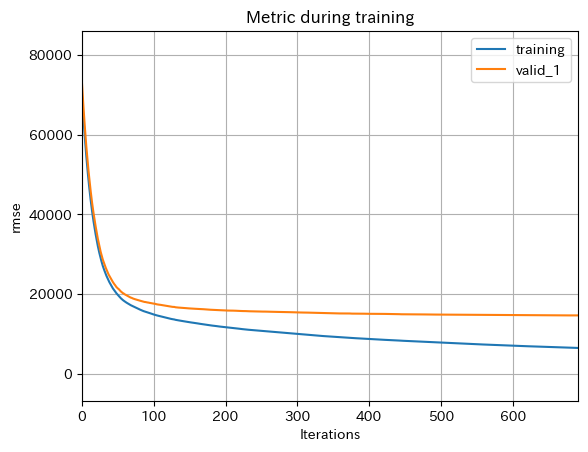

,importance
面積,4.498994e+14
L,4.006723e+14
平均地価,2.236230e+14
最寄り駅,8.765819e+13
築年数,7.751795e+13
所在地,3.841470e+13
全体の階数,3.741708e+13
一部屋あたりの面積,3.497544e+13
契約期間,1.758642e+13
所在階,1.364758e+13


In [5]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

### 新規データ（kitchen）を入れる前は16588で入れた後は16810。GOSSには新規データを入れない方が良いのか？

試しに他の新規データを入れてみる！

(カテゴリ建物構造)buildingを入れてみる。kitchenは抜く。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, building,buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_building,test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','カテゴリ建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3364
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 29
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[10]	training's rmse: 48758.5	valid_1's rmse: 50172.2
[20]	training's rmse: 34406.1	valid_1's rmse: 37856.6
[30]	training's rmse: 26005.2	valid_1's rmse: 31034.4
[40]	training's rmse: 21276.5	valid_1's rmse: 27430.5
[50]	training's rmse: 18475.2	valid_1's rmse: 25340.3
[60]	training's rmse: 16703.7	valid_1's rmse: 23937.7
[70]	training's rmse: 15546.3	valid_1's rmse: 23052.1
[80]	training's rmse: 14694.3	valid_1's rmse: 22343
[90]	training's rmse: 14000.9	valid_1's rmse: 21786.7
[100]	training's rmse: 13448.9	valid_1's rmse: 21335.6
[110]	training's rmse: 12957	valid_1's rmse: 20927
[120]	training's rmse: 12509.7	valid_1's rmse: 20622.4
[130]	training's rmse: 12129.8	valid_1's rmse: 20347
[140]	training's rmse: 11782.4	valid_1's rmse: 20132.3
[150]	training's rmse: 11450.5	valid_1's rmse: 19906.4
[160]	training's rmse: 11150.2	valid_1's rmse: 19691.2
[170]	training's rmse: 10876.2	valid_1's rmse: 19547.2
[180]	training's rmse: 10620.4	valid_1's rmse: 19401.6
[190]	training's rmse: 1040

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[30]	training's rmse: 26839.5	valid_1's rmse: 28575.9
[40]	training's rmse: 22358.9	valid_1's rmse: 24719.9
[50]	training's rmse: 19612.5	valid_1's rmse: 22383.1
[60]	training's rmse: 17839.9	valid_1's rmse: 21112.8
[70]	training's rmse: 16666	valid_1's rmse: 20326.7
[80]	training's rmse: 15833.7	valid_1's rmse: 19824
[90]	training's rmse: 15235.1	valid_1's rmse: 19341.5
[100]	training's rmse: 14674.2	valid_1's rmse: 19112.8
[110]	training's rmse: 14166.8	valid_1's rmse: 18968.4
[120]	training's rmse: 13736.3	valid_1's rmse: 18804.1
[130]	training's rmse: 13343.4	valid_1's rmse: 18704.1
[140]	training's rmse: 13028.2	valid_1's rmse: 18658.5
[150]	training's rmse: 12701.7	valid_1's rmse: 18501.8
[160]	training's rmse: 12402.2	valid_1's rmse: 18464.8
[170]	training's rmse: 12127.6	valid_1's rmse: 18358.2
[180]	training's rmse: 11829.3	valid_1's rmse: 18337.5
[190]	training's rmse: 11543	valid_1's rmse: 18244.6
[200]	training's rmse: 11296.6	valid_1's rmse: 18226.5
[210]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[10]	training's rmse: 49024.3	valid_1's rmse: 48490.9
[20]	training's rmse: 35295.7	valid_1's rmse: 33883.4
[30]	training's rmse: 27151.8	valid_1's rmse: 25697.2
[40]	training's rmse: 22472.8	valid_1's rmse: 21699.1
[50]	training's rmse: 19856	valid_1's rmse: 19868.1
[60]	training's rmse: 18050	valid_1's rmse: 18879.5
[70]	training's rmse: 16842.7	valid_1's rmse: 18379.9
[80]	training's rmse: 15845.6	valid_1's rmse: 18058.6
[90]	training's rmse: 15105.6	valid_1's rmse: 17849.8
[100]	training's rmse: 14526.1	valid_1's rmse: 17745.3
[110]	training's rmse: 14013	valid_1's rmse: 17578.4
[120]	training's rmse: 13560.3	valid_1's rmse: 17453.4
[130]	training's rmse: 13136.2	valid_1's rmse: 17394.8
[140]	training's rmse: 12777.4	valid_1's rmse: 17288.6
[150]	training's rmse: 12427.9	valid_1's rmse: 17246.7
[160]	training's rmse: 12113.1	valid_1's rmse: 17222.8
Early stopping, best iteration is:
[154]	training's rmse: 12292.4	valid_1's rmse: 17221.4
Start training...
[LightGBM] [Warning] Auto-c

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[20]	training's rmse: 34905	valid_1's rmse: 35077.7
[30]	training's rmse: 26730.8	valid_1's rmse: 28031.2
[40]	training's rmse: 22042.2	valid_1's rmse: 24226.3
[50]	training's rmse: 19320.1	valid_1's rmse: 22322.9
[60]	training's rmse: 17561.8	valid_1's rmse: 21270.7
[70]	training's rmse: 16381	valid_1's rmse: 20583.2
[80]	training's rmse: 15489.6	valid_1's rmse: 20250.5
[90]	training's rmse: 14791.3	valid_1's rmse: 20029.5
[100]	training's rmse: 14235.8	valid_1's rmse: 19810.9
[110]	training's rmse: 13744.5	valid_1's rmse: 19636.8
[120]	training's rmse: 13308.6	valid_1's rmse: 19482.9
[130]	training's rmse: 12919.3	valid_1's rmse: 19322.3
[140]	training's rmse: 12620.8	valid_1's rmse: 19252.5
[150]	training's rmse: 12316.8	valid_1's rmse: 19162
[160]	training's rmse: 12019.1	valid_1's rmse: 19015
[170]	training's rmse: 11763.4	valid_1's rmse: 18994.4
[180]	training's rmse: 11507.4	valid_1's rmse: 18916.1
[190]	training's rmse: 11269.6	valid_1's rmse: 18823.1
[200]	training's rmse: 110

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' c

[10]	training's rmse: 48652.8	valid_1's rmse: 50986.9
[20]	training's rmse: 34829	valid_1's rmse: 36961.6
[30]	training's rmse: 26806.6	valid_1's rmse: 28531.9
[40]	training's rmse: 22502.9	valid_1's rmse: 24045.8
[50]	training's rmse: 19919.7	valid_1's rmse: 21473.3
[60]	training's rmse: 18233	valid_1's rmse: 19867.7
[70]	training's rmse: 16961.9	valid_1's rmse: 18870
[80]	training's rmse: 16145.2	valid_1's rmse: 18291
[90]	training's rmse: 15366.1	valid_1's rmse: 17925
[100]	training's rmse: 14867.1	valid_1's rmse: 17616.1
[110]	training's rmse: 14410.2	valid_1's rmse: 17353
[120]	training's rmse: 13985.4	valid_1's rmse: 17148.5
[130]	training's rmse: 13567.1	valid_1's rmse: 16939.7
[140]	training's rmse: 13235.4	valid_1's rmse: 16799.5
[150]	training's rmse: 12903.3	valid_1's rmse: 16627.5
[160]	training's rmse: 12645.6	valid_1's rmse: 16527.8
[170]	training's rmse: 12367.2	valid_1's rmse: 16376.9
[180]	training's rmse: 12111.9	valid_1's rmse: 16205.1
[190]	training's rmse: 11852.9	

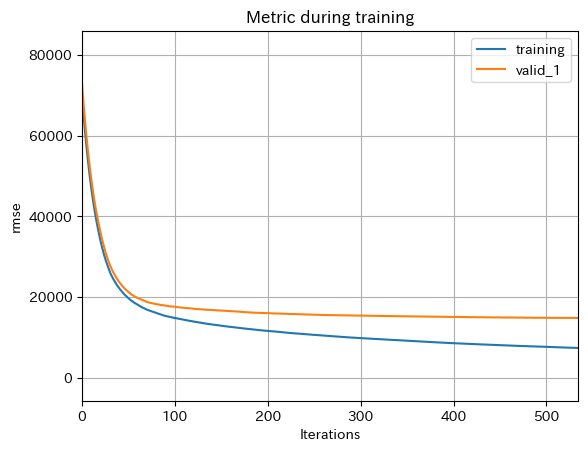

,importance
面積,4.530009e+14
L,3.969009e+14
平均地価,2.158139e+14
最寄り駅,8.398554e+13
築年数,7.516010e+13
所在地,3.757919e+13
一部屋あたりの面積,3.186134e+13
全体の階数,2.814212e+13
契約期間,1.601099e+13
カテゴリ建物構造,1.261306e+13


In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

カテゴリ建物構造もいらないか。。。それでは建物構造を抜いて、カテゴリ建物構造だけにするのはどうか。

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, building, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_building,test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','カテゴリ建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48758.9	valid_1's rmse: 50171.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[20]	training's rmse: 34365.2	valid_1's rmse: 37811.2
[30]	training's rmse: 25820.7	valid_1's rmse: 30904.2
[40]	training's rmse: 21083.1	valid_1's rmse: 27239.4
[50]	training's rmse: 18296.3	valid_1's rmse: 25053.1
[60]	training's rmse: 16536.1	valid_1's rmse: 23689.7
[70]	training's rmse: 15356.7	valid_1's rmse: 22777.6
[80]	training's rmse: 14491.9	valid_1's rmse: 22085.3
[90]	training's rmse: 13868.9	valid_1's rmse: 21653.1
[100]	training's rmse: 13267.7	valid_1's rmse: 21153
[110]	training's rmse: 12787.9	valid_1's rmse: 20782.3
[120]	training's rmse: 12370.4	valid_1's rmse: 20472.1
[130]	training's rmse: 11992.4	valid_1's rmse: 20204.8
[140]	training's rmse: 11613.5	valid_1's rmse: 19915.9
[150]	training's rmse: 11282.4	valid_1's rmse: 19724.3
[160]	training's rmse: 10985.6	valid_1's rmse: 19526.2
[170]	training's rmse: 10736.3	valid_1's rmse: 19406.6
[180]	training's rmse: 10503.4	valid_1's rmse: 19290.8
[190]	training's rmse: 10267.3	valid_1's rmse: 19138.5
[200]	training's rms

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[30]	training's rmse: 26983.3	valid_1's rmse: 28749.4
[40]	training's rmse: 22412.2	valid_1's rmse: 24526.2
[50]	training's rmse: 19740.8	valid_1's rmse: 22402.5
[60]	training's rmse: 17934.6	valid_1's rmse: 21048.8
[70]	training's rmse: 16687.9	valid_1's rmse: 20203.1
[80]	training's rmse: 15766.7	valid_1's rmse: 19652
[90]	training's rmse: 15142.7	valid_1's rmse: 19225
[100]	training's rmse: 14615.9	valid_1's rmse: 18973.4
[110]	training's rmse: 14177.9	valid_1's rmse: 18886.4
[120]	training's rmse: 13728.4	valid_1's rmse: 18689.8
[130]	training's rmse: 13330.4	valid_1's rmse: 18695
Early stopping, best iteration is:
[126]	training's rmse: 13478.8	valid_1's rmse: 18672.4
Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data poin

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[10]	training's rmse: 49025.1	valid_1's rmse: 48491.1
[20]	training's rmse: 35302.1	valid_1's rmse: 33814.2
[30]	training's rmse: 27053.1	valid_1's rmse: 25802.3
[40]	training's rmse: 22488.4	valid_1's rmse: 21874.3
[50]	training's rmse: 19675.5	valid_1's rmse: 19748.7
[60]	training's rmse: 17902.6	valid_1's rmse: 18617.2
[70]	training's rmse: 16671.7	valid_1's rmse: 18035.7
[80]	training's rmse: 15811.5	valid_1's rmse: 17788.3
[90]	training's rmse: 15115.5	valid_1's rmse: 17597.7
[100]	training's rmse: 14555.2	valid_1's rmse: 17428.4
[110]	training's rmse: 14013.1	valid_1's rmse: 17309.2
[120]	training's rmse: 13530.3	valid_1's rmse: 17200
[130]	training's rmse: 13125.3	valid_1's rmse: 17064.6
[140]	training's rmse: 12756.9	valid_1's rmse: 17011.9
[150]	training's rmse: 12423.8	valid_1's rmse: 16924.5
[160]	training's rmse: 12138.9	valid_1's rmse: 16871.6
[170]	training's rmse: 11877.7	valid_1's rmse: 16836.2
[180]	training's rmse: 11621.6	valid_1's rmse: 16814.6
[190]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 49173.1	valid_1's rmse: 48165.3
[20]	training's rmse: 34983.1	valid_1's rmse: 35054.7
[30]	training's rmse: 26482.8	valid_1's rmse: 27911.7
[40]	training's rmse: 21762.1	valid_1's rmse: 24249.7
[50]	training's rmse: 19146.4	valid_1's rmse: 22411.8
[60]	training's rmse: 17456.8	valid_1's rmse: 21340.5
[70]	training's rmse: 16201.2	valid_1's rmse: 20572.3
[80]	training's rmse: 15284.7	valid_1's rmse: 20241.1
[90]	training's rmse: 14597.4	valid_1's rmse: 20046.9
[100]	training's rmse: 14052.2	valid_1's rmse: 19862.6
[110]	training's rmse: 13574.5	valid_1's rmse: 19749.4
[120]	training's rmse: 13170.7	valid_1's rmse: 19627.1
[130]	training's rmse: 12767	valid_1's rmse: 19481.8
[140]	training's rmse: 12446.9	valid_1's rmse: 19430.2
[150]	training's rmse: 12172.3	valid_1's rmse: 19326.4
[160]	training's rmse: 11873	valid_1's rmse: 19202.7
[170]	training's rmse: 11606.1	valid_1's rmse: 19084.3
[180]	training's 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'カテゴリ建物構造', 'バス・トイレ別', '定期借家', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback 

[20]	training's rmse: 34844	valid_1's rmse: 36982.8
[30]	training's rmse: 26763.8	valid_1's rmse: 28576.9
[40]	training's rmse: 22450.2	valid_1's rmse: 24010.2
[50]	training's rmse: 19703.7	valid_1's rmse: 21176.1
[60]	training's rmse: 18029.9	valid_1's rmse: 19664.7
[70]	training's rmse: 16931.1	valid_1's rmse: 18753.4
[80]	training's rmse: 16110.1	valid_1's rmse: 18183.3
[90]	training's rmse: 15423.2	valid_1's rmse: 17706.1
[100]	training's rmse: 14847.6	valid_1's rmse: 17352.1
[110]	training's rmse: 14365.1	valid_1's rmse: 17080.5
[120]	training's rmse: 13912.3	valid_1's rmse: 16838.3
[130]	training's rmse: 13546.1	valid_1's rmse: 16633.7
[140]	training's rmse: 13234	valid_1's rmse: 16495.6
[150]	training's rmse: 12930.1	valid_1's rmse: 16337.5
[160]	training's rmse: 12625	valid_1's rmse: 16202.7
[170]	training's rmse: 12311.5	valid_1's rmse: 16034.6
[180]	training's rmse: 12059	valid_1's rmse: 15887.6
[190]	training's rmse: 11828.1	valid_1's rmse: 15763.1
[200]	training's rmse: 116

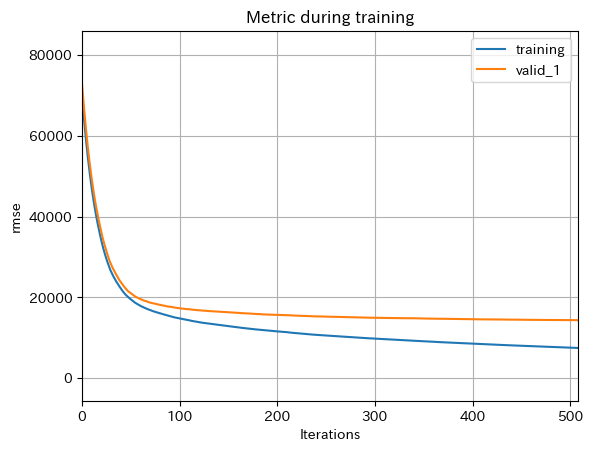

,importance
面積,4.572407e+14
L,3.905568e+14
平均地価,2.248751e+14
最寄り駅,7.963554e+13
築年数,7.386276e+13
所在地,3.621500e+13
一部屋あたりの面積,3.009375e+13
全体の階数,2.755503e+13
契約期間,1.697667e+13
所在階,1.304133e+13


In [14]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

これでも新規データを入れていない時のハイスコア16588には及ばない・・・

室内設備(equipments)を入れるのはどうか

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings,over100m2, bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points, equipments], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings,test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points, test_equipments], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満',
'エアコン付','シューズボックス','バルコニー','フローリング','室内洗濯機置場',
'敷地内ごみ置き場','エレベーター','公営水道','水道その他','下水','汲み取り','都市ガス','プロパンガス','タイル張',
'ウォークインクローゼット','2面採光','3面採光','24時間換気システム','ペアガラス','庭','クッションフロア','床暖房','ロフト',
'出窓','トランクルーム','オール電化']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 53
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48761.6	valid_1's rmse: 50136.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '24時間換気システム', '2面採光', '3面採光', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'ウォークインクローゼット', 'エアコン付', 'エレベーター', 'オール電化', 'クッションフロア', 'シューズボックス', 'タイル張', 'トランクルーム', 'バス・トイレ別', 'バルコニー', 'フローリング', 'プロパンガス', 'ペアガラス', 'ロフト', '下水', '公営水道', '出窓', '定期借家', '室内洗濯機置場', '床暖房', '庭', '建物構造', '所在地', '敷地内ごみ置き場', '最寄り駅', '水道その他', '汲み取り', '都市ガス']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[20]	training's rmse: 34371.5	valid_1's rmse: 37785
[30]	training's rmse: 25954.6	valid_1's rmse: 30899.6
[40]	training's rmse: 21271.7	valid_1's rmse: 27384.7
[50]	training's rmse: 18412.1	valid_1's rmse: 25264.7
[60]	training's rmse: 16552	valid_1's rmse: 23862
[70]	training's rmse: 15332.1	valid_1's rmse: 22880.6
[80]	training's rmse: 14519.9	valid_1's rmse: 22262.5
[90]	training's rmse: 13868.3	valid_1's rmse: 21738.9
[100]	training's rmse: 13281.9	valid_1's rmse: 21312
[110]	training's rmse: 12848.7	valid_1's rmse: 21015.9
[120]	training's rmse: 12432.7	valid_1's rmse: 20775.1
[130]	training's rmse: 12032.3	valid_1's rmse: 20476.8
[140]	training's rmse: 11673.1	valid_1's rmse: 20247.9
[150]	training's rmse: 11338.1	valid_1's rmse: 20026.8
[160]	training's rmse: 11018.6	valid_1's rmse: 19837.9
[170]	training's rmse: 10718.7	valid_1's rmse: 19658
[180]	training's rmse: 10463.7	valid_1's rmse: 19526.5
[190]	training's rmse: 10213.8	valid_1's rmse: 19393.4
[200]	training's rmse: 9983.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '24時間換気システム', '2面採光', '3面採光', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'ウォークインクローゼット', 'エアコン付', 'エレベーター', 'オール電化', 'クッションフロア', 'シューズボックス', 'タイル張', 'トランクルーム', 'バス・トイレ別', 'バルコニー', 'フローリング', 'プロパンガス', 'ペアガラス', 'ロフト', '下水', '公営水道', '出窓', '定期借家', '室内洗濯機置場', '床暖房', '庭', '建物構造', '所在地', '敷地内ごみ置き場', '最寄り駅', '水道その他', '汲み取り', '都市ガス']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[20]	training's rmse: 34905.7	valid_1's rmse: 36061
[30]	training's rmse: 26831.7	valid_1's rmse: 28624.6
[40]	training's rmse: 22397.8	valid_1's rmse: 24612.7
[50]	training's rmse: 19675.7	valid_1's rmse: 22286.4
[60]	training's rmse: 17900.5	valid_1's rmse: 20969.4
[70]	training's rmse: 16756.6	valid_1's rmse: 20053.9
[80]	training's rmse: 15893.8	valid_1's rmse: 19544.7
[90]	training's rmse: 15266.4	valid_1's rmse: 19218.9
[100]	training's rmse: 14710.9	valid_1's rmse: 18984.8
[110]	training's rmse: 14251.5	valid_1's rmse: 18874.6
[120]	training's rmse: 13825.5	valid_1's rmse: 18807.2
[130]	training's rmse: 13436.6	valid_1's rmse: 18670.4
[140]	training's rmse: 13117.8	valid_1's rmse: 18610
[150]	training's rmse: 12755.8	valid_1's rmse: 18517.9
[160]	training's rmse: 12457	valid_1's rmse: 18368.5
[170]	training's rmse: 12161	valid_1's rmse: 18319.7
Early stopping, best iteration is:
[169]	training's rmse: 12207.8	valid_1's rmse: 18297.3
Start training...
[LightGBM] [Warning] Auto-ch

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '24時間換気システム', '2面採光', '3面採光', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'ウォークインクローゼット', 'エアコン付', 'エレベーター', 'オール電化', 'クッションフロア', 'シューズボックス', 'タイル張', 'トランクルーム', 'バス・トイレ別', 'バルコニー', 'フローリング', 'プロパンガス', 'ペアガラス', 'ロフト', '下水', '公営水道', '出窓', '定期借家', '室内洗濯機置場', '床暖房', '庭', '建物構造', '所在地', '敷地内ごみ置き場', '最寄り駅', '水道その他', '汲み取り', '都市ガス']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[10]	training's rmse: 49033.9	valid_1's rmse: 48462.9
[20]	training's rmse: 35308.3	valid_1's rmse: 33803.8
[30]	training's rmse: 27085.9	valid_1's rmse: 25605.6
[40]	training's rmse: 22483.7	valid_1's rmse: 21597.3
[50]	training's rmse: 19694.2	valid_1's rmse: 19751.1
[60]	training's rmse: 17893.7	valid_1's rmse: 18748.5
[70]	training's rmse: 16635	valid_1's rmse: 18191.4
[80]	training's rmse: 15663.2	valid_1's rmse: 17825.2
[90]	training's rmse: 14907.1	valid_1's rmse: 17707.7
[100]	training's rmse: 14390.3	valid_1's rmse: 17493
[110]	training's rmse: 13887.9	valid_1's rmse: 17389.7
[120]	training's rmse: 13471.2	valid_1's rmse: 17299.7
[130]	training's rmse: 13036.9	valid_1's rmse: 17226.8
[140]	training's rmse: 12688.9	valid_1's rmse: 17125.5
[150]	training's rmse: 12343.7	valid_1's rmse: 17108.3
[160]	training's rmse: 12035.4	valid_1's rmse: 17055.1
[170]	training's rmse: 11731.3	valid_1's rmse: 17044.7
[180]	training's rmse: 11426.7	valid_1's rmse: 16992
[190]	training's rmse: 11

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '24時間換気システム', '2面採光', '3面採光', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'ウォークインクローゼット', 'エアコン付', 'エレベーター', 'オール電化', 'クッションフロア', 'シューズボックス', 'タイル張', 'トランクルーム', 'バス・トイレ別', 'バルコニー', 'フローリング', 'プロパンガス', 'ペアガラス', 'ロフト', '下水', '公営水道', '出窓', '定期借家', '室内洗濯機置場', '床暖房', '庭', '建物構造', '所在地', '敷地内ごみ置き場', '最寄り駅', '水道その他', '汲み取り', '都市ガス']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[20]	training's rmse: 35031.7	valid_1's rmse: 35095.6
[30]	training's rmse: 26554.4	valid_1's rmse: 27990.4
[40]	training's rmse: 21941.7	valid_1's rmse: 24316.3
[50]	training's rmse: 19176.6	valid_1's rmse: 22302.9
[60]	training's rmse: 17470.8	valid_1's rmse: 21233.2
[70]	training's rmse: 16274	valid_1's rmse: 20638.6
[80]	training's rmse: 15407.9	valid_1's rmse: 20292.9
[90]	training's rmse: 14760.6	valid_1's rmse: 20113.6
[100]	training's rmse: 14150.5	valid_1's rmse: 19902.6
[110]	training's rmse: 13679.1	valid_1's rmse: 19728.3
[120]	training's rmse: 13254.7	valid_1's rmse: 19593.3
[130]	training's rmse: 12911.9	valid_1's rmse: 19426.5
[140]	training's rmse: 12533.2	valid_1's rmse: 19337.4
[150]	training's rmse: 12217.4	valid_1's rmse: 19297
[160]	training's rmse: 11923.4	valid_1's rmse: 19203.6
[170]	training's rmse: 11658.9	valid_1's rmse: 19148
[180]	training's rmse: 11397.9	valid_1's rmse: 19029.5
[190]	training's rmse: 11153.3	valid_1's rmse: 18925.3
[200]	training's rmse: 1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '24時間換気システム', '2面採光', '3面採光', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'ウォークインクローゼット', 'エアコン付', 'エレベーター', 'オール電化', 'クッションフロア', 'シューズボックス', 'タイル張', 'トランクルーム', 'バス・トイレ別', 'バルコニー', 'フローリング', 'プロパンガス', 'ペアガラス', 'ロフト', '下水', '公営水道', '出窓', '定期借家', '室内洗濯機置場', '床暖房', '庭', '建物構造', '所在地', '敷地内ごみ置き場', '最寄り駅', '水道その他', '汲み取り', '都市ガス']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 53
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118154.683071
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48656.9	valid_1's rmse: 50963.4
[20]	training's rmse: 34873	valid_1's rmse: 36926.5
[30]	training's rmse: 26996.5	valid_1's rmse: 28647.5
[40]	training's rmse: 22511.2	valid_1's rmse: 23968
[50]	training's rmse: 19762.9	valid_1's rmse: 21216.4
[60]	training's rmse: 18055.6	valid_1's rmse: 19634.5
[70]	training's rmse: 16897.8	valid_1's rmse: 18628.4
[80]	training's rmse: 16023.9	valid_1's rmse: 18005.1
[90]	training's rmse: 15337.4	valid_1's rmse: 17548.6
[100]	training

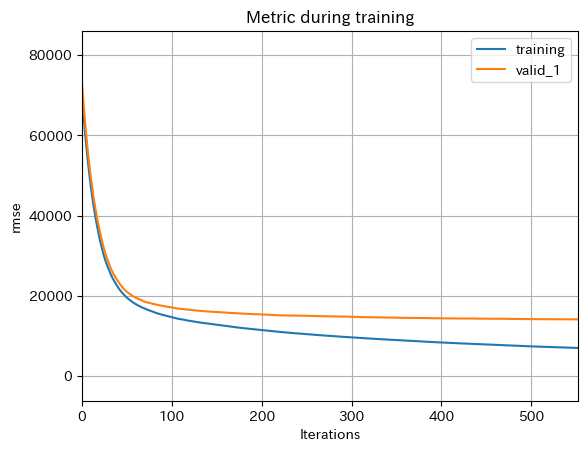

,importance
面積,4.483854e+14
L,3.984056e+14
平均地価,2.248951e+14
最寄り駅,7.836191e+13
築年数,7.185425e+13
所在地,3.565189e+13
一部屋あたりの面積,3.087979e+13
全体の階数,2.720448e+13
契約期間,1.710894e+13
所在階,1.299159e+13


In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

室内設備もだめ・・・

駐車場（parking）を入れてみる！

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
bath_toilet_points = pd.read_csv('../data/handmade_data/bath_toilet_points.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
parkings = pd.read_csv('../data/handmade_data/parkings.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_bath_toilet_points = pd.read_csv('../data/test_data/test_bath_toilet_points.csv')
test_broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
test_parkings = pd.read_csv('../data/test_data/test_parkings.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent,sepa_bath_toilets, floor_scores2, Floor_scores2, 
                    stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], 
                    buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, 
                    parkings], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent,test_sepa_bath_toilets, test_floor_scores2, test_Floor_scores2, 
                    test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],
                    test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms,
                    test_parkings], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 
                    '駐車場空有','駐車場空無','駐車場無','駐車場近隣',
                    '駐輪場空有','駐輪場無','バイク置き場無','バイク置き場空有'
                    ]

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バイク置き場無', 'バイク置き場空有', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '駐車場無', '駐車場空有', '駐車場空無', '駐車場近隣', '駐輪場無', '駐輪場空有']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be rem

[10]	training's rmse: 48812.3	valid_1's rmse: 50187.7
[20]	training's rmse: 34409.1	valid_1's rmse: 37795.9
[30]	training's rmse: 25895.8	valid_1's rmse: 30888.7
[40]	training's rmse: 21203.7	valid_1's rmse: 27305.2
[50]	training's rmse: 18338.7	valid_1's rmse: 25144.5
[60]	training's rmse: 16600.9	valid_1's rmse: 23830.8
[70]	training's rmse: 15456.7	valid_1's rmse: 22921.4
[80]	training's rmse: 14601.9	valid_1's rmse: 22262.6
[90]	training's rmse: 13951.2	valid_1's rmse: 21760.7
[100]	training's rmse: 13445.4	valid_1's rmse: 21366.4
[110]	training's rmse: 12952.7	valid_1's rmse: 20979.3
[120]	training's rmse: 12498.9	valid_1's rmse: 20632.5
[130]	training's rmse: 12111.8	valid_1's rmse: 20343.2
[140]	training's rmse: 11773.6	valid_1's rmse: 20120.5
[150]	training's rmse: 11458.7	valid_1's rmse: 19920
[160]	training's rmse: 11166	valid_1's rmse: 19696.7
[170]	training's rmse: 10883.8	valid_1's rmse: 19522.6
[180]	training's rmse: 10626.5	valid_1's rmse: 19320.3
[190]	training's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バイク置き場無', 'バイク置き場空有', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '駐車場無', '駐車場空有', '駐車場空無', '駐車場近隣', '駐輪場無', '駐輪場空有']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be rem

[20]	training's rmse: 34911.1	valid_1's rmse: 35956.5
[30]	training's rmse: 26889.8	valid_1's rmse: 28550.7
[40]	training's rmse: 22636.3	valid_1's rmse: 24701.3
[50]	training's rmse: 19937.8	valid_1's rmse: 22364.6
[60]	training's rmse: 18246.5	valid_1's rmse: 21080.7
[70]	training's rmse: 17010.7	valid_1's rmse: 20236
[80]	training's rmse: 16148.5	valid_1's rmse: 19712.9
[90]	training's rmse: 15497.9	valid_1's rmse: 19377.2
[100]	training's rmse: 14970.4	valid_1's rmse: 19093.6
[110]	training's rmse: 14457.8	valid_1's rmse: 18986.8
[120]	training's rmse: 14039.4	valid_1's rmse: 18961.3
[130]	training's rmse: 13630.4	valid_1's rmse: 18779.2
[140]	training's rmse: 13290.4	valid_1's rmse: 18714.5
[150]	training's rmse: 12933.4	valid_1's rmse: 18579.4
[160]	training's rmse: 12615.7	valid_1's rmse: 18512.5
[170]	training's rmse: 12316.6	valid_1's rmse: 18551.1
Early stopping, best iteration is:
[162]	training's rmse: 12548.1	valid_1's rmse: 18497.3
Start training...
[LightGBM] [Warning] A

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バイク置き場無', 'バイク置き場空有', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '駐車場無', '駐車場空有', '駐車場空無', '駐車場近隣', '駐輪場無', '駐輪場空有']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be rem

[10]	training's rmse: 49016.2	valid_1's rmse: 48360.2
[20]	training's rmse: 35392.8	valid_1's rmse: 33898.7
[30]	training's rmse: 27253	valid_1's rmse: 25734.9
[40]	training's rmse: 22619.4	valid_1's rmse: 21614.5
[50]	training's rmse: 19847.1	valid_1's rmse: 19649.3
[60]	training's rmse: 17983.1	valid_1's rmse: 18639.6
[70]	training's rmse: 16848.3	valid_1's rmse: 18077.1
[80]	training's rmse: 15943.3	valid_1's rmse: 17776.8
[90]	training's rmse: 15245	valid_1's rmse: 17566.8
[100]	training's rmse: 14629.2	valid_1's rmse: 17452.7
[110]	training's rmse: 14114.3	valid_1's rmse: 17314.9
[120]	training's rmse: 13658.8	valid_1's rmse: 17267.8
[130]	training's rmse: 13293.6	valid_1's rmse: 17213.2
[140]	training's rmse: 12979.4	valid_1's rmse: 17148.1
[150]	training's rmse: 12670.7	valid_1's rmse: 17048
[160]	training's rmse: 12355.6	valid_1's rmse: 17000.4
[170]	training's rmse: 12065.1	valid_1's rmse: 16927.9
[180]	training's rmse: 11825.8	valid_1's rmse: 16905.7
[190]	training's rmse: 11

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バイク置き場無', 'バイク置き場空有', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '駐車場無', '駐車場空有', '駐車場空無', '駐車場近隣', '駐輪場無', '駐輪場空有']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be rem

[10]	training's rmse: 49235.1	valid_1's rmse: 48160.1
[20]	training's rmse: 35046.4	valid_1's rmse: 35148.7
[30]	training's rmse: 26776.9	valid_1's rmse: 28171.4
[40]	training's rmse: 22226	valid_1's rmse: 24546
[50]	training's rmse: 19568.9	valid_1's rmse: 22586.2
[60]	training's rmse: 17908.1	valid_1's rmse: 21478.2
[70]	training's rmse: 16719.7	valid_1's rmse: 20923.1
[80]	training's rmse: 15743.9	valid_1's rmse: 20558.5
[90]	training's rmse: 15045.2	valid_1's rmse: 20347.9
[100]	training's rmse: 14513.2	valid_1's rmse: 20172.5
[110]	training's rmse: 14065.6	valid_1's rmse: 20033.1
[120]	training's rmse: 13661	valid_1's rmse: 19930.5
[130]	training's rmse: 13269	valid_1's rmse: 19777.7
[140]	training's rmse: 12891.4	valid_1's rmse: 19595.8
[150]	training's rmse: 12583.8	valid_1's rmse: 19457.2
[160]	training's rmse: 12241.4	valid_1's rmse: 19436.5
[170]	training's rmse: 11976.2	valid_1's rmse: 19421.9
[180]	training's rmse: 11714.9	valid_1's rmse: 19381.8
[190]	training's rmse: 1148

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バイク置き場無', 'バイク置き場空有', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '駐車場無', '駐車場空有', '駐車場空無', '駐車場近隣', '駐輪場無', '駐輪場空有']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be rem

[20]	training's rmse: 34868.6	valid_1's rmse: 36930.5
[30]	training's rmse: 26955.5	valid_1's rmse: 28638.8
[40]	training's rmse: 22566.4	valid_1's rmse: 23994.6
[50]	training's rmse: 19961.2	valid_1's rmse: 21350.2
[60]	training's rmse: 18291.8	valid_1's rmse: 19822.7
[70]	training's rmse: 17076.4	valid_1's rmse: 18806.6
[80]	training's rmse: 16204.1	valid_1's rmse: 18166.8
[90]	training's rmse: 15516.3	valid_1's rmse: 17770.2
[100]	training's rmse: 14939.7	valid_1's rmse: 17424.1
[110]	training's rmse: 14440.4	valid_1's rmse: 17165.1
[120]	training's rmse: 13960.8	valid_1's rmse: 16936.6
[130]	training's rmse: 13552.9	valid_1's rmse: 16749
[140]	training's rmse: 13210	valid_1's rmse: 16552.1
[150]	training's rmse: 12940.2	valid_1's rmse: 16406.5
[160]	training's rmse: 12687.8	valid_1's rmse: 16310.2
[170]	training's rmse: 12433.8	valid_1's rmse: 16226.8
[180]	training's rmse: 12164.8	valid_1's rmse: 16093.6
[190]	training's rmse: 11920.2	valid_1's rmse: 15980.1
[200]	training's rmse:

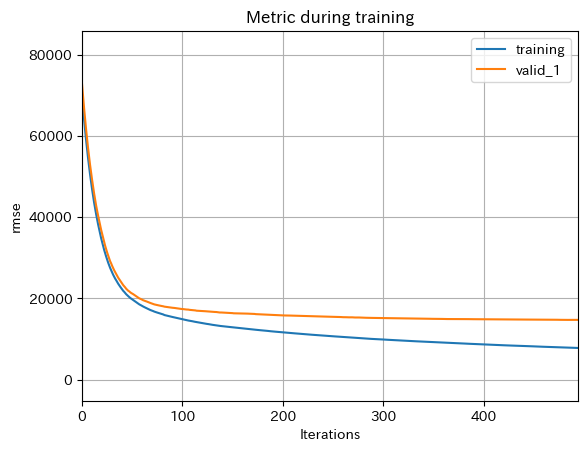

,importance
面積,4.561433e+14
L,3.952901e+14
平均地価,2.195160e+14
最寄り駅,8.200063e+13
築年数,7.647346e+13
所在地,3.824912e+13
全体の階数,3.621829e+13
一部屋あたりの面積,3.396300e+13
契約期間,1.759336e+13
所在階,1.319413e+13


In [20]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

駐車場もだめ！

例えば「床暖房」だけ入れてみたりしたらどうか？？

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings,over100m2, bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points, equipments['床暖房']], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings,test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points, test_equipments['床暖房']], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満','床暖房']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3357
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 29
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48765.5	valid_1's rmse: 50129.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '床暖房', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callba

[20]	training's rmse: 34333.8	valid_1's rmse: 37694.1
[30]	training's rmse: 25900.7	valid_1's rmse: 30816.7
[40]	training's rmse: 21073	valid_1's rmse: 27101.1
[50]	training's rmse: 18294.9	valid_1's rmse: 25037.4
[60]	training's rmse: 16549.2	valid_1's rmse: 23648.7
[70]	training's rmse: 15379.7	valid_1's rmse: 22780.9
[80]	training's rmse: 14549	valid_1's rmse: 22082.3
[90]	training's rmse: 13880.2	valid_1's rmse: 21510
[100]	training's rmse: 13359.7	valid_1's rmse: 21132.9
[110]	training's rmse: 12921	valid_1's rmse: 20872.5
[120]	training's rmse: 12527.2	valid_1's rmse: 20573.5
[130]	training's rmse: 12140.6	valid_1's rmse: 20274.6
[140]	training's rmse: 11790.7	valid_1's rmse: 20046.9
[150]	training's rmse: 11477.2	valid_1's rmse: 19841.6
[160]	training's rmse: 11191.5	valid_1's rmse: 19663.5
[170]	training's rmse: 10921.7	valid_1's rmse: 19502.6
[180]	training's rmse: 10667.7	valid_1's rmse: 19371.9
[190]	training's rmse: 10428.3	valid_1's rmse: 19223.3
[200]	training's rmse: 102

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '床暖房', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callba

[30]	training's rmse: 26780.9	valid_1's rmse: 28604.1
[40]	training's rmse: 22398.8	valid_1's rmse: 24706.1
[50]	training's rmse: 19675.4	valid_1's rmse: 22409.5
[60]	training's rmse: 18060.4	valid_1's rmse: 21082.2
[70]	training's rmse: 16920.7	valid_1's rmse: 20207.9
[80]	training's rmse: 16014.5	valid_1's rmse: 19758.4
[90]	training's rmse: 15350.8	valid_1's rmse: 19340.2
[100]	training's rmse: 14745.9	valid_1's rmse: 19171.8
[110]	training's rmse: 14295.5	valid_1's rmse: 18918.8
[120]	training's rmse: 13855	valid_1's rmse: 18788
[130]	training's rmse: 13422.9	valid_1's rmse: 18759.9
[140]	training's rmse: 13062.5	valid_1's rmse: 18728.2
Early stopping, best iteration is:
[136]	training's rmse: 13215.1	valid_1's rmse: 18722.2
Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '床暖房', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callba

[20]	training's rmse: 35357.3	valid_1's rmse: 33860
[30]	training's rmse: 27248.6	valid_1's rmse: 25707.4
[40]	training's rmse: 22602.1	valid_1's rmse: 21627
[50]	training's rmse: 19748.3	valid_1's rmse: 19689
[60]	training's rmse: 17966.3	valid_1's rmse: 18761.8
[70]	training's rmse: 16722.2	valid_1's rmse: 18167.1
[80]	training's rmse: 15827.3	valid_1's rmse: 17849.3
[90]	training's rmse: 15073.8	valid_1's rmse: 17685.7
[100]	training's rmse: 14478.9	valid_1's rmse: 17570.4
[110]	training's rmse: 14035.3	valid_1's rmse: 17436
[120]	training's rmse: 13586.1	valid_1's rmse: 17358.7
[130]	training's rmse: 13174.4	valid_1's rmse: 17259.6
[140]	training's rmse: 12810	valid_1's rmse: 17207
[150]	training's rmse: 12505.3	valid_1's rmse: 17104.2
[160]	training's rmse: 12168.3	valid_1's rmse: 17026.1
[170]	training's rmse: 11910.2	valid_1's rmse: 16993.7
[180]	training's rmse: 11660.4	valid_1's rmse: 16965.9
[190]	training's rmse: 11398.6	valid_1's rmse: 16962.2
[200]	training's rmse: 11132.2

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '床暖房', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callba

[20]	training's rmse: 35032.1	valid_1's rmse: 35111.9
[30]	training's rmse: 26658.6	valid_1's rmse: 28077
[40]	training's rmse: 22001.9	valid_1's rmse: 24399.3
[50]	training's rmse: 19305.1	valid_1's rmse: 22393.1
[60]	training's rmse: 17449.6	valid_1's rmse: 21228.4
[70]	training's rmse: 16220.6	valid_1's rmse: 20475.7
[80]	training's rmse: 15419.6	valid_1's rmse: 20136.2
[90]	training's rmse: 14737.6	valid_1's rmse: 19981.7
[100]	training's rmse: 14174.4	valid_1's rmse: 19831.8
[110]	training's rmse: 13712.7	valid_1's rmse: 19639.1
[120]	training's rmse: 13310	valid_1's rmse: 19561.8
[130]	training's rmse: 12923	valid_1's rmse: 19368
[140]	training's rmse: 12573.9	valid_1's rmse: 19230.6
[150]	training's rmse: 12285.2	valid_1's rmse: 19137.4
[160]	training's rmse: 12022.4	valid_1's rmse: 19053.9
[170]	training's rmse: 11744.7	valid_1's rmse: 18956.8
[180]	training's rmse: 11496.5	valid_1's rmse: 18919.6
[190]	training's rmse: 11264.1	valid_1's rmse: 18882
[200]	training's rmse: 11019

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'L', 'S', 'バス・トイレ別', '定期借家', '床暖房', '建物構造', '所在地', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callba

[10]	training's rmse: 48644.1	valid_1's rmse: 50930.1
[20]	training's rmse: 34931.8	valid_1's rmse: 36939.9
[30]	training's rmse: 27026.6	valid_1's rmse: 28731
[40]	training's rmse: 22601.4	valid_1's rmse: 24141.6
[50]	training's rmse: 19937.3	valid_1's rmse: 21671.4
[60]	training's rmse: 18302.8	valid_1's rmse: 20060.9
[70]	training's rmse: 17033.8	valid_1's rmse: 18935.2
[80]	training's rmse: 16206.6	valid_1's rmse: 18343.3
[90]	training's rmse: 15491.4	valid_1's rmse: 17830.8
[100]	training's rmse: 14953.3	valid_1's rmse: 17529.6
[110]	training's rmse: 14496.3	valid_1's rmse: 17268.3
[120]	training's rmse: 14083.3	valid_1's rmse: 17043.5
[130]	training's rmse: 13701.1	valid_1's rmse: 16854.9
[140]	training's rmse: 13367.8	valid_1's rmse: 16721.3
[150]	training's rmse: 13062	valid_1's rmse: 16564
[160]	training's rmse: 12724.7	valid_1's rmse: 16400
[170]	training's rmse: 12450.7	valid_1's rmse: 16276.7
[180]	training's rmse: 12199	valid_1's rmse: 16114.8
[190]	training's rmse: 11971.

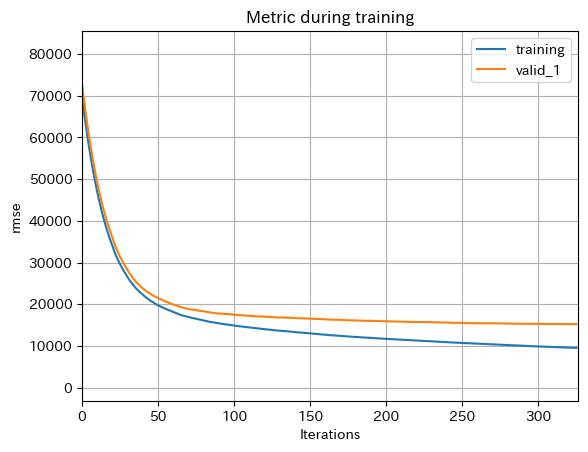

,importance
面積,4.475879e+14
L,4.009355e+14
平均地価,2.195669e+14
最寄り駅,8.110064e+13
築年数,7.011861e+13
全体の階数,3.420569e+13
所在地,3.183437e+13
一部屋あたりの面積,2.649652e+13
契約期間,1.705872e+13
所在階,1.201380e+13


In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

「床暖房」だけ入れてみれもダメ

## 仕方ない、やはりGOSSの場合は何も新規状態を入れてない時の16588が最良！

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
kitchen_points.drop('コンロ3口', axis=1, inplace=True)
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_kitchen_points.drop('コンロ3口', axis=1, inplace=True)
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2,bt75and100m2, area_per_rooms, kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家','最寄り駅', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満',  'コンロ2口']

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 21
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 118516.069987
Training until validation scores don't improve for 10 rounds
[10]	training's rmse: 48741	valid_1's rmse: 50099.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 34205.6	valid_1's rmse: 37601.7
[30]	training's rmse: 25577.1	valid_1's rmse: 30627.3
[40]	training's rmse: 20802.9	valid_1's rmse: 26979.6
[50]	training's rmse: 18016.9	valid_1's rmse: 24872.4
[60]	training's rmse: 16370.3	valid_1's rmse: 23602.6
[70]	training's rmse: 15270	valid_1's rmse: 22760.1
[80]	training's rmse: 14503.9	valid_1's rmse: 22160.6
[90]	training's rmse: 13863.5	valid_1's rmse: 21695.8
[100]	training's rmse: 13355.1	valid_1's rmse: 21319.8
[110]	training's rmse: 12921.9	valid_1's rmse: 20984.4
[120]	training's rmse: 12492.5	valid_1's rmse: 20642.5
[130]	training's rmse: 12138.4	valid_1's rmse: 20367.7
[140]	training's rmse: 11741	valid_1's rmse: 20062.3
[150]	training's rmse: 11419.4	valid_1's rmse: 19818.4
[160]	training's rmse: 11135.3	valid_1's rmse: 19604.4
[170]	training's rmse: 10849.9	valid_1's rmse: 19429.3
[180]	training's rmse: 10604.4	valid_1's rmse: 19295.1
[190]	training's rmse: 10355.3	valid_1's rmse: 19202.6
[200]	training's rmse:

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 34890.2	valid_1's rmse: 36138.4
[30]	training's rmse: 26584.3	valid_1's rmse: 28206.8
[40]	training's rmse: 22133.3	valid_1's rmse: 24052.4
[50]	training's rmse: 19546.8	valid_1's rmse: 21758.9
[60]	training's rmse: 17857.3	valid_1's rmse: 20528.6
[70]	training's rmse: 16787.6	valid_1's rmse: 19826.4
[80]	training's rmse: 15972.6	valid_1's rmse: 19239.7
[90]	training's rmse: 15339.5	valid_1's rmse: 19016.5
[100]	training's rmse: 14792.6	valid_1's rmse: 18798.5
[110]	training's rmse: 14339.8	valid_1's rmse: 18698.9
[120]	training's rmse: 13883	valid_1's rmse: 18531.4
[130]	training's rmse: 13508.6	valid_1's rmse: 18413.5
[140]	training's rmse: 13144.3	valid_1's rmse: 18388.7
[150]	training's rmse: 12812.5	valid_1's rmse: 18297.3
[160]	training's rmse: 12503.7	valid_1's rmse: 18220.2
[170]	training's rmse: 12207.1	valid_1's rmse: 18278.9
Early stopping, best iteration is:
[162]	training's rmse: 12438.2	valid_1's rmse: 18219.6
Start training...
[LightGBM] [Warning] A

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[20]	training's rmse: 35234.5	valid_1's rmse: 33502
[30]	training's rmse: 26863.1	valid_1's rmse: 25175.4
[40]	training's rmse: 22373.2	valid_1's rmse: 21282.1
[50]	training's rmse: 19671.2	valid_1's rmse: 19377
[60]	training's rmse: 17930.6	valid_1's rmse: 18460.6
[70]	training's rmse: 16787	valid_1's rmse: 18099.6
[80]	training's rmse: 15891.7	valid_1's rmse: 17905.2
[90]	training's rmse: 15113.4	valid_1's rmse: 17686.1
[100]	training's rmse: 14466	valid_1's rmse: 17507.1
[110]	training's rmse: 13903	valid_1's rmse: 17362
[120]	training's rmse: 13454.1	valid_1's rmse: 17261.8
[130]	training's rmse: 13086.9	valid_1's rmse: 17121.1
[140]	training's rmse: 12719.2	valid_1's rmse: 17021.2
[150]	training's rmse: 12366.3	valid_1's rmse: 16929.8
[160]	training's rmse: 12041.1	valid_1's rmse: 16849.2
[170]	training's rmse: 11771.4	valid_1's rmse: 16804.1
[180]	training's rmse: 11476.2	valid_1's rmse: 16737
[190]	training's rmse: 11239.3	valid_1's rmse: 16657.4
[200]	training's rmse: 10967.4	v

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 26441.5	valid_1's rmse: 27629.3
[40]	training's rmse: 21814.6	valid_1's rmse: 23870.5
[50]	training's rmse: 19163.6	valid_1's rmse: 21972.2
[60]	training's rmse: 17460.9	valid_1's rmse: 21003.4
[70]	training's rmse: 16307.4	valid_1's rmse: 20423.3
[80]	training's rmse: 15484.8	valid_1's rmse: 20096.3
[90]	training's rmse: 14814.6	valid_1's rmse: 19967.7
[100]	training's rmse: 14216.9	valid_1's rmse: 19826.4
[110]	training's rmse: 13728.4	valid_1's rmse: 19595.6
[120]	training's rmse: 13332.8	valid_1's rmse: 19470.2
[130]	training's rmse: 12973.6	valid_1's rmse: 19311.5
[140]	training's rmse: 12648	valid_1's rmse: 19113.1
[150]	training's rmse: 12317.9	valid_1's rmse: 19032.5
[160]	training's rmse: 12041.9	valid_1's rmse: 18892.6
[170]	training's rmse: 11765	valid_1's rmse: 18847.4
[180]	training's rmse: 11520.1	valid_1's rmse: 18687.7
[190]	training's rmse: 11306.6	valid_1's rmse: 18633.5
[200]	training's rmse: 11095.5	valid_1's rmse: 18601.3
[210]	training's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造', '最寄り駅']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argu

[30]	training's rmse: 26597	valid_1's rmse: 28443.2
[40]	training's rmse: 22134.3	valid_1's rmse: 23738.2
[50]	training's rmse: 19584.4	valid_1's rmse: 21169.1
[60]	training's rmse: 17890.9	valid_1's rmse: 19585.2
[70]	training's rmse: 16878.3	valid_1's rmse: 18712.3
[80]	training's rmse: 16101.5	valid_1's rmse: 18102.4
[90]	training's rmse: 15456.1	valid_1's rmse: 17590
[100]	training's rmse: 14920.8	valid_1's rmse: 17258.2
[110]	training's rmse: 14400.8	valid_1's rmse: 17000.9
[120]	training's rmse: 14004	valid_1's rmse: 16756.9
[130]	training's rmse: 13622.3	valid_1's rmse: 16552.1
[140]	training's rmse: 13308.5	valid_1's rmse: 16370.4
[150]	training's rmse: 12947.5	valid_1's rmse: 16121.6
[160]	training's rmse: 12654.1	valid_1's rmse: 15951.6
[170]	training's rmse: 12338	valid_1's rmse: 15800.8
[180]	training's rmse: 12080.1	valid_1's rmse: 15689.1
[190]	training's rmse: 11787.3	valid_1's rmse: 15551.4
[200]	training's rmse: 11533.7	valid_1's rmse: 15488
[210]	training's rmse: 1128

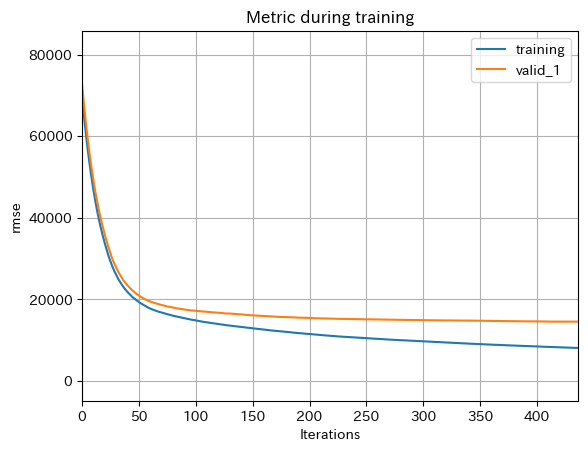

,importance
面積,4.537872e+14
L,3.927486e+14
平均地価,2.186719e+14
最寄り駅,8.777362e+13
築年数,7.588180e+13
全体の階数,3.748888e+13
一部屋あたりの面積,3.047256e+13
平均緯度,2.446066e+13
契約期間,1.613041e+13
平均経度,1.522478e+13


In [4]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    params = {
        'objective':'regression',
        'boosting_type':'goss',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 4.430375245218262e-06,
        'max_bin': 502,
        'num_leaves': 97,
    }

    print('Start training...')
    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

In [33]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
y_pred = pd.DataFrame(y_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('../data/result_data/GOSS_cv_result.csv',index=False)